In [2]:
import pandas as pd
import sqlite3
import matplotlib
import ipywidgets
import matplotlib.pyplot as plt
import regex as re
import bqplot
import numpy as np
import seaborn as sb

import plotly.graph_objects as go
import networkx as nx

In [4]:
principals = pd.read_csv('Imdb_data/title.principals.tsv',delimiter='\t')
basics = pd.read_csv('Imdb_data/title.basics.tsv',delimiter='\t')
imdb_names = pd.read_csv('Imdb_data/name.basics.tsv',delimiter='\t')

/Users/tzacks2/.conda/envs/DataViz2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
wiki_cast_excel = pd.read_csv('wiki_cast_excel.csv')
wiki_cast_excel.iloc[29]
wiki_cast = wiki_cast_excel.fillna('No')
wiki_cast

Performer   Time on SNL  No. of seasons Repertory Player  \
0        Fred Armisen     2002–2013              11              Yes   
1    Aristotle Athari  2021–present               1               No   
2         Dan Aykroyd     1975–1979               4              Yes   
3       Peter Aykroyd          1980               1               No   
4      Morwenna Banks          1995               1              Yes   
..                ...           ...             ...              ...   
154      Casey Wilson     2008–2009               2               No   
155         Fred Wolf     1996–1996               2               No   
156        Bowen Yang  2019–present               3              Yes   
157    Sasheer Zamata     2014–2017               4              Yes   
158      Alan Zweibel          1980               1               No   

    Featured Player Middle Group "Weekend Update" Anchor Hosted Writer  
0               Yes           No                      No    Yes     No  
1               Yes           No                      No     No     No  
2                No           No                     Yes    Yes    Yes  
3               Yes           No                      No     No    Yes  
4                No           No                      No     No     No  
..              ...          ...                     ...    ...    ...  
154             Yes           No                      No     No     No  
155             Yes           No                      No     No    Yes  
156             Yes           No                      No     No    Yes  
157             Yes           No                      No     No     No  
158             Yes           No                      No     No    Yes  

[159 rows x 9 columns]

Text(0, 0.5, 'No. of Seasons')

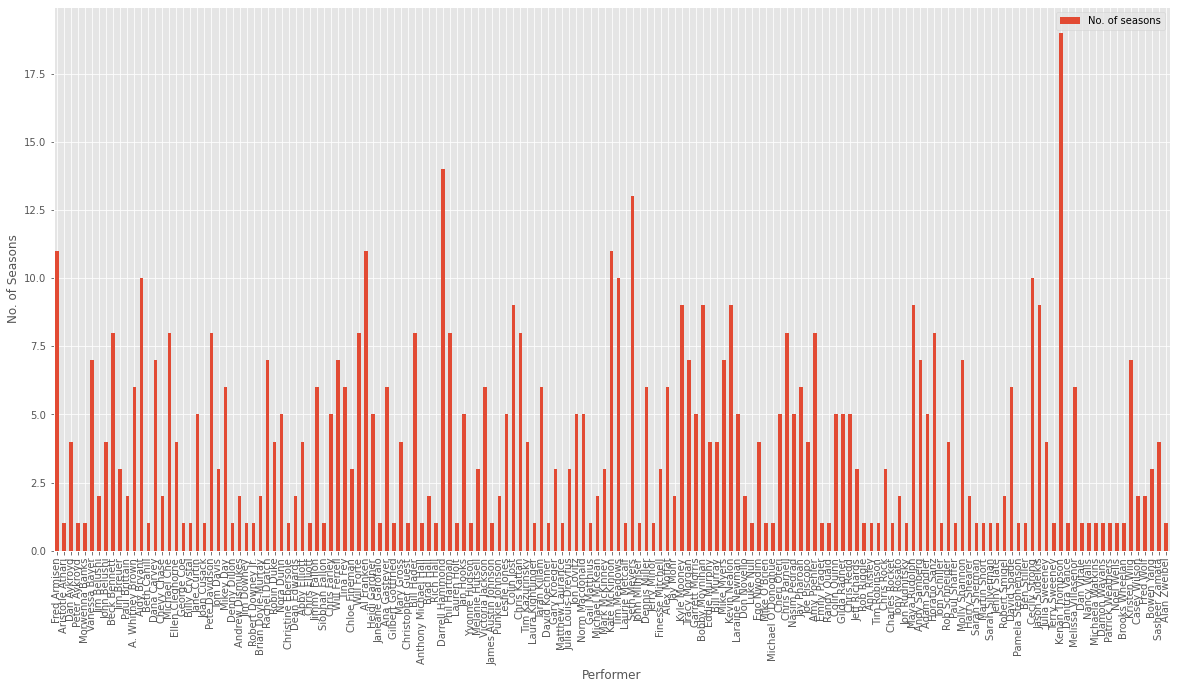

In [5]:
plt.style.use('ggplot')
ax = wiki_cast.plot(x= "Performer",y="No. of seasons", figsize = (20,10), kind = 'bar')
ax.set_ylabel('No. of Seasons')

In [6]:
imdb_names_df = imdb_names
imdb_names_df

nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
11554305  nm9993714   Romeo del Rosario        \N        \N   
11554306  nm9993716       Essias Loberg        \N        \N   
11554307  nm9993717  Harikrishnan Rajan        \N        \N   
11554308  nm9993718         Aayush Nair        \N        \N   
11554309  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0              soundtrack,actor,miscellaneous   
1                          actress,soundtrack   
2         actress,soundtrack,music_department   
3                     actor,soundtrack,writer   
4                       writer,director,actor   
...                                       ...   
11554305  animation_department,art_department   
11554306                                  NaN   
11554307                      cinematographer   
11554308                      cinematographer   
11554309                                  NaN   

                                   knownForTitles  
0         tt0050419,tt0053137,tt0031983,tt0072308  
1         tt0071877,tt0037382,tt0117057,tt0038355  
2         tt0054452,tt0056404,tt0057345,tt0049189  
3         tt0078723,tt0072562,tt0077975,tt0080455  
4         tt0069467,tt0083922,tt0060827,tt0050986  
...                                           ...  
11554305          tt14069590,tt11657662,tt2455546  
11554306                                       \N  
11554307                                tt8736744  
11554308                                       \N  
11554309                                       \N  

[11554310 rows x 6 columns]

In [7]:
imdb_name_list = imdb_names_df.values.tolist()
imdb_names_df.columns.tolist()

['nconst',
 'primaryName',
 'birthYear',
 'deathYear',
 'primaryProfession',
 'knownForTitles']

In [8]:
cross_imdb_wiki_list = []
for person in imdb_name_list:
    if person[1] in wiki_cast['Performer'].values:
        cross_imdb_wiki_list.append(person)

In [9]:
cross_name_list = (set([r[1] for r in cross_imdb_wiki_list]))
len(cross_name_list) # <- Missing 2 cast members

157

In [10]:
from collections import Counter

Counter([r[1] for r in cross_imdb_wiki_list]).most_common(10)

[('Tom Davis', 56),
 ("Mike O'Brien", 56),
 ('Bill Murray', 35),
 ('Tim Robinson', 32),
 ('Leslie Jones', 26),
 ('Chris Elliott', 24),
 ('Mike Myers', 23),
 ('Jeff Richards', 23),
 ('Dennis Miller', 21),
 ('Victoria Jackson', 18)]

In [11]:
cross_imdb_wiki_list

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000101',
  'Dan Aykroyd',
  '1952',
  '\\N',
  'writer,actor,producer',
  'tt0097428,tt0118747,tt0087332,tt0080455'],
 ['nm0000195',
  'Bill Murray',
  '1950',
  '\\N',
  'actor,soundtrack,writer',
  'tt1748122,tt0128445,tt0362270,tt0335266'],
 ['nm0000196',
  'Mike Myers',
  '1963',
  '\\N',
  'actor,writer,soundtrack',
  'tt0295178,tt0145660,tt0118655,tt0811138'],
 ['nm0000331',
  'Chevy Chase',
  '1943',
  '\\N',
  'actor,writer,soundtrack',
  'tt0085995,tt0097958,tt0080487,tt0092086'],
 ['nm0000345',
  'Billy Crystal',
  '1948',
  '\\N',
  'actor,writer,producer',
  'tt0101587,tt0098635,tt0113097,tt0122933'],
 ['nm0000349',
  'Joan Cusack',
  '1962',
  '\\N',
  'actress,soundtrack,writer',
  'tt0119229,tt1659337,tt0119360,tt0096463'],
 ['nm0000375',
  'Robert Downey Jr.',
  '1965',
  '\\N',
  'actor,producer,soundtrack',
  'tt1300854,tt0371746,tt4154

In [15]:
def check_names(name):
    cross_name_list = (set([r[1] for r in cross_imdb_wiki_list]))
    result = False
    
    if name in cross_name_list:
        result = True
    return result
SNL_name_check = [r for r in cross_imdb_wiki_list if check_names(r[1])]
(SNL_name_check)

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000101',
  'Dan Aykroyd',
  '1952',
  '\\N',
  'writer,actor,producer',
  'tt0097428,tt0118747,tt0087332,tt0080455'],
 ['nm0000195',
  'Bill Murray',
  '1950',
  '\\N',
  'actor,soundtrack,writer',
  'tt1748122,tt0128445,tt0362270,tt0335266'],
 ['nm0000196',
  'Mike Myers',
  '1963',
  '\\N',
  'actor,writer,soundtrack',
  'tt0295178,tt0145660,tt0118655,tt0811138'],
 ['nm0000331',
  'Chevy Chase',
  '1943',
  '\\N',
  'actor,writer,soundtrack',
  'tt0085995,tt0097958,tt0080487,tt0092086'],
 ['nm0000345',
  'Billy Crystal',
  '1948',
  '\\N',
  'actor,writer,producer',
  'tt0101587,tt0098635,tt0113097,tt0122933'],
 ['nm0000349',
  'Joan Cusack',
  '1962',
  '\\N',
  'actress,soundtrack,writer',
  'tt0119229,tt1659337,tt0119360,tt0096463'],
 ['nm0000375',
  'Robert Downey Jr.',
  '1965',
  '\\N',
  'actor,producer,soundtrack',
  'tt1300854,tt0371746,tt4154

In [16]:
def check_creds(works):
    SNL_IDs = ['tt0715791', 'tt0715791', 'tt0971348', 'tt10809086', 'tt0072562', 'tt1372614', 'tt2173702']
    result = False
    for work in works.split(','):
        if work in SNL_IDs:
            result = True
    return result
SNL_cred_check = [r for r in cross_imdb_wiki_list if check_creds(r[5])]
(SNL_cred_check)

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000902',
  'Jim Belushi',
  '1954',
  '\\N',
  'actor,music_department,producer',
  'tt0097637,tt0072562,tt0117468,tt0095963'],
 ['nm0001022',
  'Dana Carvey',
  '1955',
  '\\N',
  'actor,soundtrack,writer',
  'tt0072562,tt0108525,tt0105793,tt0295427'],
 ['nm0005265',
  'Kevin Nealon',
  '1953',
  '\\N',
  'actor,writer,soundtrack',
  'tt0072562,tt0116483,tt0439100,tt0120888'],
 ['nm0035488',
  'Fred Armisen',
  '1966',
  '\\N',
  'music_department,actor,writer',
  'tt0357413,tt1282140,tt0072562,tt1780441'],
 ['nm0112944',
  'A. Whitney Brown',
  '1952',
  '\\N',
  'writer,actor',
  'tt0096708,tt0072562,tt0166039,tt1094991'],
 ['nm0128639',
  'Beth Cahill',
  '\\N',
  '\\N',
  'actress,costume_designer,miscellaneous',
  'tt0155764,tt0262411,tt0164930,tt0072562'],
 ['nm0205569',
  'Tom Davis',
  '1952',
  '2012',
  'writer,actor,producer',
  'tt0086465,tt

In [17]:
SNL_df = pd.DataFrame(SNL_cred_check, columns = imdb_names.columns.tolist()).set_index('primaryName')
SNL_df

nconst birthYear deathYear  \
primaryName                                      
John Belushi     nm0000004      1949      1982   
Jim Belushi      nm0000902      1954        \N   
Dana Carvey      nm0001022      1955        \N   
Kevin Nealon     nm0005265      1953        \N   
Fred Armisen     nm0035488      1966        \N   
...                    ...       ...       ...   
Aidy Bryant      nm5262775      1987        \N   
Chris Redd       nm5412083        \N        \N   
Fred Wolf        nm7440291        \N        \N   
Lauren Holt      nm7576527      1991        \N   
Andrew Dismukes  nm8608160        \N        \N   

                               primaryProfession  \
primaryName                                        
John Belushi             actor,soundtrack,writer   
Jim Belushi      actor,music_department,producer   
Dana Carvey              actor,soundtrack,writer   
Kevin Nealon             actor,writer,soundtrack   
Fred Armisen       music_department,actor,writer   
...                                          ...   
Aidy Bryant            actress,writer,soundtrack   
Chris Redd               actor,writer,soundtrack   
Fred Wolf                                  actor   
Lauren Holt                              actress   
Andrew Dismukes                     writer,actor   

                                            knownForTitles  
primaryName                                                 
John Belushi       tt0078723,tt0072562,tt0077975,tt0080455  
Jim Belushi        tt0097637,tt0072562,tt0117468,tt0095963  
Dana Carvey        tt0072562,tt0108525,tt0105793,tt0295427  
Kevin Nealon       tt0072562,tt0116483,tt0439100,tt0120888  
Fred Armisen       tt0357413,tt1282140,tt0072562,tt1780441  
...                                                    ...  
Aidy Bryant       tt5462602,tt11092142,tt8962130,tt0072562  
Chris Redd         tt3960412,tt5884792,tt7286456,tt0072562  
Fred Wolf                   tt3910602,tt10222674,tt0072562  
Lauren Holt        tt8394996,tt8937092,tt0072562,tt7546290  
Andrew Dismukes  tt14508698,tt0072562,tt13858722,tt6279022  

[61 rows x 5 columns]

In [18]:
wiki_cast = wiki_cast.set_index('Performer')
imdb_wiki_table = pd.concat([SNL_df, wiki_cast], axis=1, join="outer")
imdb_wiki_table

nconst birthYear deathYear  \
John Belushi      nm0000004      1949      1982   
Jim Belushi       nm0000902      1954        \N   
Dana Carvey       nm0001022      1955        \N   
Kevin Nealon      nm0005265      1953        \N   
Fred Armisen      nm0035488      1966        \N   
...                     ...       ...       ...   
Patrick Weathers        NaN       NaN       NaN   
Kristen Wiig            NaN       NaN       NaN   
Casey Wilson            NaN       NaN       NaN   
Bowen Yang              NaN       NaN       NaN   
Sasheer Zamata          NaN       NaN       NaN   

                                primaryProfession  \
John Belushi              actor,soundtrack,writer   
Jim Belushi       actor,music_department,producer   
Dana Carvey               actor,soundtrack,writer   
Kevin Nealon              actor,writer,soundtrack   
Fred Armisen        music_department,actor,writer   
...                                           ...   
Patrick Weathers                              NaN   
Kristen Wiig                                  NaN   
Casey Wilson                                  NaN   
Bowen Yang                                    NaN   
Sasheer Zamata                                NaN   

                                           knownForTitles   Time on SNL  \
John Belushi      tt0078723,tt0072562,tt0077975,tt0080455     1975–1979   
Jim Belushi       tt0097637,tt0072562,tt0117468,tt0095963     1983–1985   
Dana Carvey       tt0072562,tt0108525,tt0105793,tt0295427     1986–1993   
Kevin Nealon      tt0072562,tt0116483,tt0439100,tt0120888     1986–1995   
Fred Armisen      tt0357413,tt1282140,tt0072562,tt1780441     2002–2013   
...                                                   ...           ...   
Patrick Weathers                                      NaN     1980–1981   
Kristen Wiig                                          NaN     2005–2012   
Casey Wilson                                          NaN     2008–2009   
Bowen Yang                                            NaN  2019–present   
Sasheer Zamata                                        NaN     2014–2017   

                  No. of seasons Repertory Player Featured Player  \
John Belushi                   4              Yes              No   
Jim Belushi                    2              Yes              No   
Dana Carvey                    7              Yes              No   
Kevin Nealon                   9              Yes             Yes   
Fred Armisen                  11              Yes             Yes   
...                          ...              ...             ...   
Patrick Weathers               1               No             Yes   
Kristen Wiig                   7              Yes             Yes   
Casey Wilson                   2               No             Yes   
Bowen Yang                     3              Yes             Yes   
Sasheer Zamata                 4              Yes             Yes   

                 Middle Group "Weekend Update" Anchor Hosted Writer  
John Belushi               No                      No     No    Yes  
Jim Belushi                No                      No     No    Yes  
Dana Carvey                No                      No    Yes    Yes  
Kevin Nealon               No                     Yes     No    Yes  
Fred Armisen               No                      No    Yes     No  
...                       ...                     ...    ...    ...  
Patrick Weathers           No                      No     No     No  
Kristen Wiig               No                      No    Yes     No  
Casey Wilson               No                      No     No     No  
Bowen Yang                 No                      No     No    Yes  
Sasheer Zamata             No                      No     No     No  

[159 rows x 13 columns]

In [19]:
names_title_dict = {item[1]:item[5].split(',') for item in SNL_name_check}
names_title_dict

{'John Belushi': ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
 'Dan Aykroyd': ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
 'Bill Murray': ['tt5156614'],
 'Mike Myers': ['\\N'],
 'Chevy Chase': ['tt0085995', 'tt0097958', 'tt0080487', 'tt0092086'],
 'Billy Crystal': ['tt0101587', 'tt0098635', 'tt0113097', 'tt0122933'],
 'Joan Cusack': ['tt0119229', 'tt1659337', 'tt0119360', 'tt0096463'],
 'Robert Downey Jr.': ['tt1300854', 'tt0371746', 'tt4154796', 'tt0988045'],
 'Chris Farley': ['\\N'],
 'Janeane Garofalo': ['tt0382932', 'tt0132347', 'tt0117979', 'tt0243655'],
 'Julia Louis-Dreyfus': ['tt0462128', 'tt1759761', 'tt2390361', 'tt0098904'],
 'Eddie Murphy': ['tt0492509'],
 'Jim Belushi': ['tt0097637', 'tt0072562', 'tt0117468', 'tt0095963'],
 'Dana Carvey': ['tt0072562', 'tt0108525', 'tt0105793', 'tt0295427'],
 'Adam Sandler': ['tt13689618', 'tt10428498', 'tt0068120', 'tt12116598'],
 'Christopher Guest': ['tt4334642', 'tt1024855'],
 'Anthony Michael Hall': ['tt0468569', 't

In [22]:
for i in SNL_name_check:
    for x in i:
        if str(x).startswith('tt'):
            titles = x.split(',')
    
    name = i[1]
    names_title_dict[name] += titles

for name, titles in names_title_dict.items():
    names_title_dict[name] = list(set(titles))
    
names_title_dict

{'John Belushi': ['tt0077975', 'tt0078723', 'tt0072562', 'tt0080455'],
 'Dan Aykroyd': ['tt0118747', 'tt0087332', 'tt0097428', 'tt0080455'],
 'Bill Murray': ['tt3503754',
  'tt1884251',
  'tt5774598',
  'tt3603706',
  'tt1748122',
  'tt1210095',
  'tt1837678',
  'tt2202391',
  'tt2450652',
  'tt0072562',
  'tt2282941',
  'tt2243836',
  'tt3091734',
  'tt12762460',
  'tt1732762',
  'tt0362270',
  'tt0128445',
  'tt0122145',
  'tt14779558',
  'tt0351810',
  'tt0961721',
  'tt1490534',
  'tt1972582',
  'tt16589596',
  'tt4742812',
  'tt0281438',
  'tt1600694',
  'tt0499556',
  'tt1740656',
  'tt1538443',
  'tt13998382',
  'tt0288154',
  'tt0189500',
  'tt1911645',
  'tt2356940',
  'tt0115367',
  'tt2357748',
  'tt3790306',
  'tt5156614',
  'tt4571940',
  'tt2828570',
  'tt3147486',
  'tt0335266',
  'tt3231836',
  'tt0457251',
  'tt0097132',
  'tt1810727',
  'tt0448004',
  'tt6384192',
  'tt1687207',
  'tt3872944',
  'tt2147467',
  'tt2784678'],
 'Mike Myers': ['tt5657856',
  'tt1302137',


In [21]:
import csv
headers = ['name', 'title']
rows = []
for name, titles in names_title_dict.items():
    for t in titles:
        rows.append([name, t])


with open('snl_name_title_nodes.csv', 'w', encoding = 'utf-8') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(headers)
    csvout.writerows(rows)

# Visualizations

In [23]:
import pygraphviz as pgv

G = pgv.AGraph(names_title_dict,
               strict=True,
               directed=True,
               rankdir="RL",
               ranksep="0.25",
               ordering="in")

G.layout('dot')

G.draw('name_to_titles.png')

G.draw('name_to_titles.svg')

/Users/tzacks2/.conda/envs/DataViz2/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.403878 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


In [27]:
same_title_dict = {}
unique_title_list = []
for x in names_title_dict:
#     print((x))
    for unique_title in names_title_dict[x]:
        if unique_title not in unique_title_list:
            unique_title_list.append(unique_title)
    per_title_name_list = []
    for i in unique_title_list:
        
        if names_title_dict[x] == i:
            
            per_title_name_list.append(name_titles_dict[x])
        same_title_dict[i] = per_title_name_list
name = names_title_dict.keys()
title = same_title_dict.keys()
for title in same_title_dict:
#     print(title)
    name_list = []
#     print(name)
    for name in names_title_dict:
        if str(title) in names_title_dict[name] and name not in name_list:
#             print(name,title)
            name_list.append(name)
    same_title_dict[title] = name_list
            #     same_title_dict[title] = list((name))
same_title_dict

{'tt0077975': ['John Belushi'],
 'tt0078723': ['John Belushi'],
 'tt0072562': ['John Belushi',
  'Bill Murray',
  'Jim Belushi',
  'Dana Carvey',
  'Kevin Nealon',
  'Fred Armisen',
  'A. Whitney Brown',
  'Beth Cahill',
  'Pete Davidson',
  'Tom Davis',
  'Robin Duke',
  'Chris Elliott',
  'Al Franken',
  'Mary Gross',
  'Rich Hall',
  'Darrell Hammond',
  'Phil Hartman',
  'Yvonne Hudson',
  'Melanie Hutsell',
  'Leslie Jones',
  'Tim Kazurinsky',
  'Taran Killam',
  'Gary Kroeger',
  'Gail Matthius',
  'Kate McKinnon',
  'Tracy Morgan',
  'Garrett Morris',
  'Don Novello',
  "Michael O'Donoghue",
  'Joe Piscopo',
  'Amy Poehler',
  'Gilda Radner',
  'Jeff Richards',
  'Ann Risley',
  'Tim Robinson',
  'Tom Schiller',
  'Robert Smigel',
  'Kenan Thompson',
  'Dan Vitale',
  'Fred Wolf',
  'Alan Zweibel',
  'Seth Meyers',
  'Lauren Holt',
  'Bobby Moynihan',
  'Finesse Mitchell',
  'Mikey Day',
  'Andy Samberg',
  'Paul Brittain',
  'Colin Jost',
  'Abby Elliott',
  'John Milhiser',
 

In [45]:
G = pgv.AGraph(same_title_dict,
               strict=True,
               directed=False,
               rankdir="RL",
               ranksep="0.25",
               ordering="in")

G.layout('dot')

G.draw('title_to_names.png')

G.draw('title_to_names.svg')

/Users/tzacks2/.conda/envs/DataViz2/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.403878 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


In [29]:
values = list(set([x for y in names_title_dict.values() for x in y]))
data = {}
for key in names_title_dict.keys():
    data[key] = [True if value in names_title_dict[key] else False for value in values]
 
boolean_table_name_cols = pd.DataFrame(data, index=values)
pd.DataFrame(boolean_table_name_cols)

John Belushi  Dan Aykroyd  Bill Murray  Mike Myers  Chevy Chase  \
tt0972846         False        False        False       False        False   
tt3597448         False        False        False       False        False   
tt6329792         False        False        False       False        False   
tt9639868         False        False        False       False        False   
tt0120791         False        False        False       False        False   
...                 ...          ...          ...         ...          ...   
tt0175142         False        False        False       False        False   
tt0119282         False        False        False       False        False   
tt2382015         False        False        False       False        False   
tt0185431         False        False        False       False        False   
tt1232200         False        False        False       False        False   

           Billy Crystal  Joan Cusack  Robert Downey Jr.  Chris Farley  \
tt0972846          False        False              False         False   
tt3597448          False        False              False         False   
tt6329792          False        False              False          True   
tt9639868          False        False              False         False   
tt0120791          False        False              False         False   
...                  ...          ...                ...           ...   
tt0175142          False        False              False         False   
tt0119282          False        False              False         False   
tt2382015          False        False              False         False   
tt0185431          False        False              False         False   
tt1232200          False        False              False         False   

           Janeane Garofalo  ...  Ego Nwodim  Brooks Wheelan  Cecily Strong  \
tt0972846             False  ...       False           False          False   
tt3597448             False  ...       False           False          False   
tt6329792             False  ...       False           False          False   
tt9639868             False  ...       False           False          False   
tt0120791             False  ...       False           False          False   
...                     ...  ...         ...             ...            ...   
tt0175142             False  ...       False           False          False   
tt0119282             False  ...       False           False          False   
tt2382015             False  ...       False           False          False   
tt0185431             False  ...       False           False          False   
tt1232200             False  ...       False           False          False   

           Aidy Bryant  Chris Redd  Jim Downey  Bowen Yang  Andrew Dismukes  \
tt0972846        False       False       False       False            False   
tt3597448        False       False       False       False            False   
tt6329792        False       False       False       False            False   
tt9639868        False       False       False       False            False   
tt0120791        False       False       False       False            False   
...                ...         ...         ...         ...              ...   
tt0175142        False       False       False       False            False   
tt0119282        False       False       False       False            False   
tt2382015        False       False       False       False            False   
tt0185431        False       False       False       False            False   
tt1232200        False       False       False       False            False   

           Siobhan Fallon  Punkie Johnson  
tt0972846           False           False  
tt3597448           False           False  
tt6329792           False           False  
tt9639868           False           False  
tt0120791           False           False  
...                   .

In [30]:
# https://stackoverflow.com/questions/41964618/boolean-matrix-form-pythons-dict-of-lists
values = list(set([x for y in same_title_dict.values() for x in y]))
data = {}
for key in same_title_dict.keys():
    data[key] = [ True if value in same_title_dict[key] else False for value in values ]
 
boolean_table_title_cols = pd.DataFrame(data, index=values)
pd.DataFrame(boolean_table_title_cols)

tt0077975  tt0078723  tt0072562  tt0080455  tt0118747  \
Aidy Bryant          False      False       True      False      False   
Ann Risley           False      False       True      False      False   
Brooks Wheelan       False      False       True      False      False   
Ellen Cleghorne      False      False      False      False      False   
John Milhiser        False      False       True      False      False   
...                    ...        ...        ...        ...        ...   
Jeff Richards        False      False       True      False      False   
Dennis Miller        False      False      False      False      False   
Mary Gross           False      False       True      False      False   
Jason Sudeikis       False      False      False      False      False   
Robert Smigel        False      False       True      False      False   

                 tt0087332  tt0097428  tt3503754  tt1884251  tt5774598  ...  \
Aidy Bryant          False      False      False      False      False  ...   
Ann Risley           False      False      False      False      False  ...   
Brooks Wheelan       False      False      False      False      False  ...   
Ellen Cleghorne      False      False      False      False      False  ...   
John Milhiser        False      False      False      False      False  ...   
...                    ...        ...        ...        ...        ...  ...   
Jeff Richards        False      False      False      False      False  ...   
Dennis Miller        False      False       True      False       True  ...   
Mary Gross           False      False      False      False      False  ...   
Jason Sudeikis       False      False      False      False      False  ...   
Robert Smigel        False      False      False      False      False  ...   

                 tt2452244  tt2587452  tt14508698  tt13858722  tt6279022  \
Aidy Bryant          False      False       False       False      False   
Ann Risley           False      False       False       False      False   
Brooks Wheelan       False      False       False       False      False   
Ellen Cleghorne      False      False       False       False      False   
John Milhiser        False      False       False       False      False   
...                    ...        ...         ...         ...        ...   
Jeff Richards        False      False       False       False      False   
Dennis Miller        False      False       False       False      False   
Mary Gross           False      False       False       False      False   
Jason Sudeikis       False      False       False       False      False   
Robert Smigel        False      False       False       False      False   

                 tt6463510  tt7778796  tt5821764  tt5117666  tt7242698  
Aidy Bryant          False      False      False      False      False  
Ann Risley           False      False      False      False      False  
Brooks Wheelan       False      False      False      False      False  
Ellen Cleghorne      False      False      False      False      False  
John Milhiser        False      False      False      False      False  
...                    ...        ...        ...        ...        ...  
Jeff Richards        False      False      False      False      False  
Dennis Miller        False      False      False      False      False  
Mary Gross           False      False      False      False      False  
Jason Sudeikis       False      False      False      False      False  
Robert Smigel        False      False      False      False      False  

[157 rows x 1127 columns]

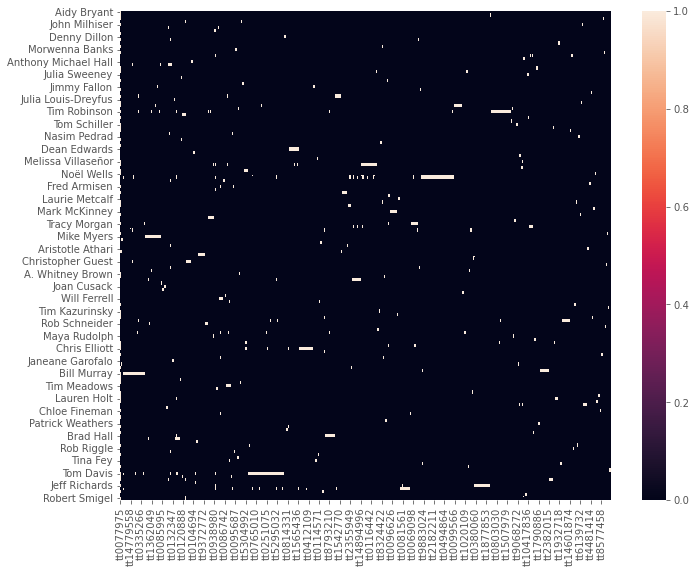

In [31]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(boolean_table_title_cols)
plt.show()

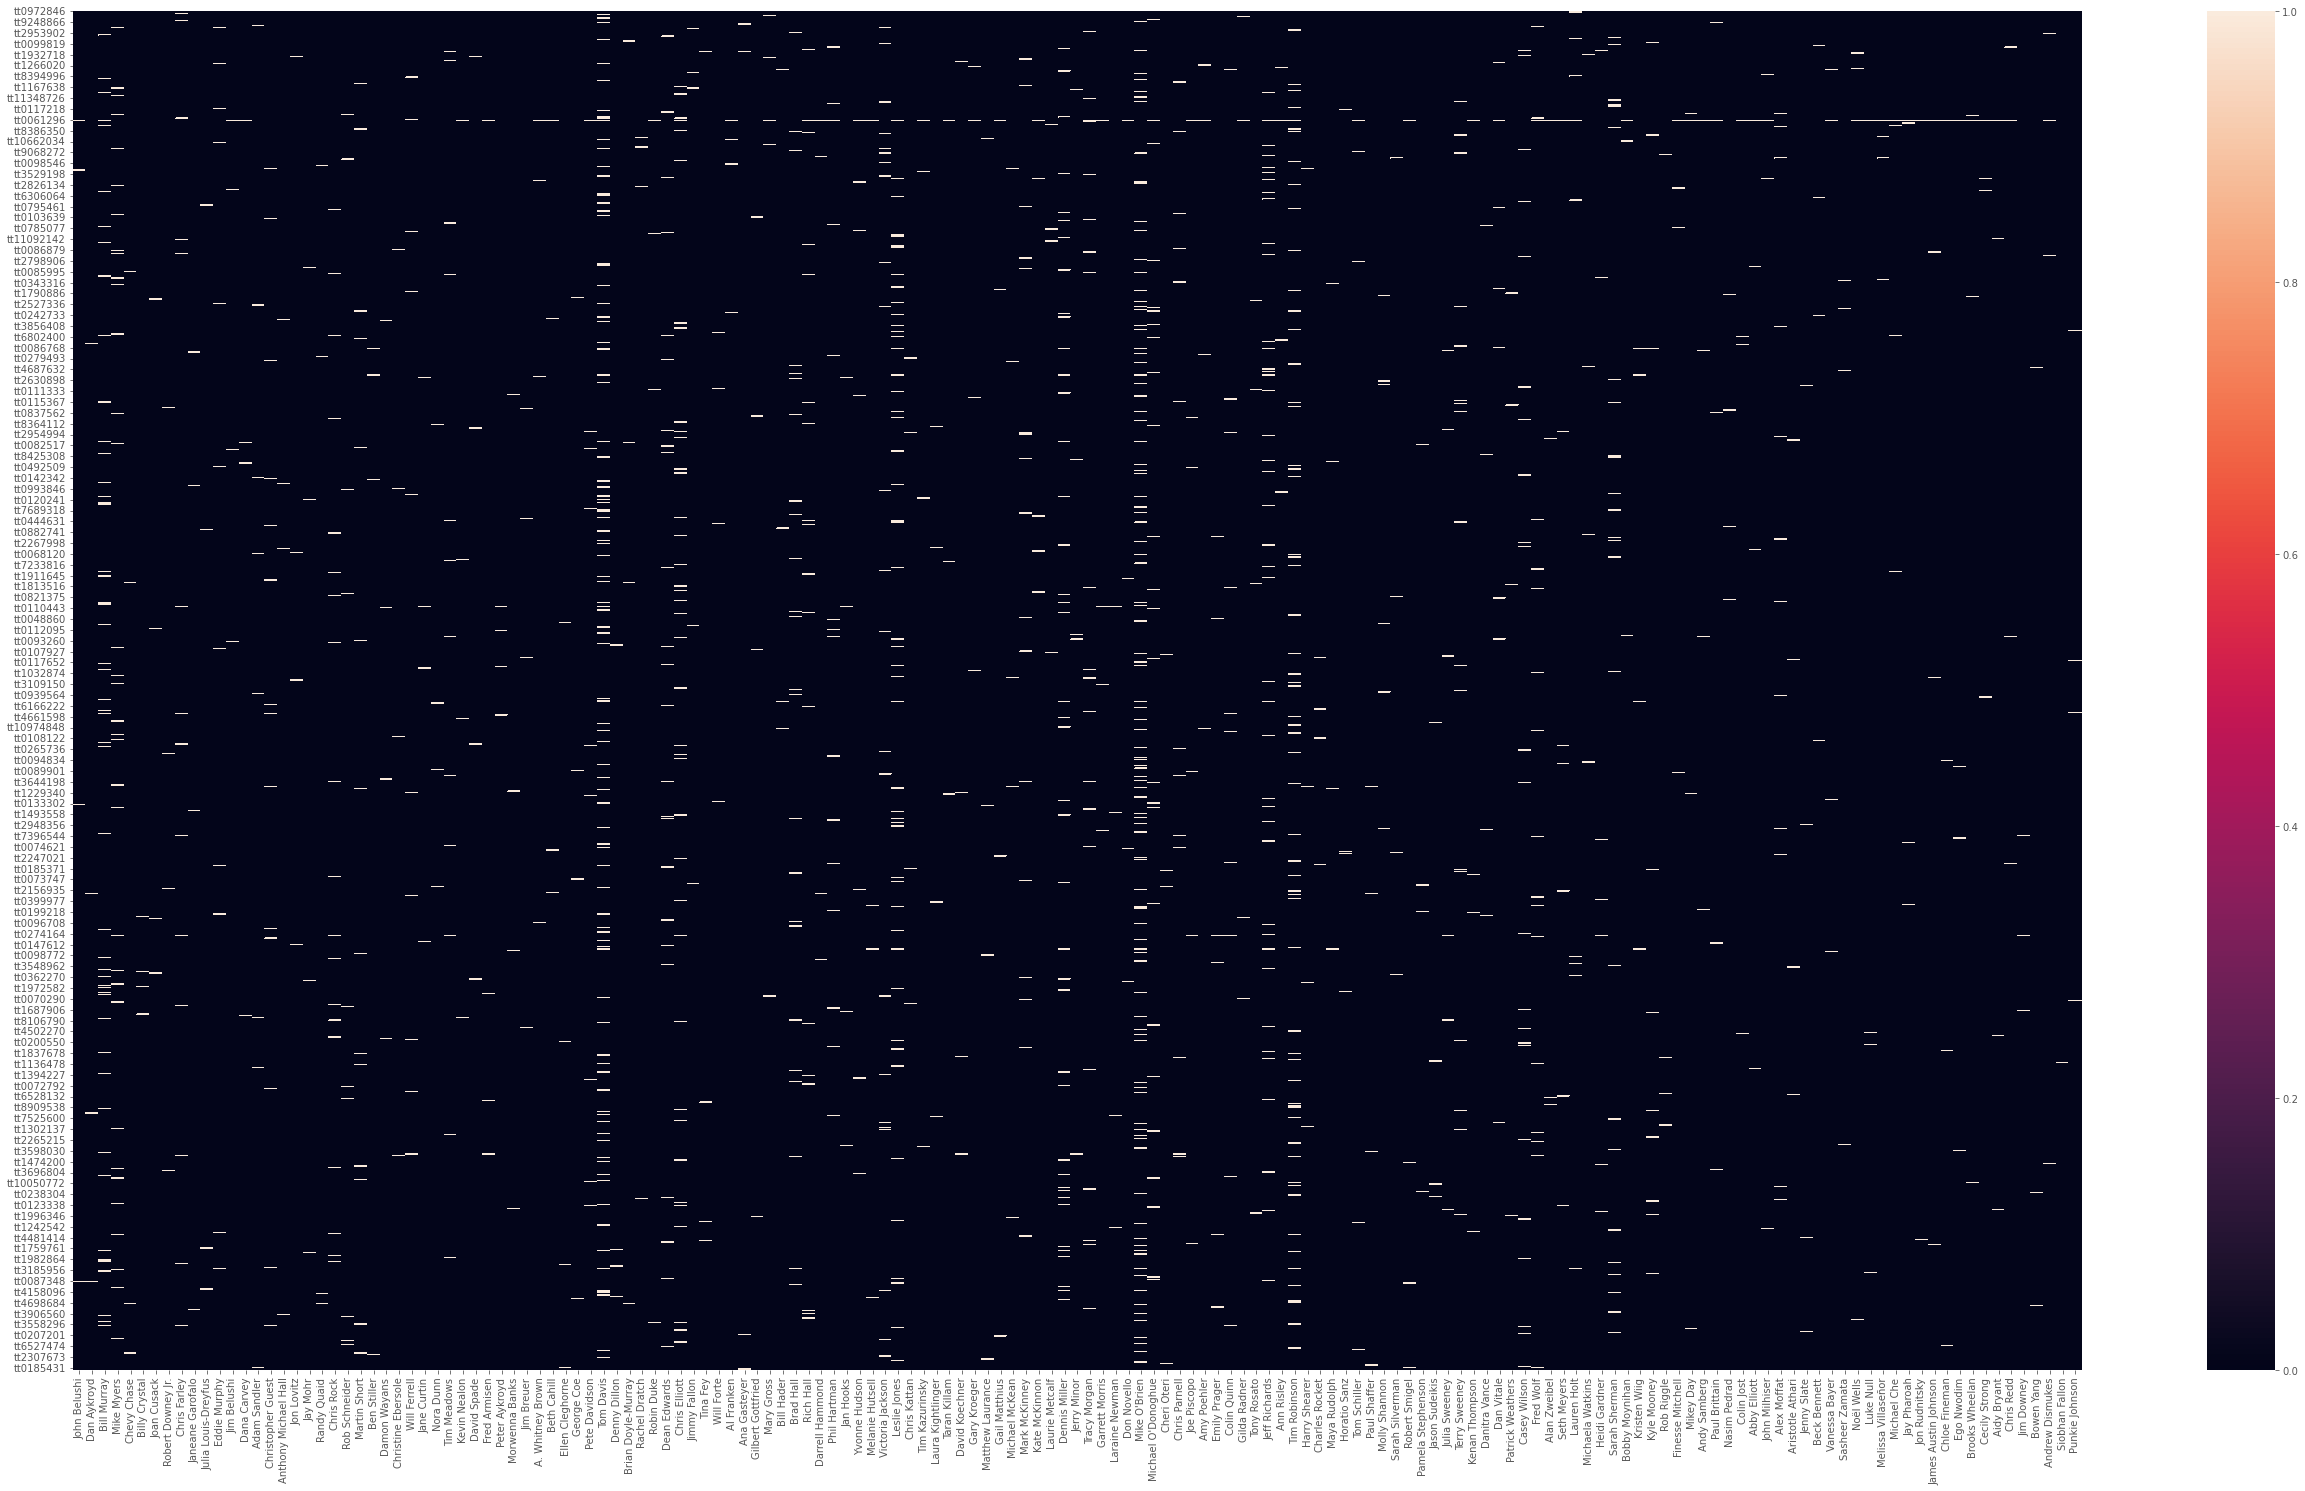

In [32]:
fig, ax = plt.subplots(figsize=(45, 25))
sb.heatmap(boolean_table_name_cols)
plt.show()

In [33]:
# ATTEMPT AT A NETWORK NODE GRAPH
# g = nx.DiGraph(same_title_dict)
# g.add_nodes_from(same_title_dict.keys())
# for k, v in same_title_dict.items():
#     g.add_edges_from(([(k, t) for t in v]))
#     node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode='markers',
#     hoverinfo='text',
#     marker=dict(
#         showscale=True,
#         # colorscale options
#         #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
#         #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
#         #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
#         colorscale='YlGnBu',
#         reversescale=True,
#         color=[],
#         size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'),
#         line_width=2))
# nx.draw(g,with_labels=True)

# node_adjacencies = []
# node_text = []
# for node, adjacencies in enumerate(g.adjacency()):
#     node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1])))

# node_trace.marker.color = node_adjacencies
# node_trace.text = node_text
# # Create Network Graph
# fig = go.Figure(data=[edge_trace, node_trace],
#              layout=go.Layout(
#                 title='<br>Network graph made with Python',
#                 titlefont_size=24,
#                 showlegend=False,
#                 hovermode='closest',
#                 margin=dict(b=20,l=5,r=5,t=40),
#                 annotations=[ dict(
#                     text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
#                     showarrow=False,
#                     xref="paper", yref="paper",
#                     x=0.005, y=-0.002 ) ],
#                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))                )
# fig.show()

John Belushi ['tt0077975', 'tt0078723', 'tt0072562', 'tt0080455']
John Belushi
[True, True, True, True]
Dan Aykroyd
[False, False, False, True]
Bill Murray
[False, False, True, False]
Mike Myers
[False, False, False, False]
Chevy Chase
[False, False, False, False]
Billy Crystal
[False, False, False, False]
Joan Cusack
[False, False, False, False]
Robert Downey Jr.
[False, False, False, False]
Chris Farley
[False, False, False, False]
Janeane Garofalo
[False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False]
Eddie Murphy
[False, False, False, False]
Jim Belushi
[False, False, True, False]
Dana Carvey
[False, False, True, False]
Adam Sandler
[False, False, False, False]
Christopher Guest
[False, False, False, False]
Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False, False]
Mart

Robert Downey Jr.
[True, True, True, True]
Chris Farley
[False, False, False, False]
Janeane Garofalo
[False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False]
Eddie Murphy
[False, False, False, False]
Jim Belushi
[False, False, False, False]
Dana Carvey
[False, False, False, False]
Adam Sandler
[False, False, False, False]
Christopher Guest
[False, False, False, False]
Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False, False]
Martin Short
[False, False, False, False]
Ben Stiller
[False, False, False, False]
Damon Wayans
[False, False, False, False]
Christine Ebersole
[False, False, False, False]
Will Ferrell
[False, False, False, False]
Jane Curtin
[False, False, False, False]
Nora Dunn
[False, False, False, False]
Tim Meadows
[False, False, False, False]
Kevin Nealon
[False

Phil Hartman
[False, False, False, True]
Jan Hooks
[False, False, False, False]
Yvonne Hudson
[False, False, False, True]
Melanie Hutsell
[False, False, False, True]
Victoria Jackson
[False, False, False, False]
Leslie Jones
[False, False, False, True]
Chris Kattan
[False, False, False, False]
Tim Kazurinsky
[False, False, False, True]
Laura Kightlinger
[False, False, False, False]
Taran Killam
[False, False, False, True]
David Koechner
[False, False, False, False]
Gary Kroeger
[False, False, False, True]
Matthew Laurance
[False, False, False, False]
Gail Matthius
[False, False, False, True]
Michael McKean
[False, False, False, False]
Mark McKinney
[False, False, False, False]
Kate McKinnon
[False, False, False, True]
Laurie Metcalf
[False, False, False, False]
Dennis Miller
[False, False, False, False]
Jerry Minor
[False, False, False, False]
Tracy Morgan
[False, False, False, True]
Garrett Morris
[False, False, False, True]
Laraine Newman
[False, False, False, False]
Don Novello
[Fal

[False, False, False, False]
Dan Vitale
[False, False, False, False]
Patrick Weathers
[False, False, False, False]
Casey Wilson
[False, False, False, False]
Fred Wolf
[False, False, False, False]
Alan Zweibel
[False, False, False, False]
Seth Meyers
[False, False, False, False]
Lauren Holt
[False, False, False, False]
Michaela Watkins
[False, False, False, False]
Heidi Gardner
[False, False, False, False]
Sarah Sherman
[False, False, False, False]
Bobby Moynihan
[False, False, False, False]
Kristen Wiig
[False, False, False, False]
Kyle Mooney
[False, False, False, False]
Rob Riggle
[False, False, False, False]
Finesse Mitchell
[False, False, False, False]
Mikey Day
[False, False, False, False]
Andy Samberg
[False, False, False, False]
Paul Brittain
[False, False, False, False]
Nasim Pedrad
[False, False, False, False]
Colin Jost
[False, False, False, False]
Abby Elliott
[False, False, False, False]
John Milhiser
[False, False, False, False]
Alex Moffat
[False, False, False, False]
Ari

/Users/tzacks2/.conda/envs/DataViz2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Chevy Chase
[False, False, False, False, False, False, False, False, False, False]
Billy Crystal
[False, False, False, False, False, False, False, False, False, False]
Joan Cusack
[False, False, False, False, False, False, False, False, False, False]
Robert Downey Jr.
[False, False, False, False, False, False, False, False, False, False]
Chris Farley
[False, False, False, False, False, False, False, False, False, False]
Janeane Garofalo
[False, False, False, False, False, False, False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False, False, False, False, False, False, False]
Eddie Murphy
[False, False, False, False, False, False, False, False, False, False]
Jim Belushi
[False, False, False, False, False, False, False, False, False, False]
Dana Carvey
[False, False, False, False, False, False, False, False, False, False]
Adam Sandler
[False, False, False, False, False, False, False, False, False, False]
Christopher Guest
[False, False, False, False, False, False, Fa

[False, False, True, False]
Seth Meyers
[False, False, True, False]
Lauren Holt
[False, False, True, False]
Michaela Watkins
[False, False, False, False]
Heidi Gardner
[False, False, False, False]
Sarah Sherman
[False, False, False, False]
Bobby Moynihan
[False, False, True, False]
Kristen Wiig
[False, False, False, False]
Kyle Mooney
[False, False, False, False]
Rob Riggle
[False, False, False, False]
Finesse Mitchell
[False, False, True, False]
Mikey Day
[False, False, True, False]
Andy Samberg
[False, False, True, False]
Paul Brittain
[False, False, True, False]
Nasim Pedrad
[False, False, False, False]
Colin Jost
[False, False, True, False]
Abby Elliott
[False, False, True, False]
John Milhiser
[False, False, True, False]
Alex Moffat
[False, False, False, False]
Aristotle Athari
[False, False, False, False]
Jenny Slate
[False, False, False, False]
Beck Bennett
[False, False, False, False]
Vanessa Bayer
[False, False, True, False]
Sasheer Zamata
[False, False, False, False]
Noël Wel

Pete Davidson ['tt6334354', 'tt4677934', 'tt0072562', 'tt5304992', 'tt3513388', 'tt6806604', 'tt1598822', 'tt9686708', 'tt0800325']
John Belushi
[False, False, True, False, False, False, False, False, False]
Dan Aykroyd
[False, False, False, False, False, False, False, False, False]
Bill Murray
[False, False, True, False, False, False, False, False, False]
Mike Myers
[False, False, False, False, False, False, False, False, False]
Chevy Chase
[False, False, False, False, False, False, False, False, False]
Billy Crystal
[False, False, False, False, False, False, False, False, False]
Joan Cusack
[False, False, False, False, False, False, False, False, False]
Robert Downey Jr.
[False, False, False, False, False, False, False, False, False]
Chris Farley
[False, False, False, False, False, False, False, False, False]
Janeane Garofalo
[False, False, False, False, False, False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False, False, False, False, False, False]
Eddie Murphy

Dean Edwards ['tt0298674', 'tt1165357', 'tt14773254', 'tt5896628', 'tt3644198', 'tt1111291', 'tt1529670', 'tt0413300', 'tt2551436', 'tt0421143', 'tt0258476', 'tt6166222', 'tt2784678', 'tt0450852', 'tt6186672', 'tt0910898', 'tt12058768', 'tt0482481', 'tt0354333', 'tt13645690', 'tt1442550', 'tt1565436', 'tt0122905', 'tt11993098']
John Belushi
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Dan Aykroyd
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Bill Murray
[False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False]
Mike Myers
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

James Austin Johnson
[False, False, False, False]
Chloe Fineman
[False, False, False, False]
Ego Nwodim
[False, False, False, False]
Brooks Wheelan
[False, False, False, False]
Cecily Strong
[False, False, False, False]
Aidy Bryant
[False, False, False, False]
Chris Redd
[False, False, False, False]
Jim Downey
[False, False, False, False]
Bowen Yang
[False, False, False, False]
Andrew Dismukes
[False, False, False, False]
Siobhan Fallon
[False, False, False, False]
Punkie Johnson
[False, False, False, False]
Gilbert Gottfried ['tt0092644', 'tt0103639', 'tt0100419', 'tt0098987']
John Belushi
[False, False, False, False]
Dan Aykroyd
[False, False, False, False]
Bill Murray
[False, False, False, False]
Mike Myers
[False, False, False, False]
Chevy Chase
[False, False, False, False]
Billy Crystal
[False, False, False, False]
Joan Cusack
[False, False, False, False]
Robert Downey Jr.
[False, False, False, False]
Chris Farley
[False, False, False, False]
Janeane Garofalo
[False, False, False

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
George Coe
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Pete Davidson
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Tom Davis
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Denny Dillon
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Brian Doyle-Murray
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Rachel Dratch
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Robin Duke
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Dean Edwards
[False, False, False, False, False, False, False, 

[False, False, True, False]
Gilda Radner
[False, False, False, False]
Tony Rosato
[False, False, False, False]
Jeff Richards
[False, False, False, False]
Ann Risley
[False, False, False, False]
Tim Robinson
[False, False, False, False]
Harry Shearer
[False, False, False, False]
Charles Rocket
[False, False, False, False]
Maya Rudolph
[False, False, False, False]
Horatio Sanz
[False, False, False, False]
Tom Schiller
[False, False, False, False]
Paul Shaffer
[False, False, False, False]
Molly Shannon
[False, False, False, False]
Sarah Silverman
[False, False, False, False]
Robert Smigel
[False, False, False, False]
Pamela Stephenson
[False, False, False, False]
Jason Sudeikis
[False, False, False, False]
Julia Sweeney
[False, False, False, False]
Terry Sweeney
[False, False, False, False]
Kenan Thompson
[False, False, False, False]
Danitra Vance
[False, False, False, False]
Dan Vitale
[False, False, False, False]
Patrick Weathers
[False, False, False, False]
Casey Wilson
[False, False, 

Matthew Laurance ['tt0085475', 'tt0098772', 'tt0090060', 'tt0112111']
John Belushi
[False, False, False, False]
Dan Aykroyd
[False, False, False, False]
Bill Murray
[False, False, False, False]
Mike Myers
[False, False, False, False]
Chevy Chase
[False, False, False, False]
Billy Crystal
[False, False, False, False]
Joan Cusack
[False, False, False, False]
Robert Downey Jr.
[False, False, False, False]
Chris Farley
[False, False, False, False]
Janeane Garofalo
[False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False]
Eddie Murphy
[False, False, False, False]
Jim Belushi
[False, False, False, False]
Dana Carvey
[False, False, False, False]
Adam Sandler
[False, False, False, False]
Christopher Guest
[False, False, False, False]
Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False,

Jerry Minor ['tt0357413', 'tt0817538', 'tt0323633', 'tt2463288', 'tt0401003']
John Belushi
[False, False, False, False, False]
Dan Aykroyd
[False, False, False, False, False]
Bill Murray
[False, False, False, False, False]
Mike Myers
[False, False, False, False, False]
Chevy Chase
[False, False, False, False, False]
Billy Crystal
[False, False, False, False, False]
Joan Cusack
[False, False, False, False, False]
Robert Downey Jr.
[False, False, False, False, False]
Chris Farley
[False, False, False, False, False]
Janeane Garofalo
[False, False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False, False]
Eddie Murphy
[False, False, False, False, False]
Jim Belushi
[False, False, False, False, False]
Dana Carvey
[False, False, False, False, False]
Adam Sandler
[False, False, False, False, False]
Christopher Guest
[False, False, False, False, False]
Anthony Michael Hall
[False, False, False, False, False]
Jon Lovitz
[False, False, False, False, False]
Jay Mohr
[False, Fal

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Amy Poehler
[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Emily Prager
[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Colin Quinn
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Gilda Radner
[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Tony Rosato
[False, False, False, False, False, False, False, False, False

[False, False, True, False]
Dean Edwards
[False, False, False, False]
Chris Elliott
[False, False, True, False]
Jimmy Fallon
[False, False, False, False]
Tina Fey
[False, False, False, False]
Will Forte
[False, False, False, False]
Al Franken
[False, False, True, False]
Ana Gasteyer
[False, False, False, False]
Gilbert Gottfried
[False, False, False, False]
Mary Gross
[False, False, True, False]
Bill Hader
[False, False, False, False]
Brad Hall
[False, False, False, False]
Rich Hall
[False, False, True, False]
Darrell Hammond
[False, False, True, False]
Phil Hartman
[False, False, True, False]
Jan Hooks
[False, False, False, False]
Yvonne Hudson
[False, False, True, False]
Melanie Hutsell
[False, False, True, False]
Victoria Jackson
[False, False, False, False]
Leslie Jones
[False, False, True, False]
Chris Kattan
[False, False, False, False]
Tim Kazurinsky
[False, False, True, False]
Laura Kightlinger
[False, False, False, False]
Taran Killam
[False, False, True, False]
David Koechner

Maya Rudolph ['tt1727388', 'tt1478338', 'tt1791528', 'tt1176740']
John Belushi
[False, False, False, False]
Dan Aykroyd
[False, False, False, False]
Bill Murray
[False, False, False, False]
Mike Myers
[False, False, False, False]
Chevy Chase
[False, False, False, False]
Billy Crystal
[False, False, False, False]
Joan Cusack
[False, False, False, False]
Robert Downey Jr.
[False, False, False, False]
Chris Farley
[False, False, False, False]
Janeane Garofalo
[False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False]
Eddie Murphy
[False, False, False, False]
Jim Belushi
[False, False, False, False]
Dana Carvey
[False, False, False, False]
Adam Sandler
[False, False, False, False]
Christopher Guest
[False, False, False, False]
Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False, Fal

Robert Smigel ['tt0272338', 'tt0185431', 'tt0106052', 'tt0072562']
John Belushi
[False, False, False, True]
Dan Aykroyd
[False, False, False, False]
Bill Murray
[False, False, False, True]
Mike Myers
[False, False, False, False]
Chevy Chase
[False, False, False, False]
Billy Crystal
[False, False, False, False]
Joan Cusack
[False, False, False, False]
Robert Downey Jr.
[False, False, False, False]
Chris Farley
[False, False, False, False]
Janeane Garofalo
[False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False]
Eddie Murphy
[False, False, False, False]
Jim Belushi
[False, False, False, True]
Dana Carvey
[False, False, False, True]
Adam Sandler
[False, True, False, False]
Christopher Guest
[False, False, False, False]
Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False, False]


A. Whitney Brown
[False, False, False, True, False, False, False, False]
Beth Cahill
[False, False, False, True, False, False, False, False]
Ellen Cleghorne
[False, False, False, False, False, False, False, False]
George Coe
[False, False, False, False, False, False, False, False]
Pete Davidson
[False, False, False, True, False, False, False, False]
Tom Davis
[False, False, False, True, False, False, False, False]
Denny Dillon
[False, False, False, False, False, False, False, False]
Brian Doyle-Murray
[False, False, False, False, False, False, False, False]
Rachel Dratch
[False, False, False, False, False, False, False, False]
Robin Duke
[False, False, False, True, False, False, False, False]
Dean Edwards
[False, False, False, False, False, False, False, False]
Chris Elliott
[False, False, False, True, False, False, False, False]
Jimmy Fallon
[False, False, False, False, False, False, False, False]
Tina Fey
[False, False, False, False, False, False, False, False]
Will Forte
[False, Fal

Sarah Silverman
[False, False, False, False, False, False, False, False, False]
Robert Smigel
[False, False, False, True, False, False, False, False, False]
Pamela Stephenson
[False, False, False, False, False, False, False, False, False]
Jason Sudeikis
[False, False, False, False, False, False, False, False, False]
Julia Sweeney
[False, False, False, False, False, False, False, False, False]
Terry Sweeney
[False, False, False, False, False, False, False, False, False]
Kenan Thompson
[False, False, False, True, False, False, False, False, False]
Danitra Vance
[False, False, False, False, False, False, False, False, False]
Dan Vitale
[False, False, False, True, False, False, False, False, False]
Patrick Weathers
[False, False, False, False, False, False, False, False, False]
Casey Wilson
[False, False, False, False, False, False, False, False, False]
Fred Wolf
[False, False, False, True, False, False, False, False, False]
Alan Zweibel
[False, False, False, True, False, False, False, Fal

Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False, False]
Martin Short
[False, False, False, False]
Ben Stiller
[False, False, False, False]
Damon Wayans
[False, False, False, False]
Christine Ebersole
[False, False, False, False]
Will Ferrell
[False, False, False, False]
Jane Curtin
[False, False, False, False]
Nora Dunn
[False, False, False, False]
Tim Meadows
[False, False, False, False]
Kevin Nealon
[False, False, False, False]
David Spade
[False, False, False, False]
Fred Armisen
[False, False, False, False]
Peter Aykroyd
[False, False, False, False]
Morwenna Banks
[False, False, False, False]
Jim Breuer
[False, False, False, False]
A. Whitney Brown
[False, False, False, False]
Beth Cahill
[False, False, False, False]
Ellen Cleghorne
[False, False, False, False]
George Coe
[False, False, Fa

Kevin Nealon
[False, True, False, False]
David Spade
[False, False, False, False]
Fred Armisen
[False, True, False, False]
Peter Aykroyd
[False, False, False, False]
Morwenna Banks
[False, False, False, False]
Jim Breuer
[False, False, False, False]
A. Whitney Brown
[False, True, False, False]
Beth Cahill
[False, True, False, False]
Ellen Cleghorne
[False, False, False, False]
George Coe
[False, False, False, False]
Pete Davidson
[False, True, False, False]
Tom Davis
[False, True, False, False]
Denny Dillon
[False, False, False, False]
Brian Doyle-Murray
[False, False, False, False]
Rachel Dratch
[False, False, False, False]
Robin Duke
[False, True, False, False]
Dean Edwards
[False, False, False, False]
Chris Elliott
[False, True, False, False]
Jimmy Fallon
[False, False, False, False]
Tina Fey
[False, False, False, False]
Will Forte
[False, False, False, False]
Al Franken
[False, True, False, False]
Ana Gasteyer
[False, False, False, False]
Gilbert Gottfried
[False, False, False, Fal

[False, False, False, False]
Sarah Sherman
[False, False, False, False]
Bobby Moynihan
[False, False, False, False]
Kristen Wiig
[False, False, False, False]
Kyle Mooney
[False, False, False, False]
Rob Riggle
[False, False, False, False]
Finesse Mitchell
[False, False, False, False]
Mikey Day
[False, False, False, False]
Andy Samberg
[False, False, False, False]
Paul Brittain
[False, False, False, False]
Nasim Pedrad
[False, False, False, False]
Colin Jost
[False, False, False, False]
Abby Elliott
[False, False, False, False]
John Milhiser
[False, False, False, False]
Alex Moffat
[False, False, False, False]
Aristotle Athari
[False, False, False, False]
Jenny Slate
[False, False, False, False]
Beck Bennett
[True, True, True, True]
Vanessa Bayer
[False, False, False, False]
Sasheer Zamata
[False, False, False, False]
Noël Wells
[False, False, False, False]
Luke Null
[False, False, False, False]
Melissa Villaseñor
[False, False, False, False]
Michael Che
[False, False, False, False]
Jay

[False, False, True, False]
Adam Sandler
[False, False, False, False]
Christopher Guest
[False, False, False, False]
Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False, False]
Martin Short
[False, False, False, False]
Ben Stiller
[False, False, False, False]
Damon Wayans
[False, False, False, False]
Christine Ebersole
[False, False, False, False]
Will Ferrell
[False, False, False, False]
Jane Curtin
[False, False, False, False]
Nora Dunn
[False, False, False, False]
Tim Meadows
[False, False, False, False]
Kevin Nealon
[False, False, True, False]
David Spade
[False, False, False, False]
Fred Armisen
[False, False, True, False]
Peter Aykroyd
[False, False, False, False]
Morwenna Banks
[False, False, False, False]
Jim Breuer
[False, False, False, False]
A. Whitney Brown
[False, False, True, False]


[False, False, False, False]
Tim Kazurinsky
[False, False, True, False]
Laura Kightlinger
[False, False, False, False]
Taran Killam
[False, False, True, False]
David Koechner
[False, False, False, False]
Gary Kroeger
[False, False, True, False]
Matthew Laurance
[False, False, False, False]
Gail Matthius
[False, False, True, False]
Michael McKean
[False, False, False, False]
Mark McKinney
[False, False, False, False]
Kate McKinnon
[True, False, True, False]
Laurie Metcalf
[False, False, False, False]
Dennis Miller
[False, False, False, False]
Jerry Minor
[False, False, False, False]
Tracy Morgan
[False, False, True, False]
Garrett Morris
[False, False, True, False]
Laraine Newman
[False, False, False, False]
Don Novello
[False, False, True, False]
Mike O'Brien
[False, False, False, False]
Michael O'Donoghue
[False, False, True, False]
Cheri Oteri
[False, False, False, False]
Chris Parnell
[False, False, False, False]
Joe Piscopo
[False, False, True, False]
Amy Poehler
[False, False, Tru

Punkie Johnson ['tt7778796', 'tt5821764', 'tt5117666', 'tt7242698']
John Belushi
[False, False, False, False]
Dan Aykroyd
[False, False, False, False]
Bill Murray
[False, False, False, False]
Mike Myers
[False, False, False, False]
Chevy Chase
[False, False, False, False]
Billy Crystal
[False, False, False, False]
Joan Cusack
[False, False, False, False]
Robert Downey Jr.
[False, False, False, False]
Chris Farley
[False, False, False, False]
Janeane Garofalo
[False, False, False, False]
Julia Louis-Dreyfus
[False, False, False, False]
Eddie Murphy
[False, False, False, False]
Jim Belushi
[False, False, False, False]
Dana Carvey
[False, False, False, False]
Adam Sandler
[False, False, False, False]
Christopher Guest
[False, False, False, False]
Anthony Michael Hall
[False, False, False, False]
Jon Lovitz
[False, False, False, False]
Jay Mohr
[False, False, False, False]
Randy Quaid
[False, False, False, False]
Chris Rock
[False, False, False, False]
Rob Schneider
[False, False, False, F

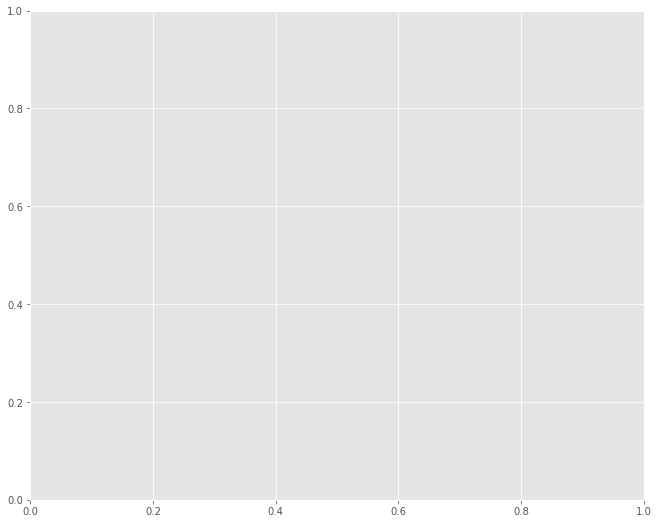

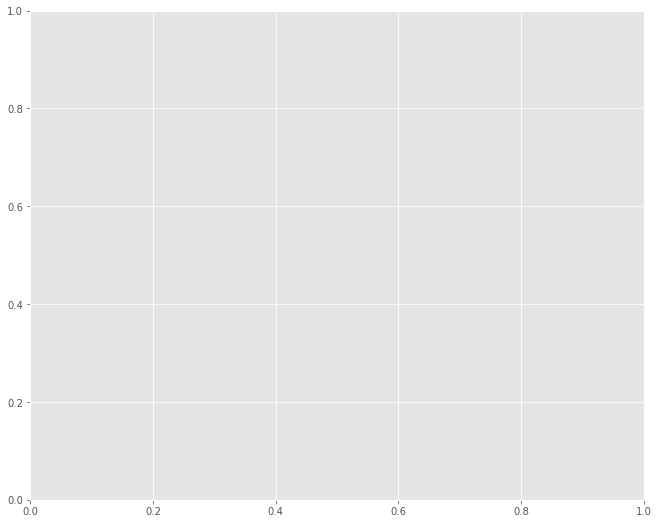

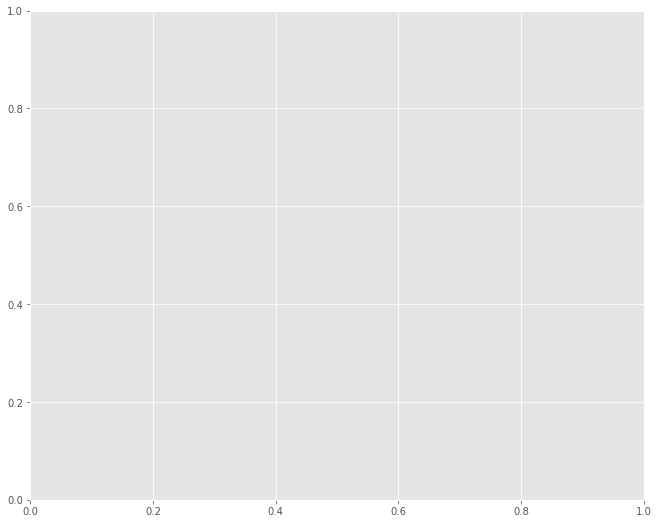

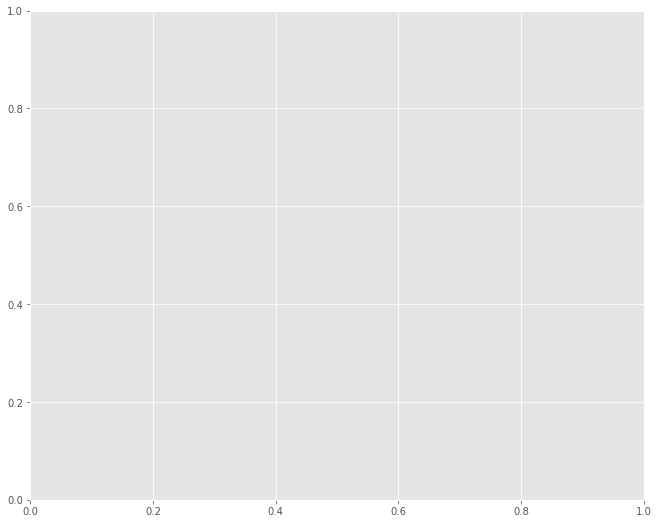

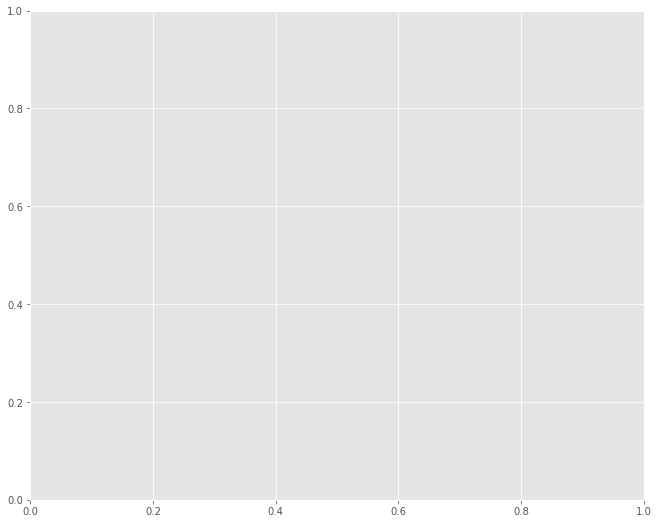

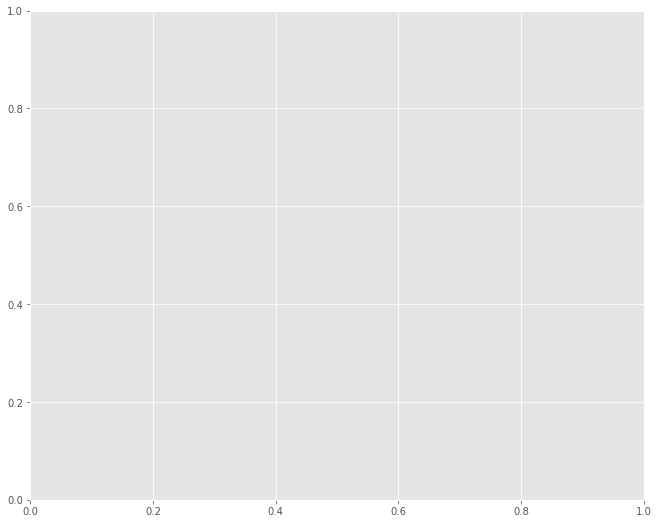

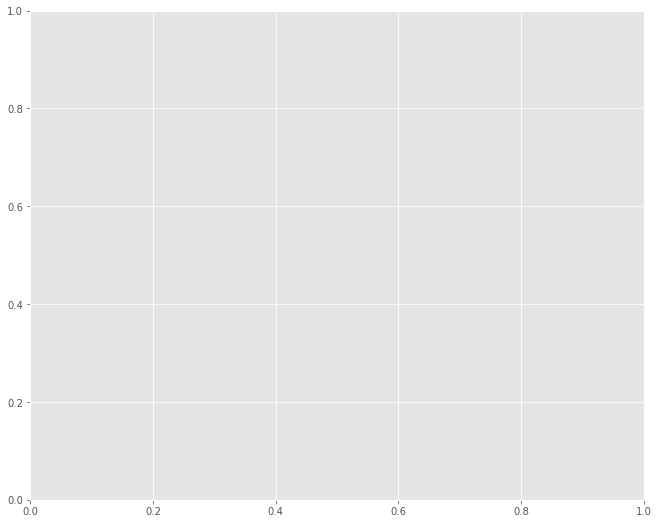

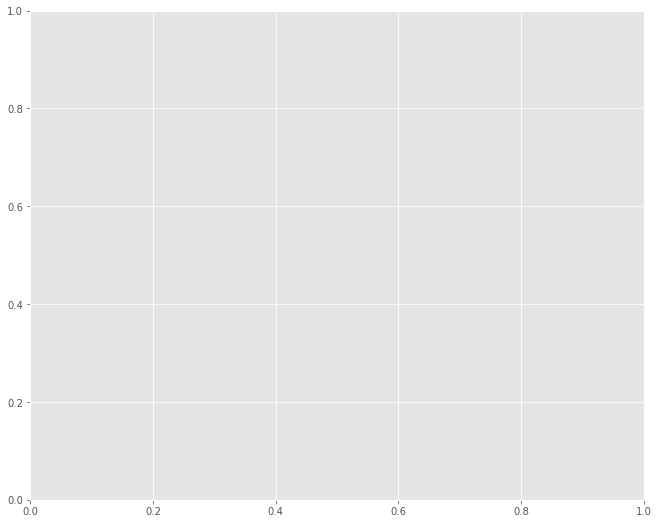

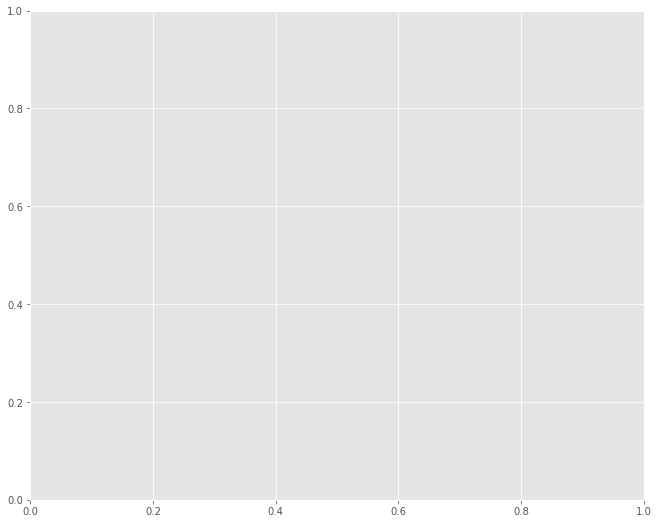

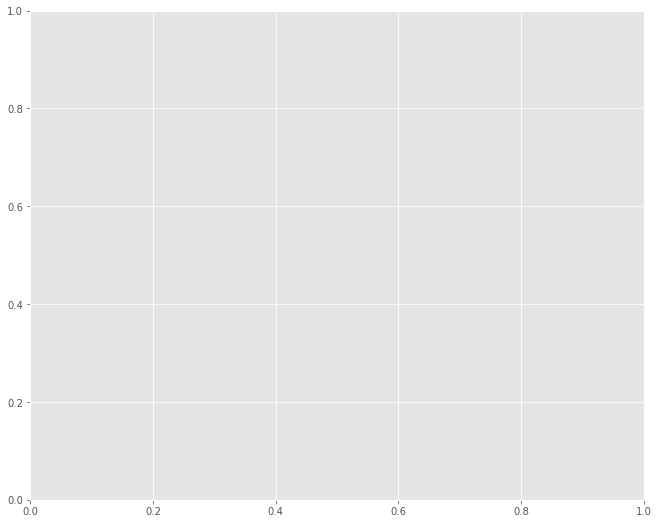

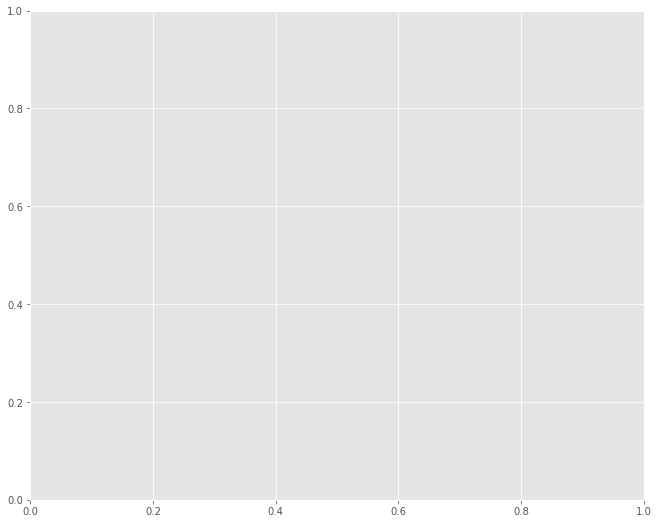

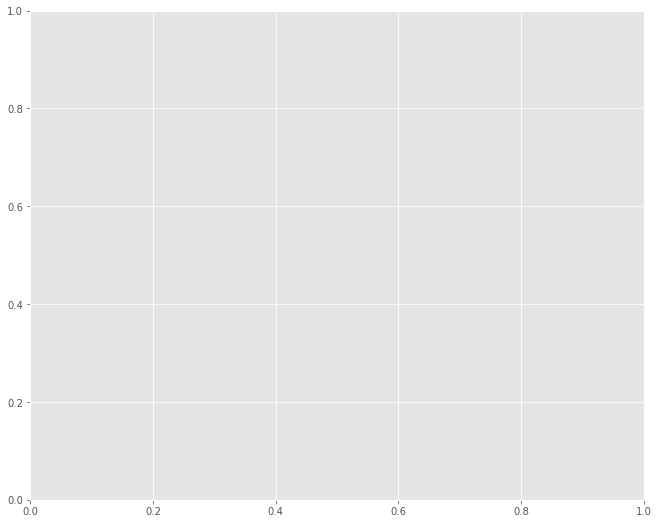

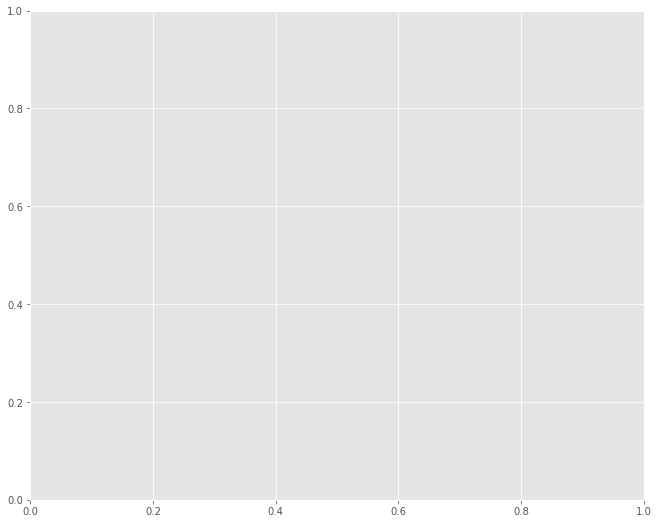

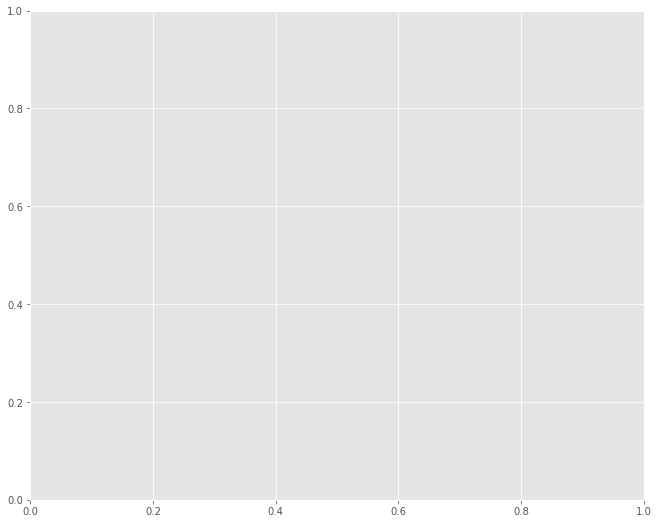

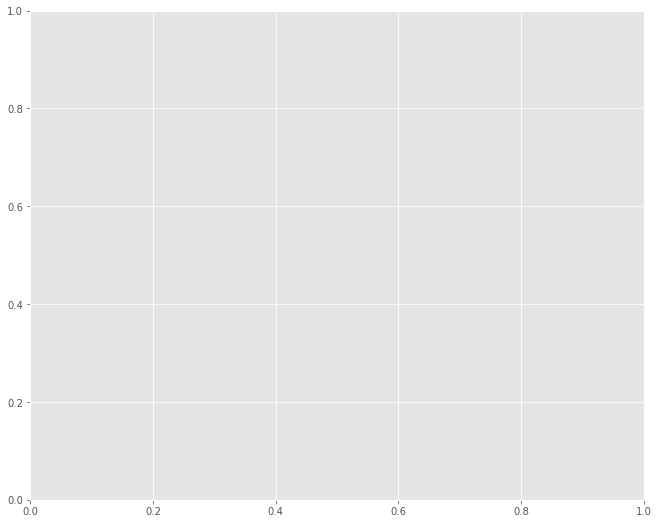

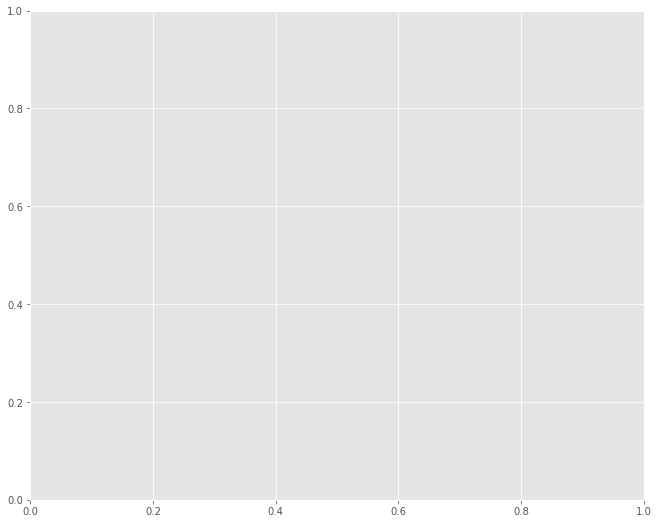

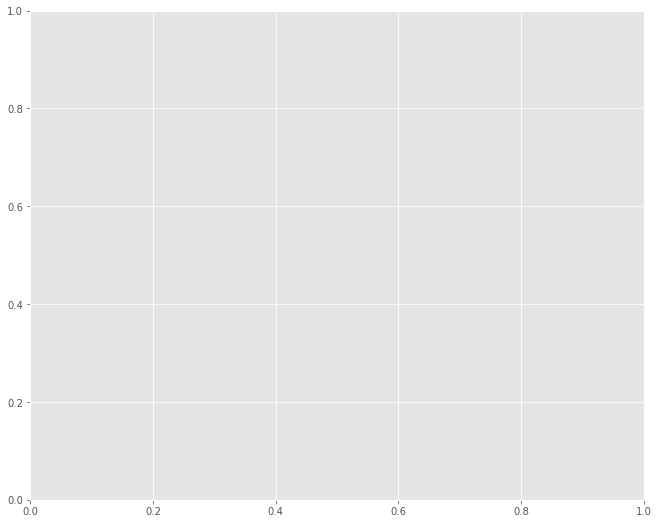

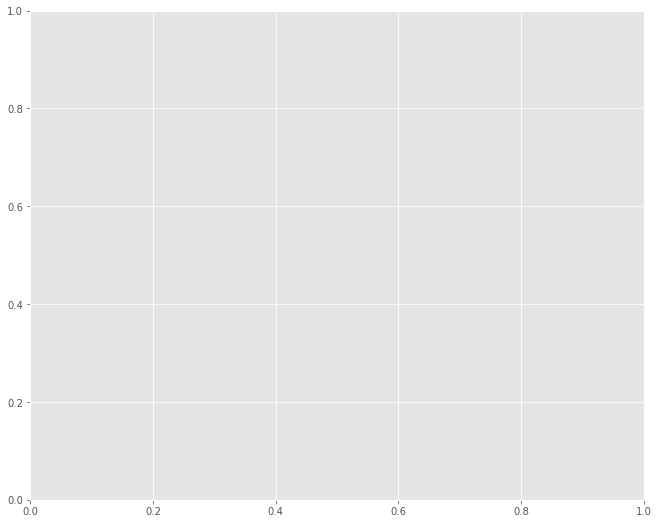

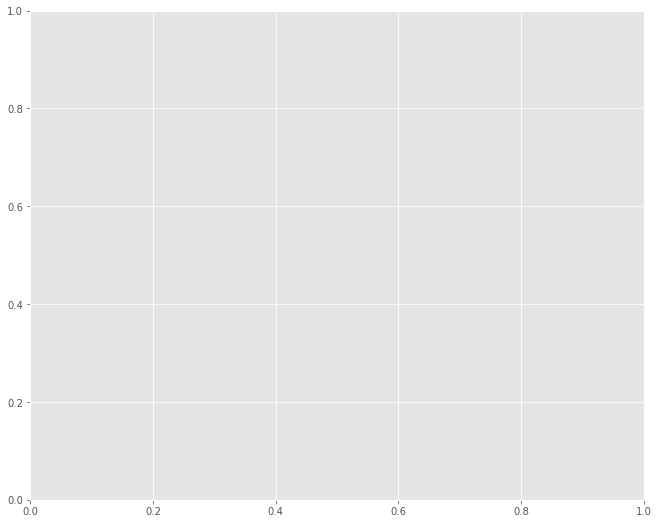

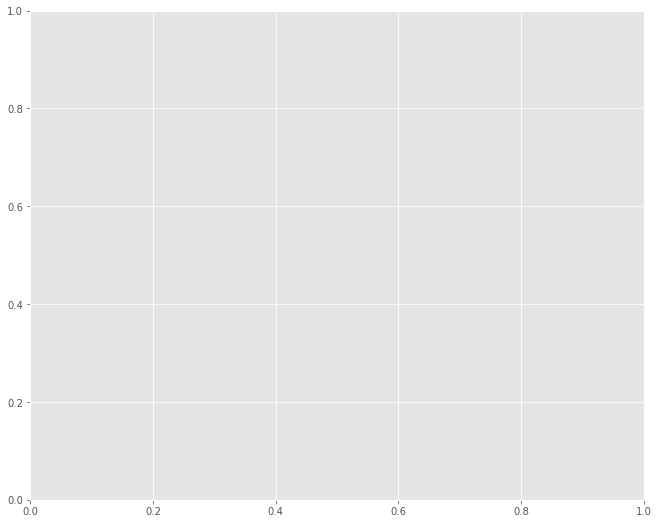

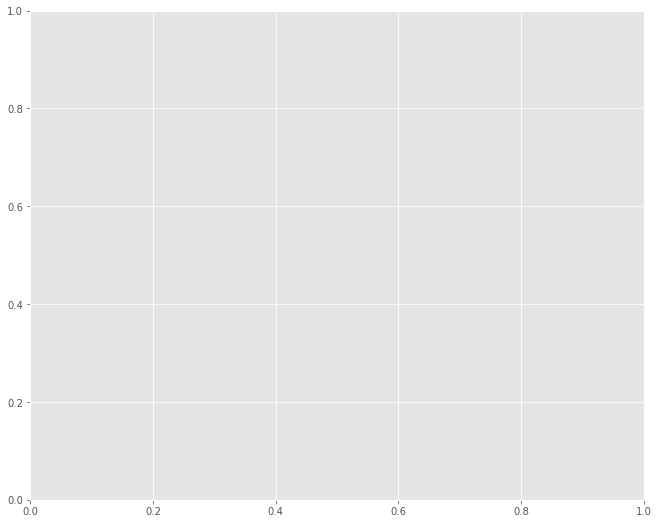

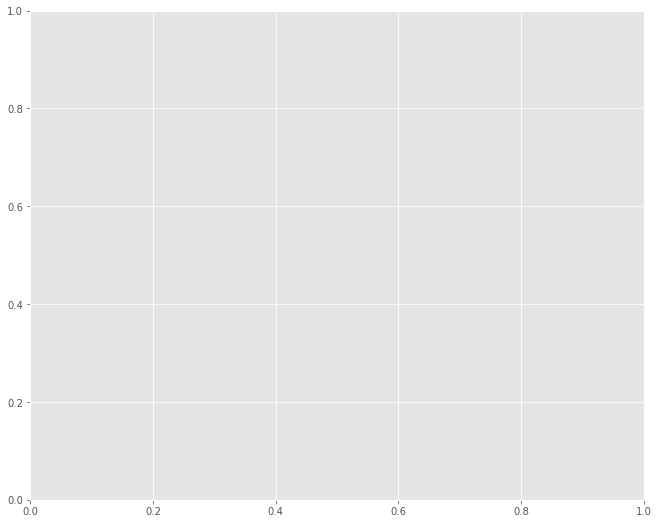

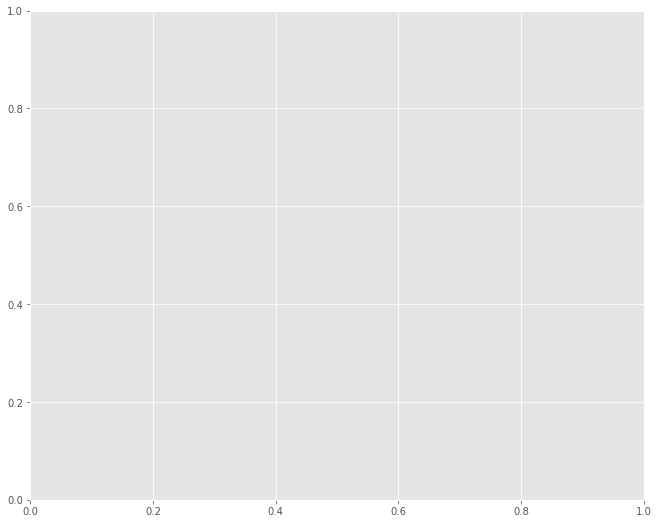

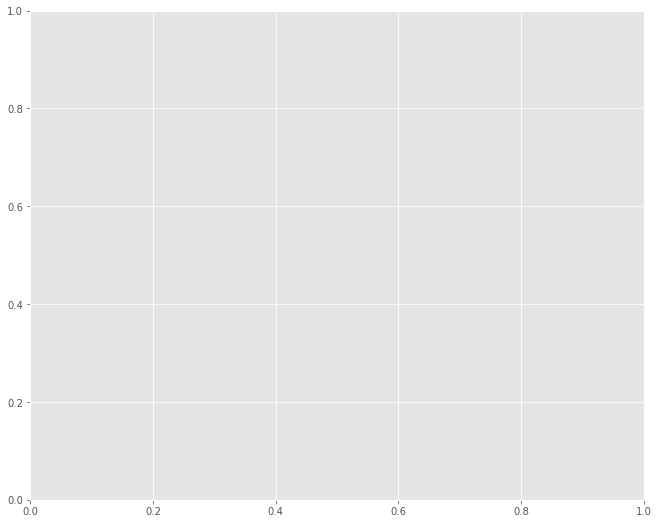

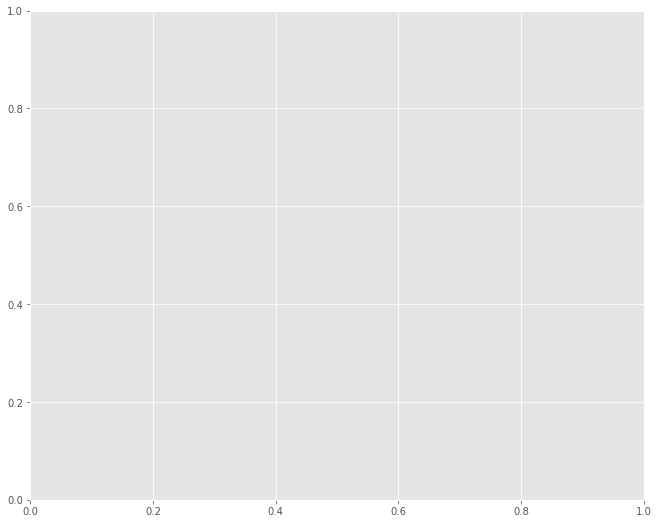

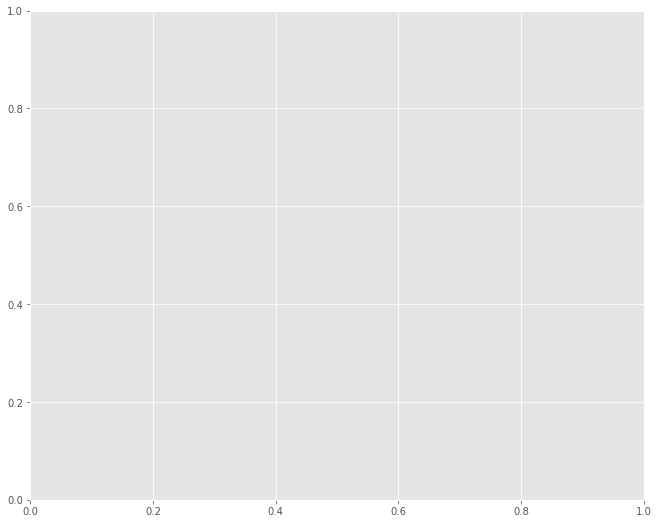

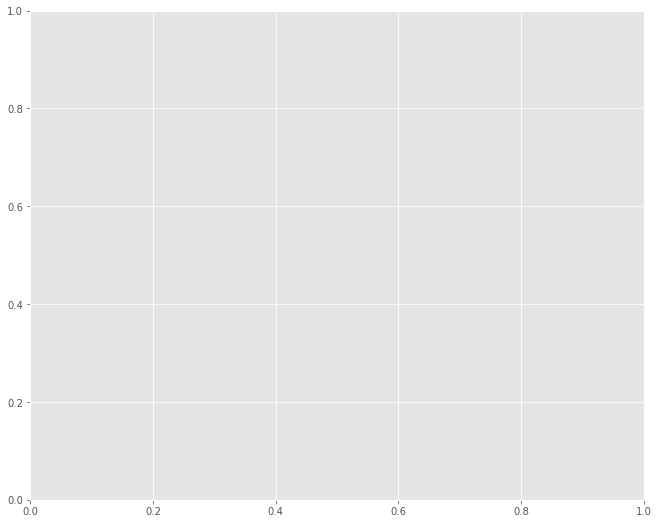

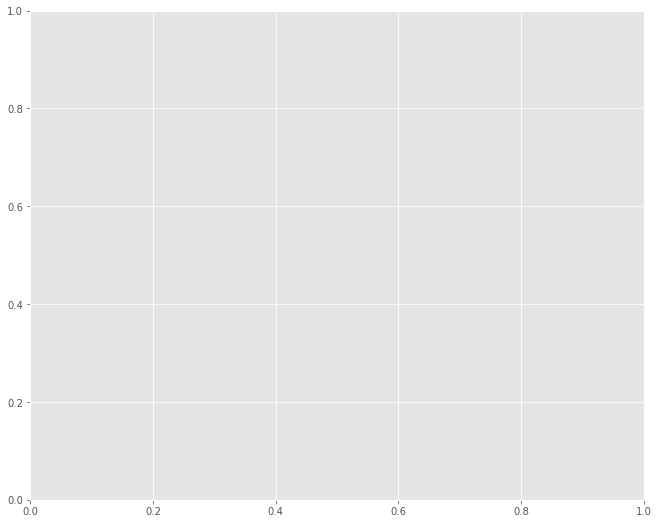

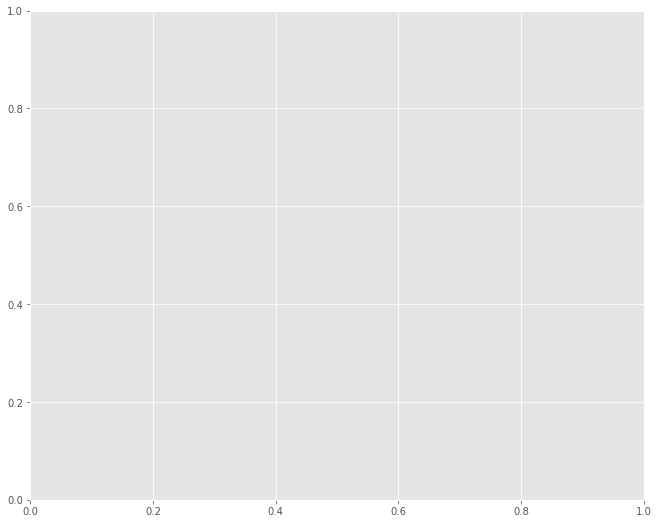

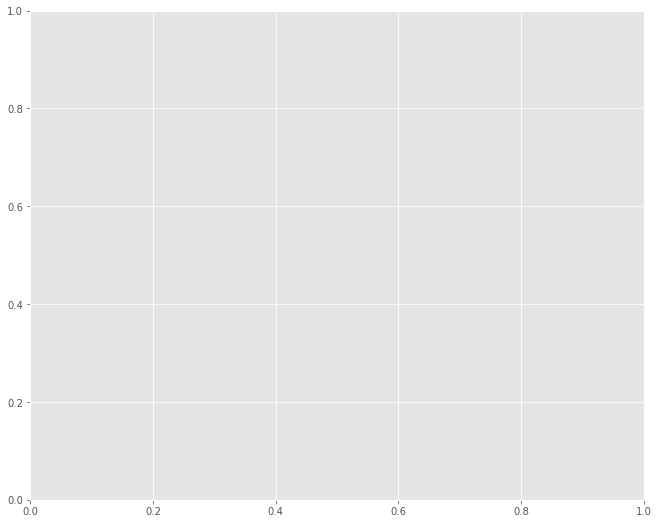

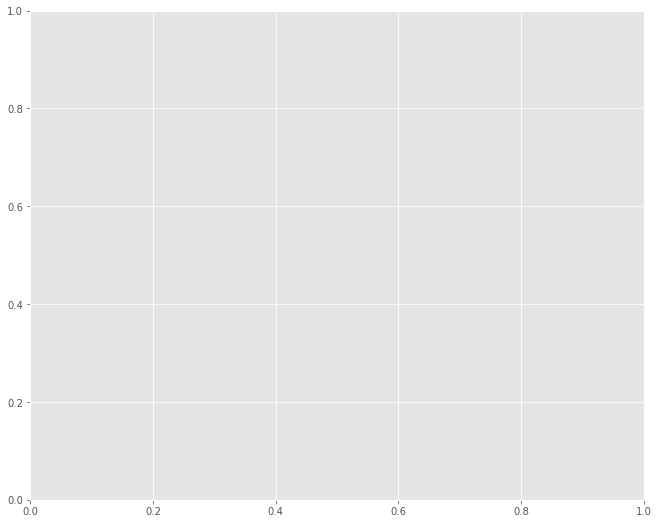

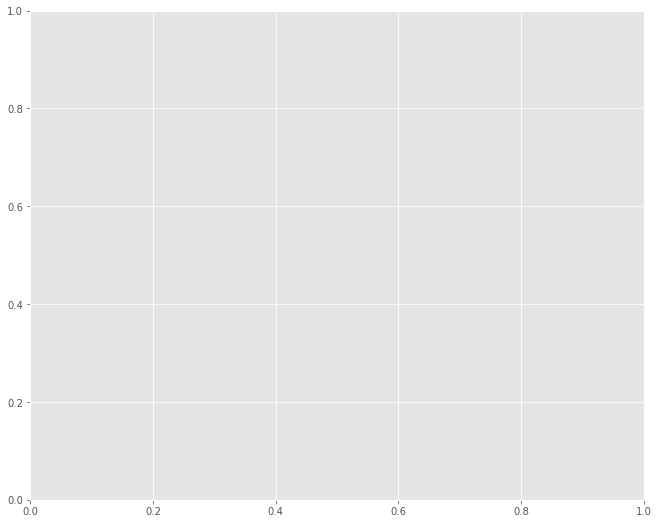

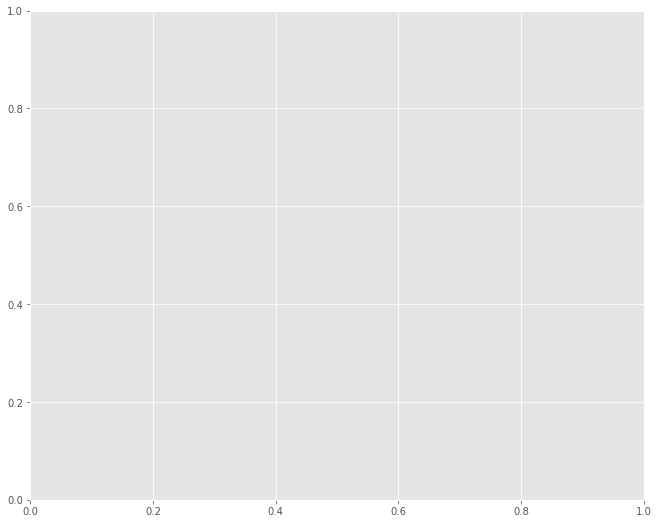

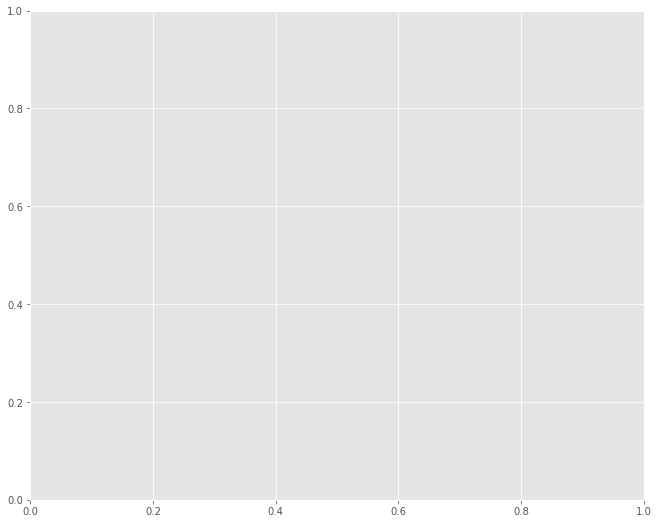

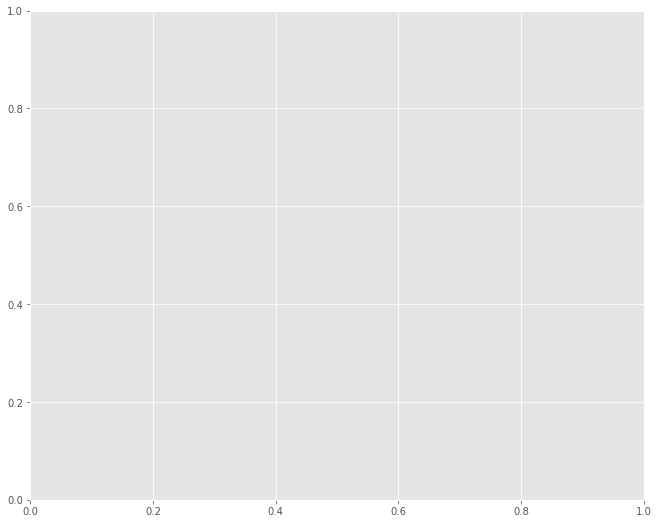

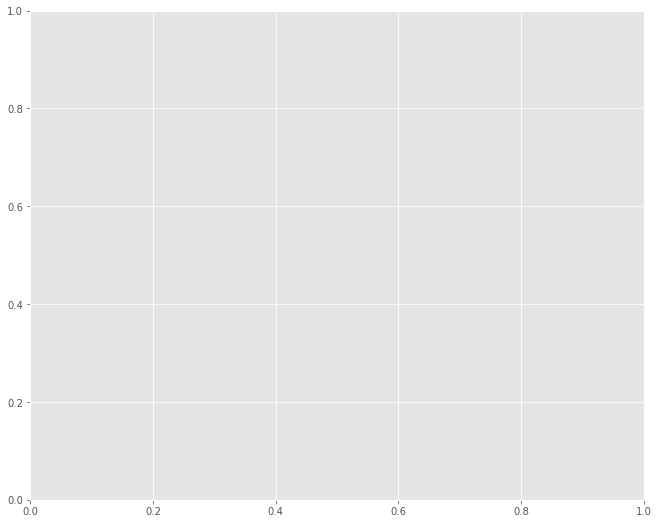

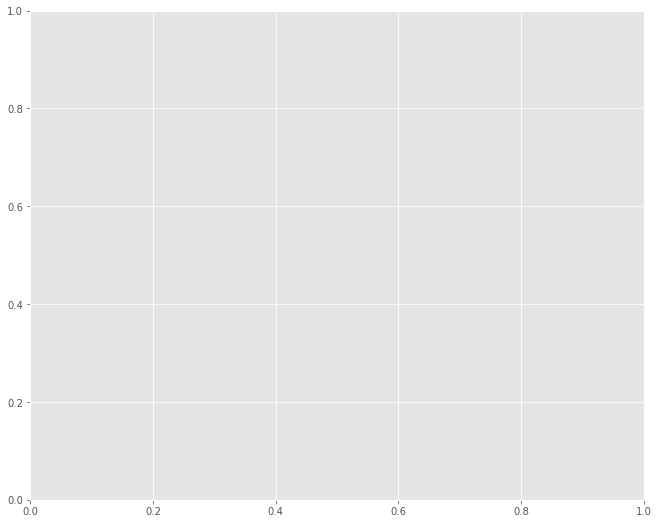

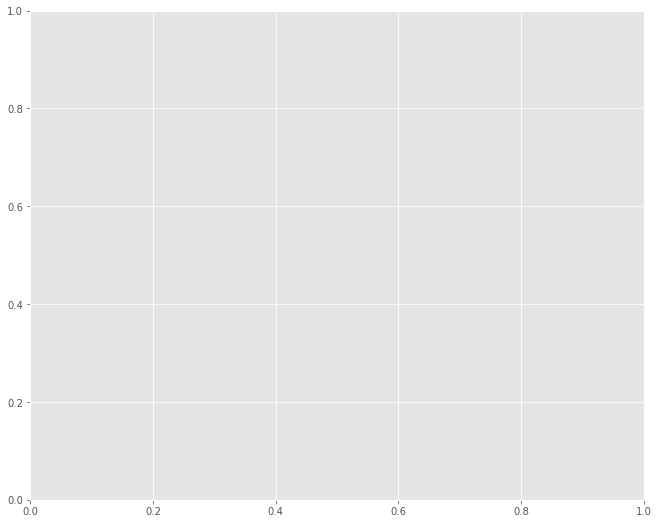

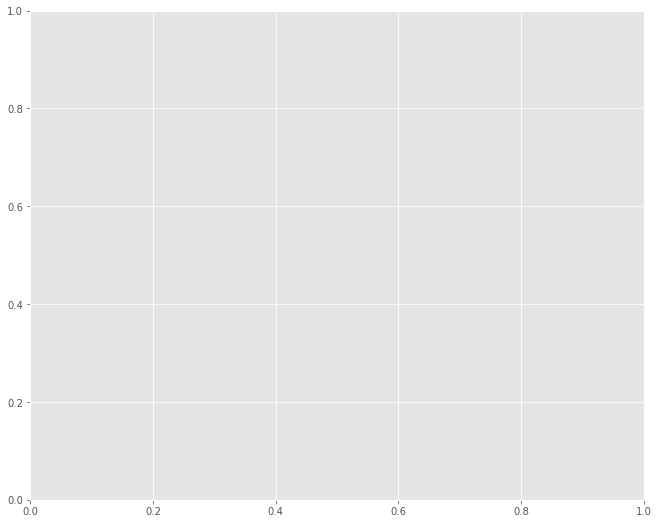

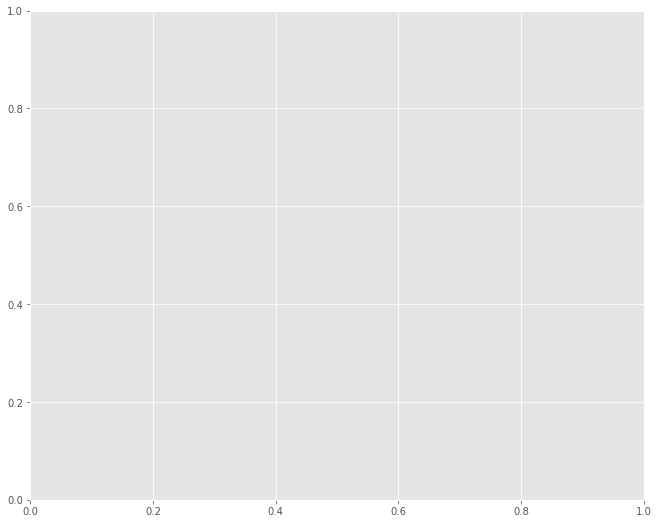

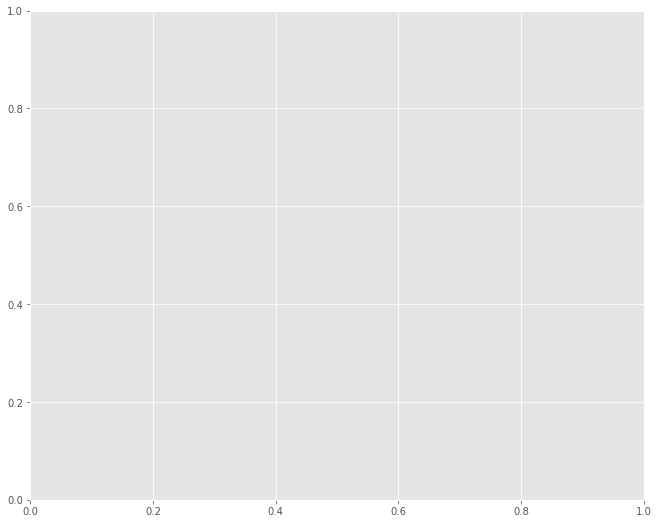

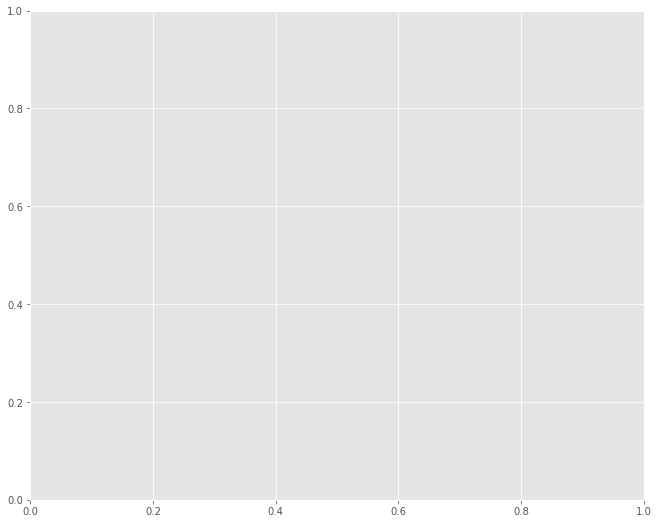

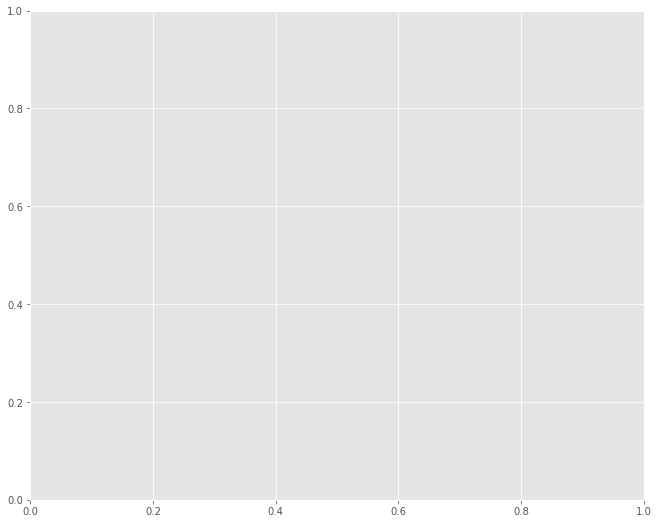

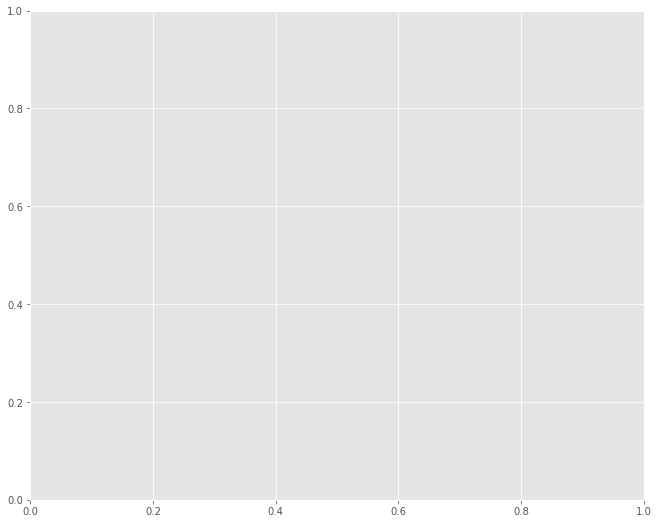

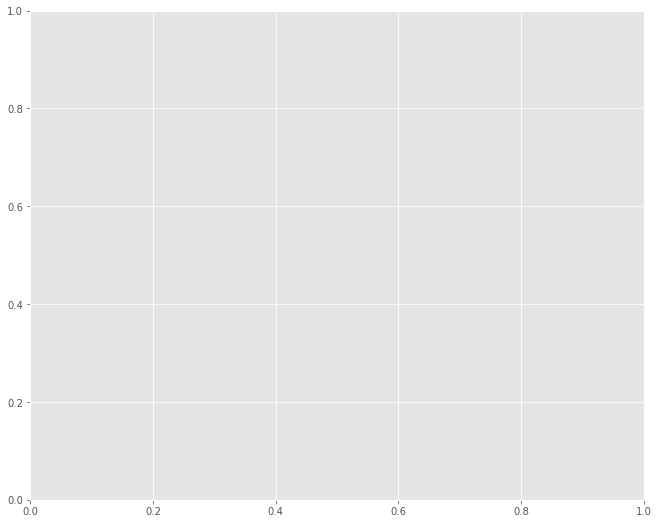

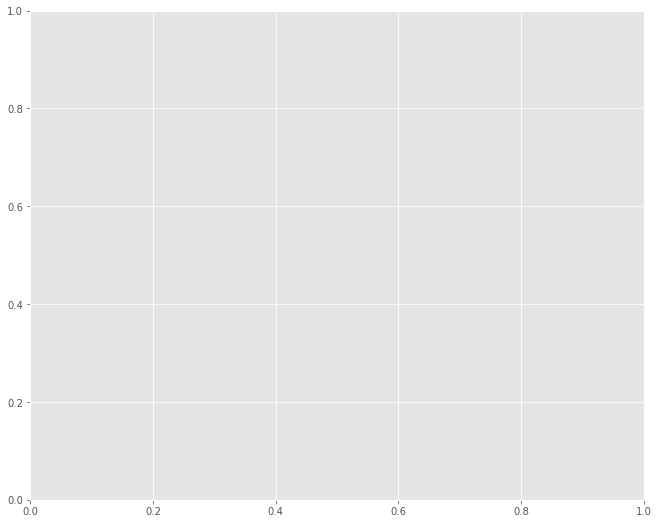

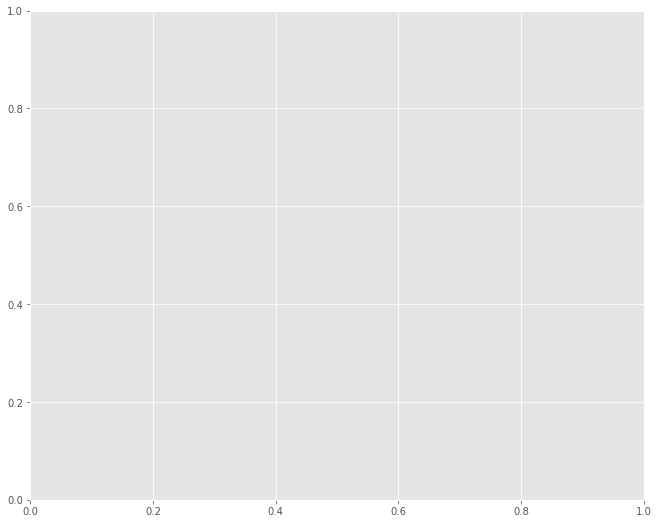

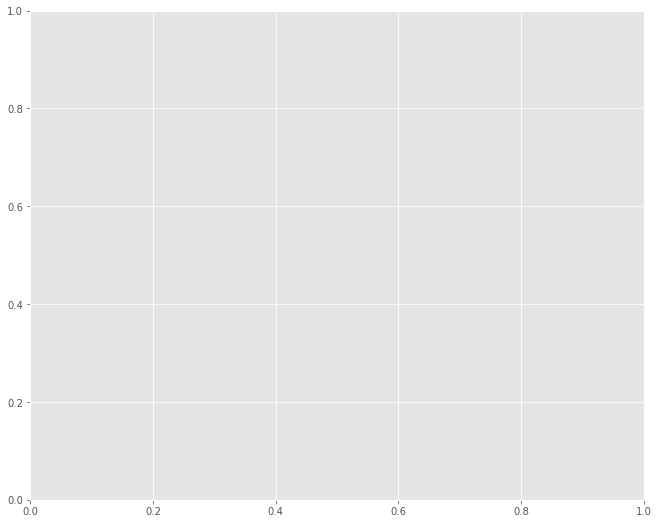

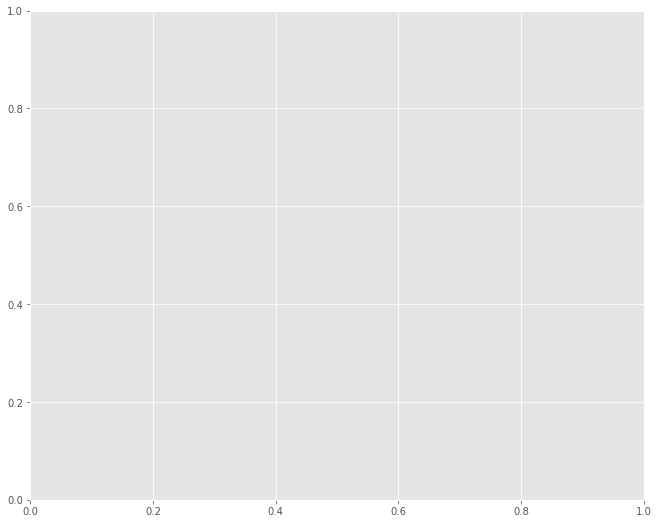

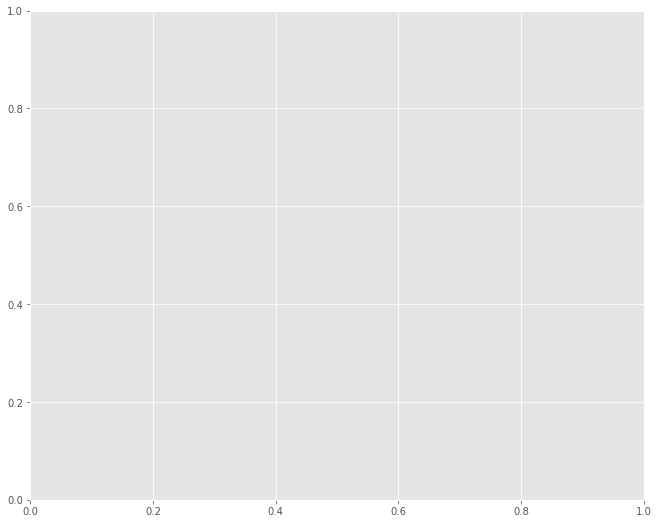

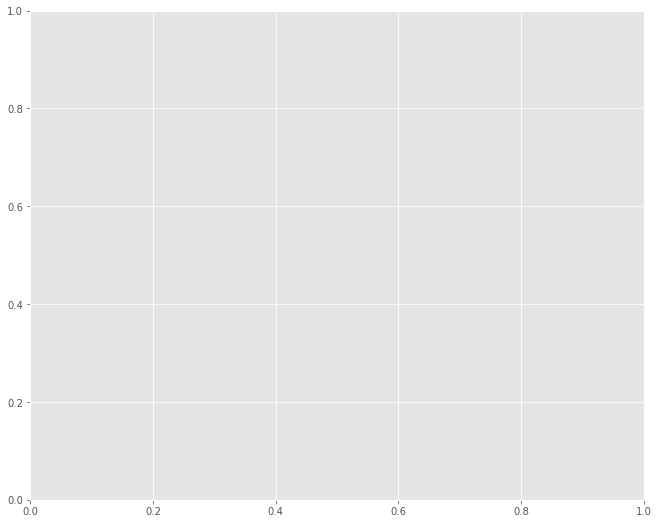

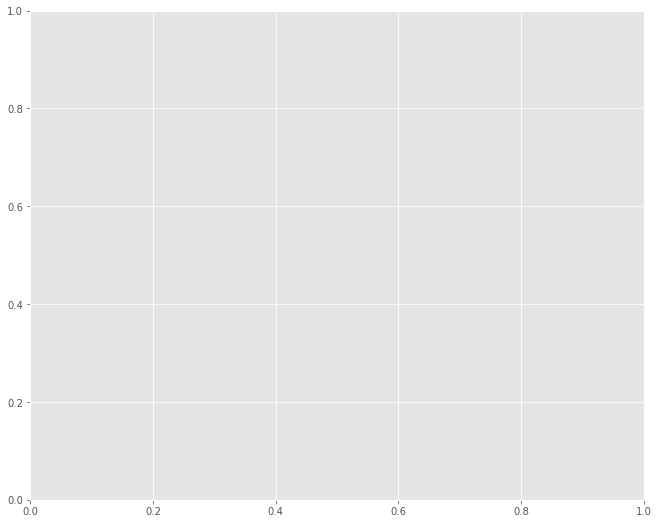

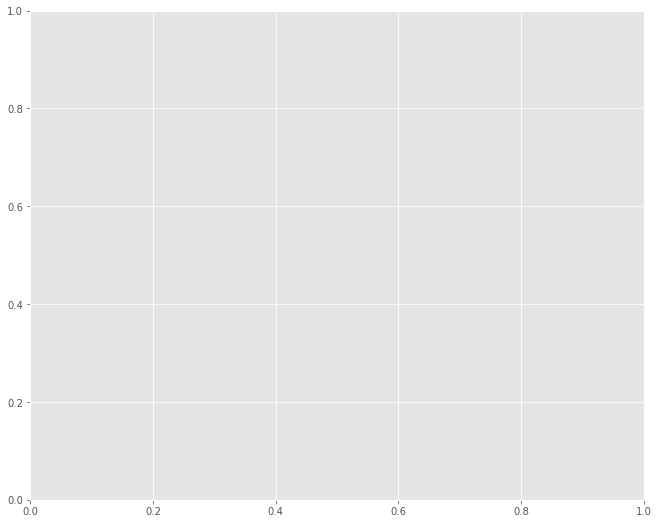

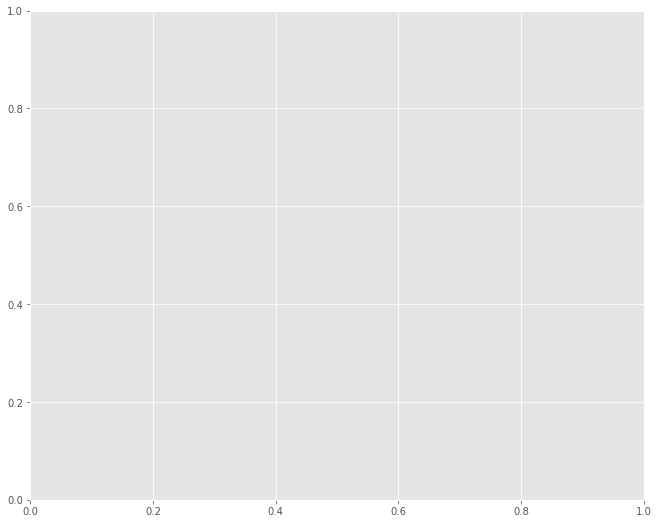

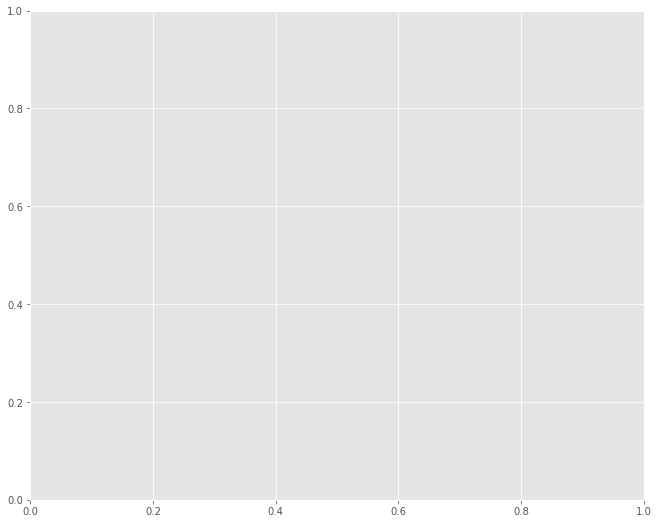

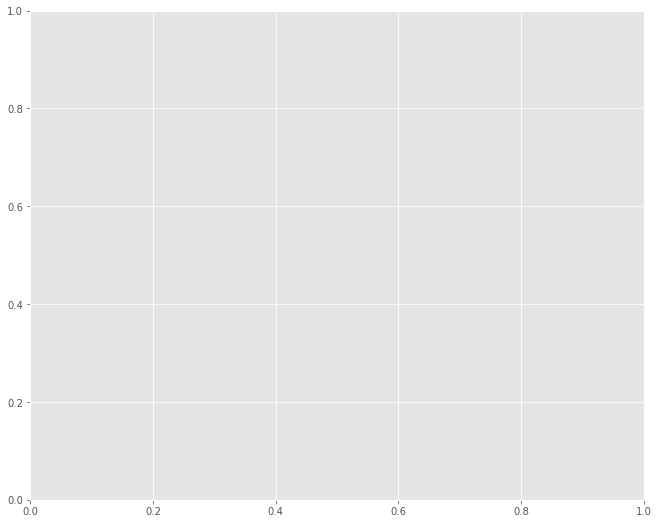

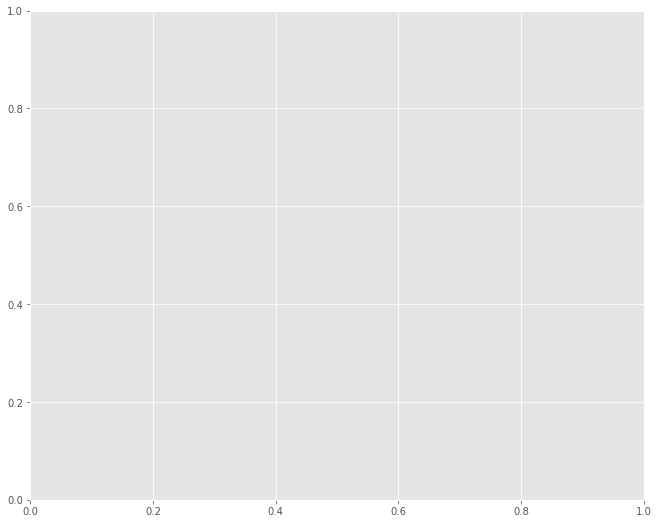

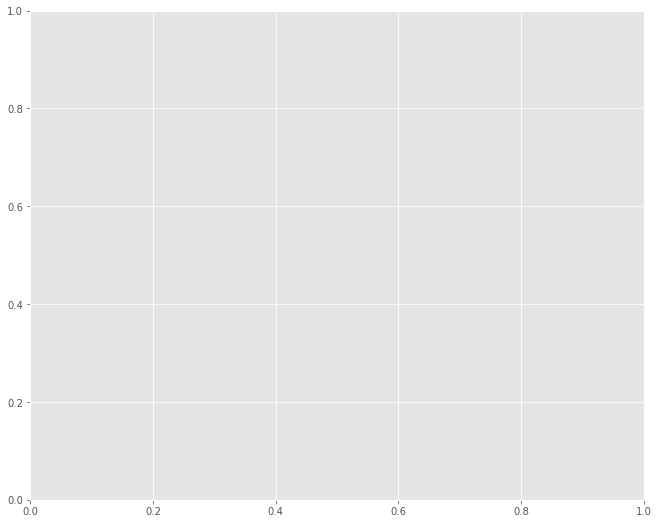

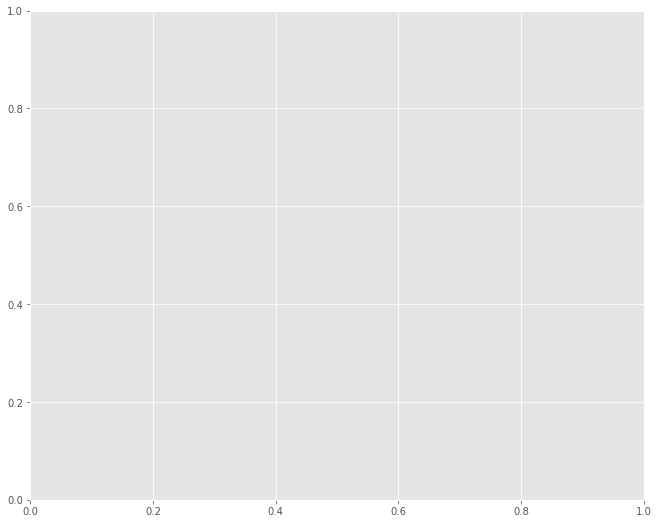

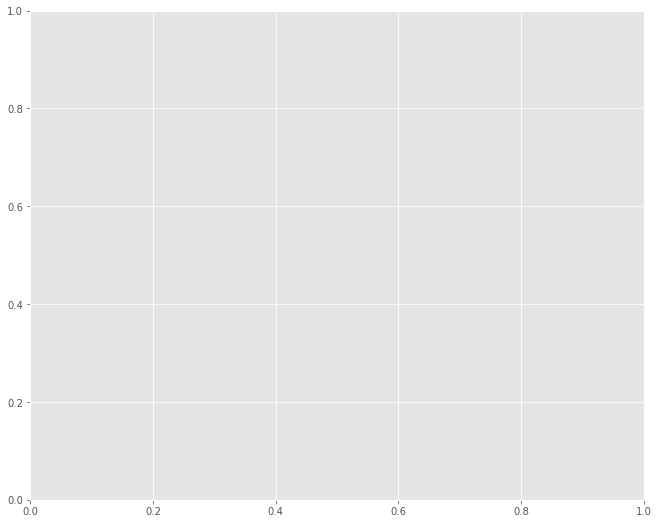

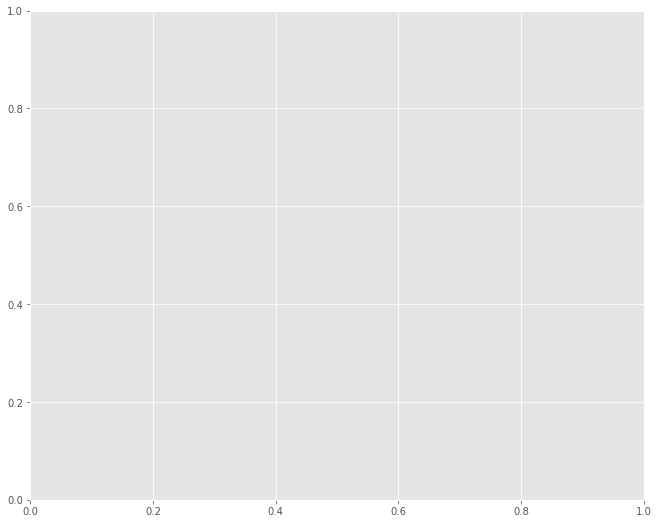

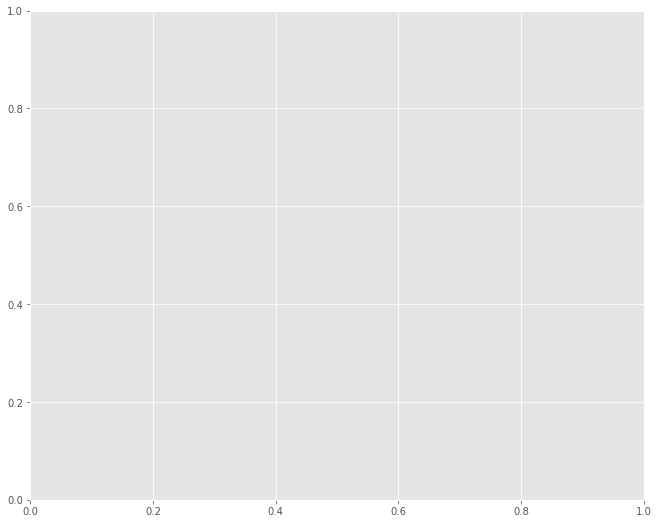

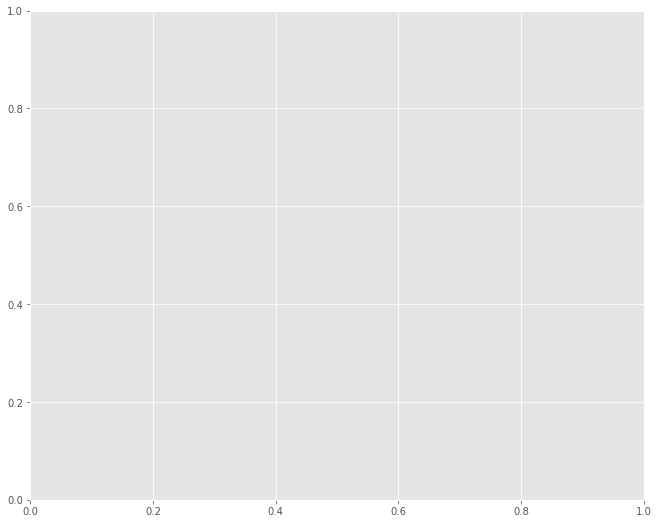

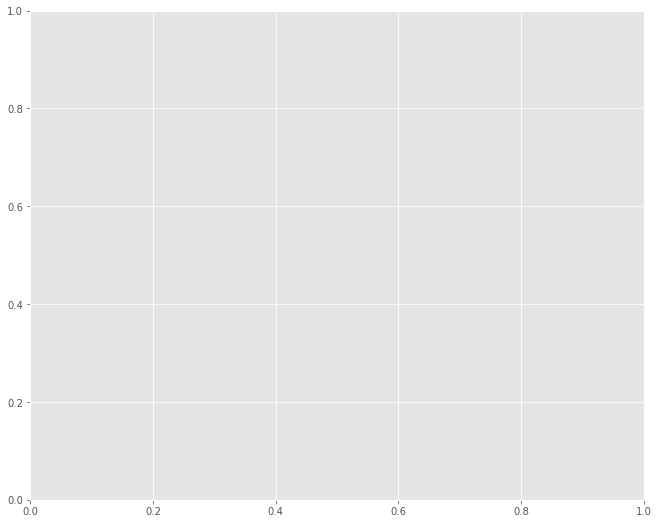

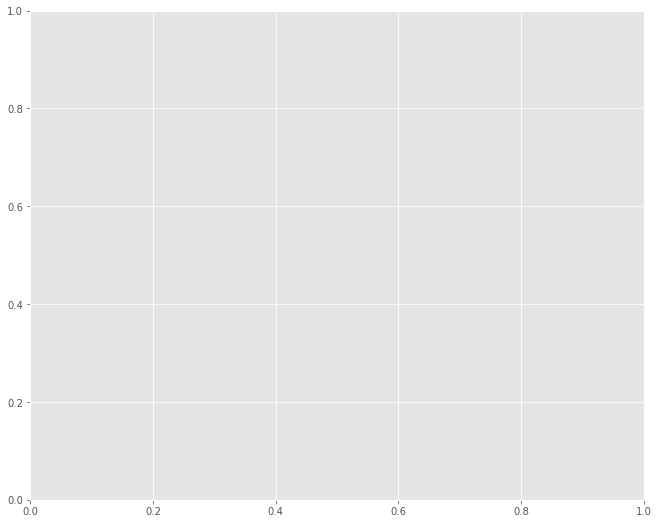

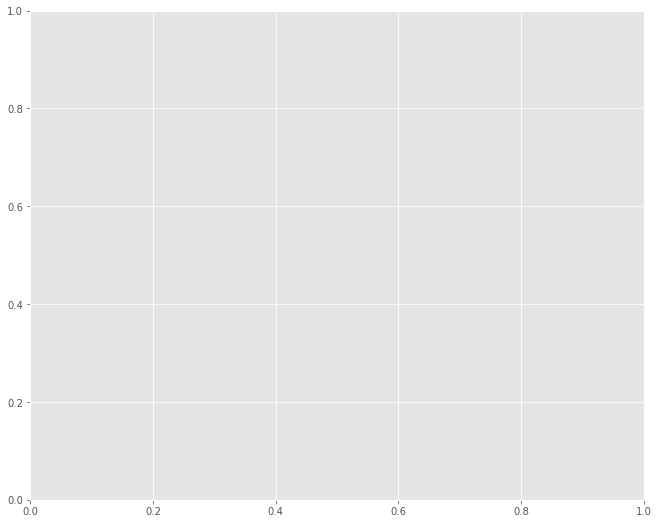

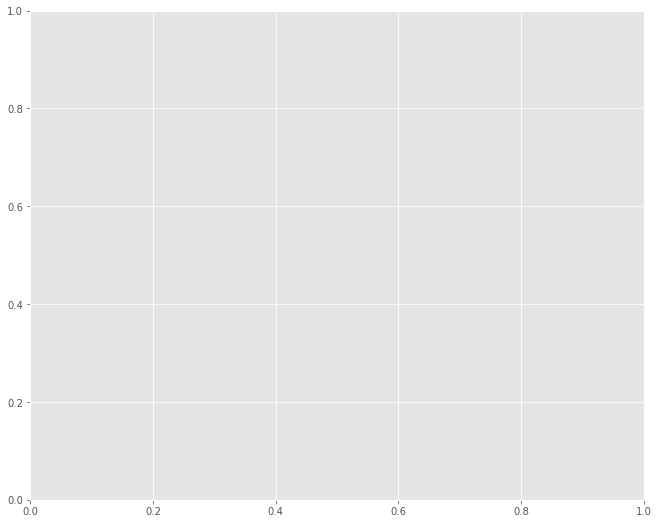

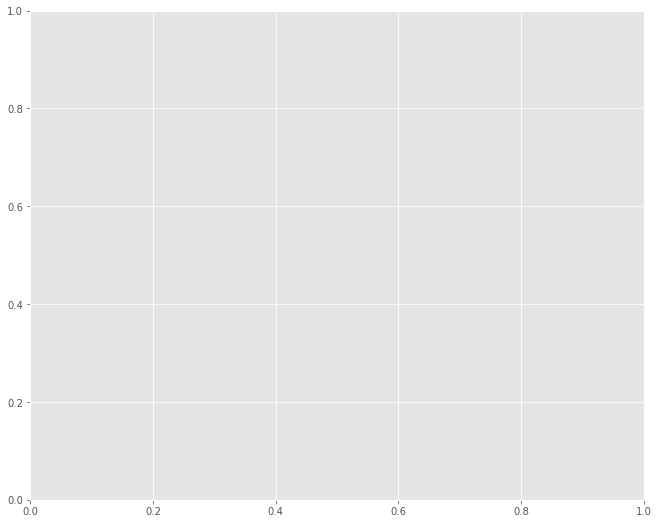

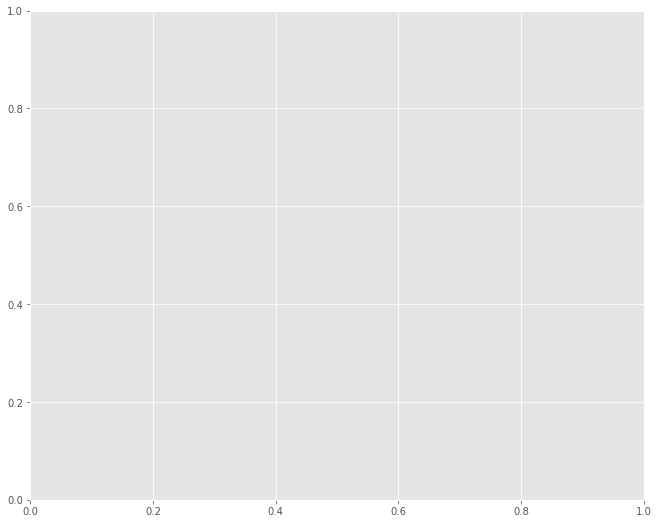

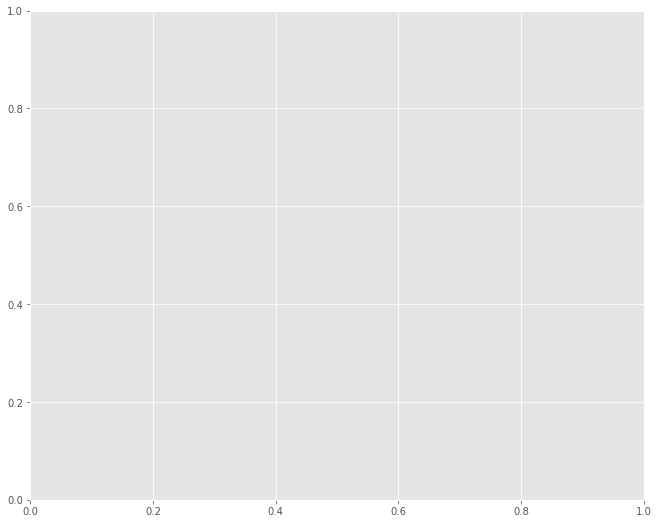

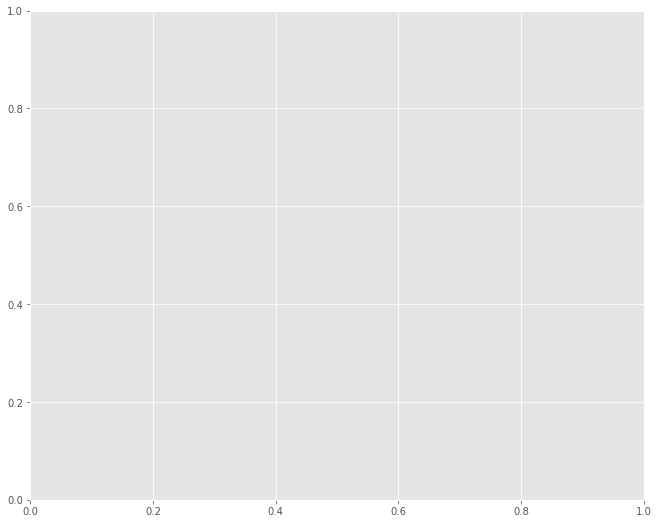

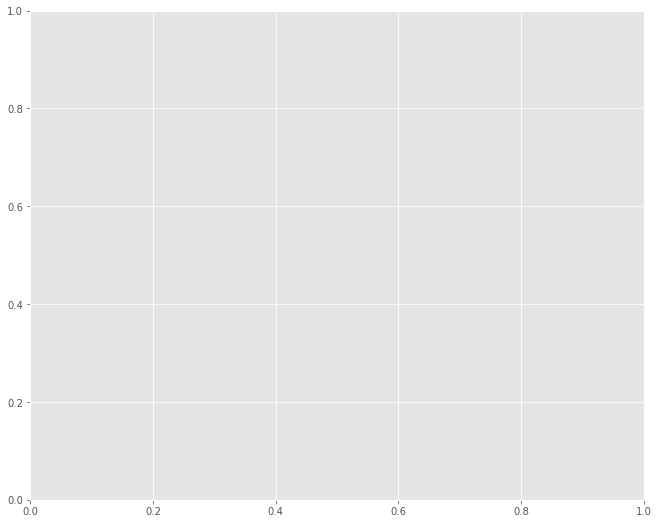

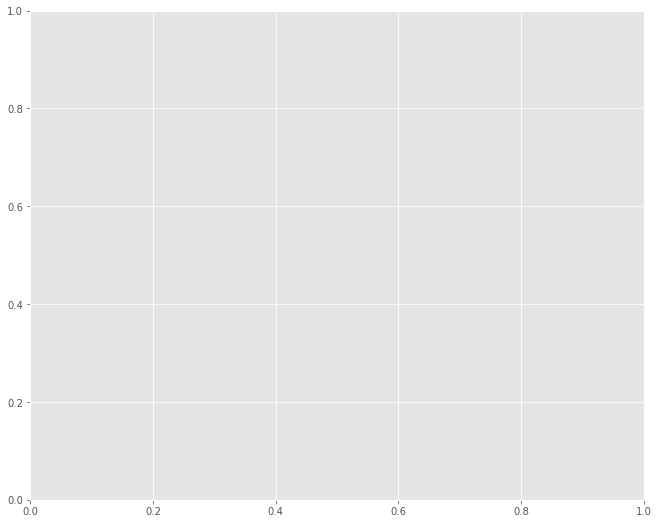

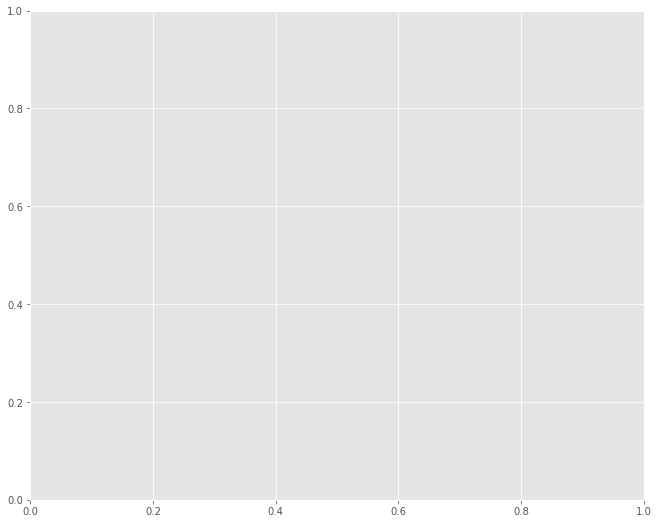

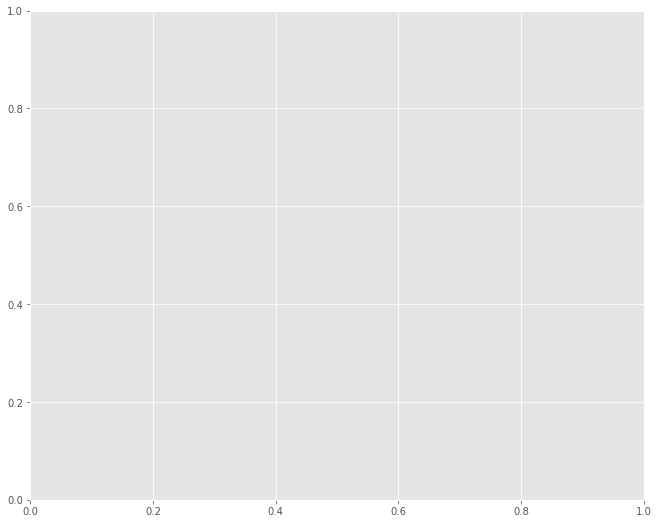

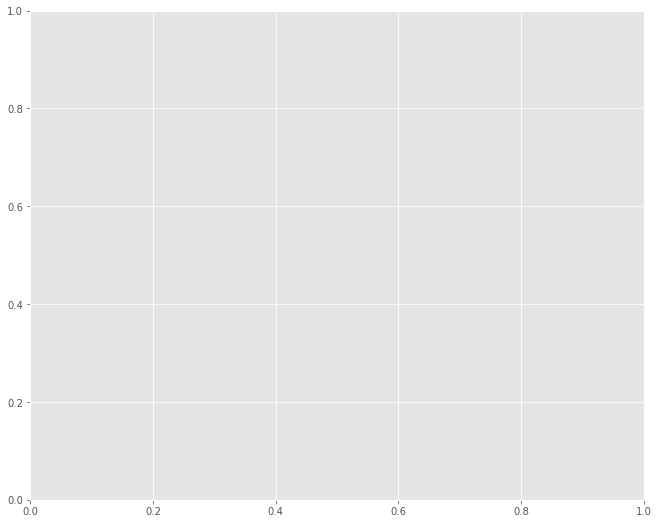

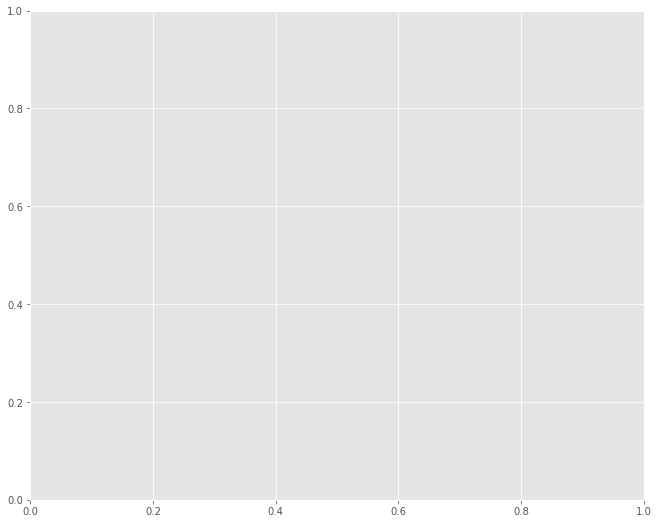

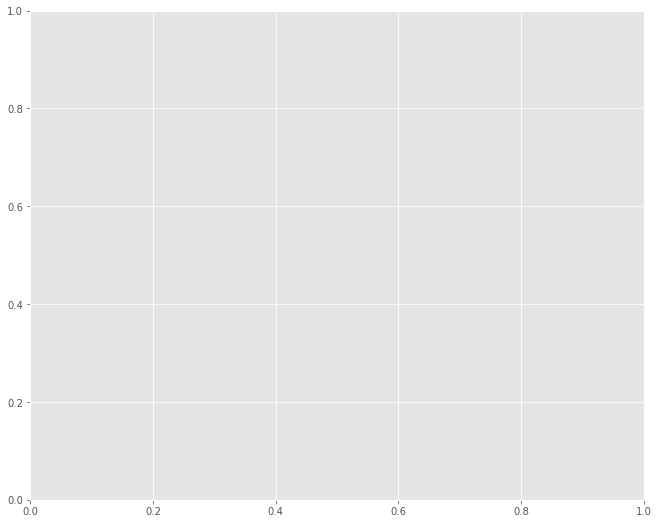

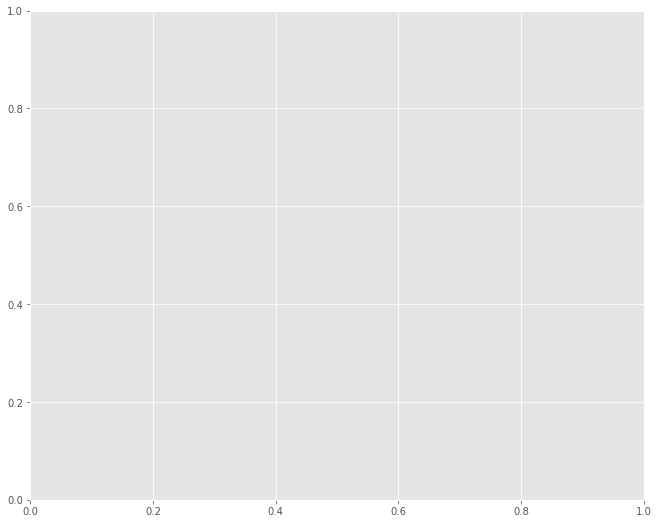

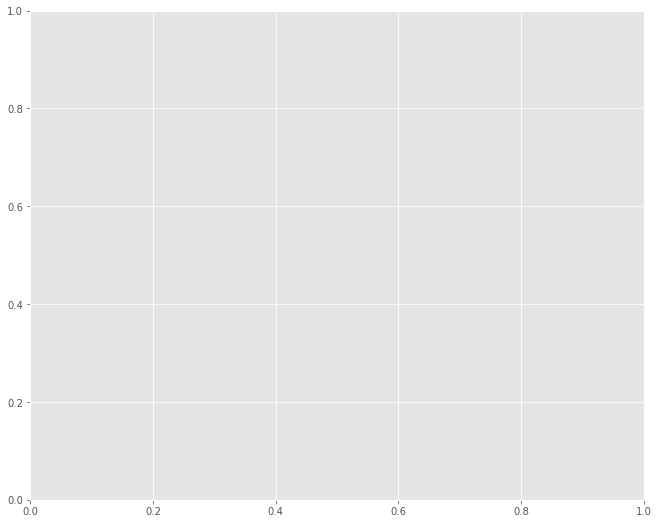

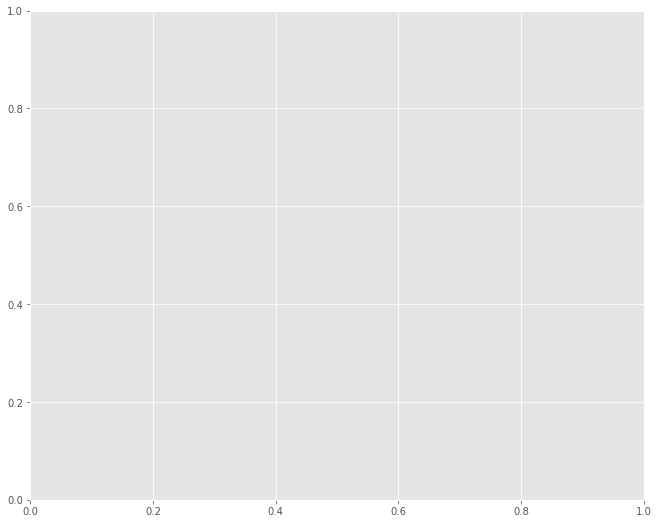

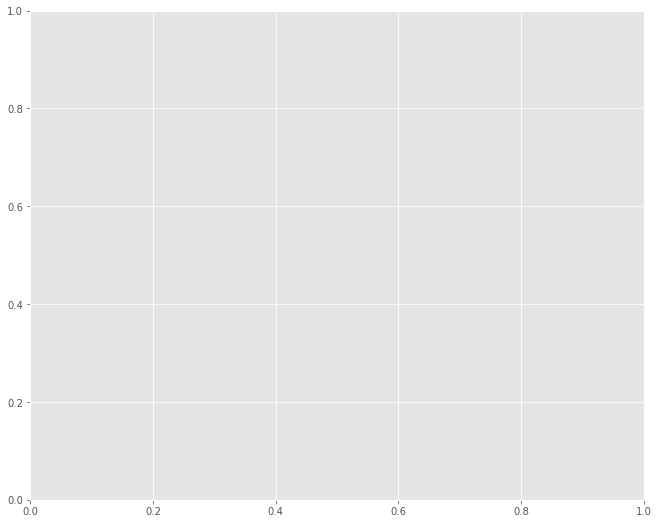

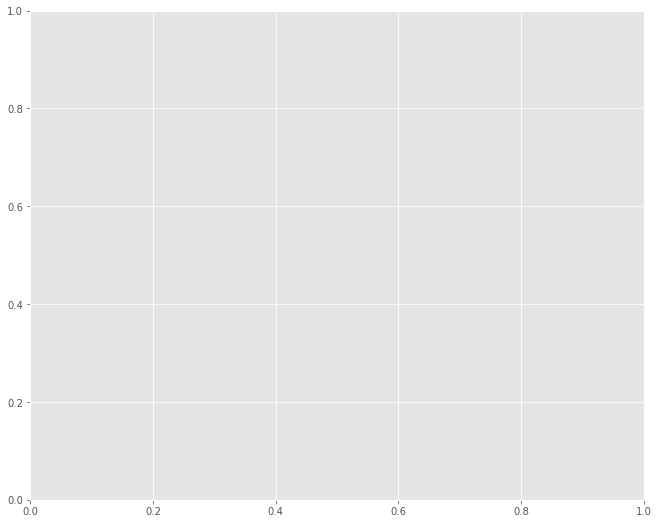

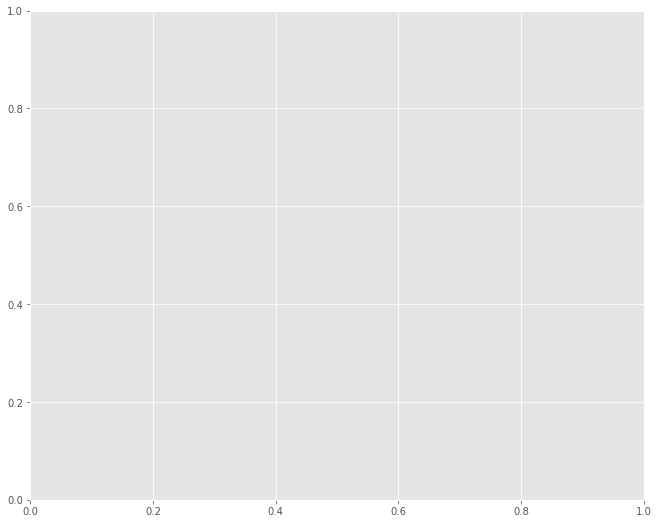

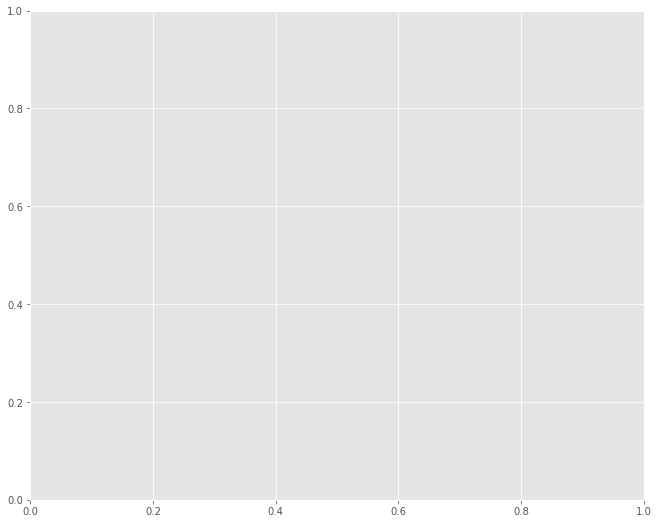

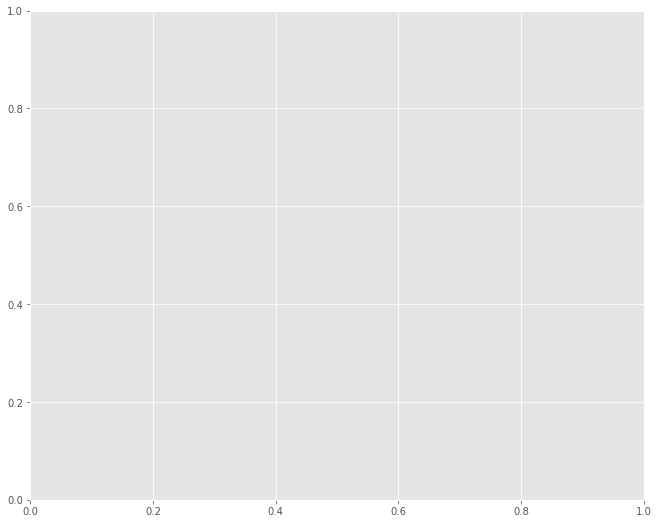

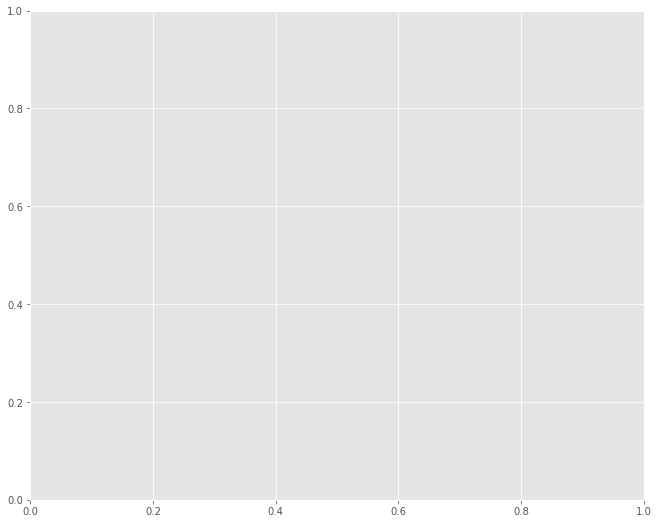

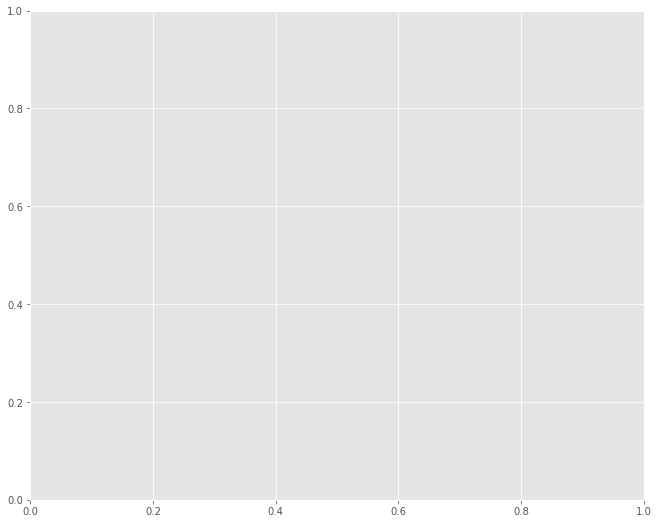

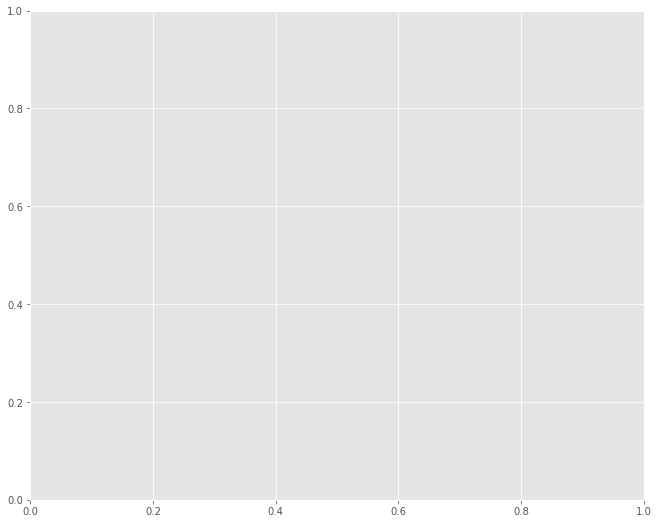

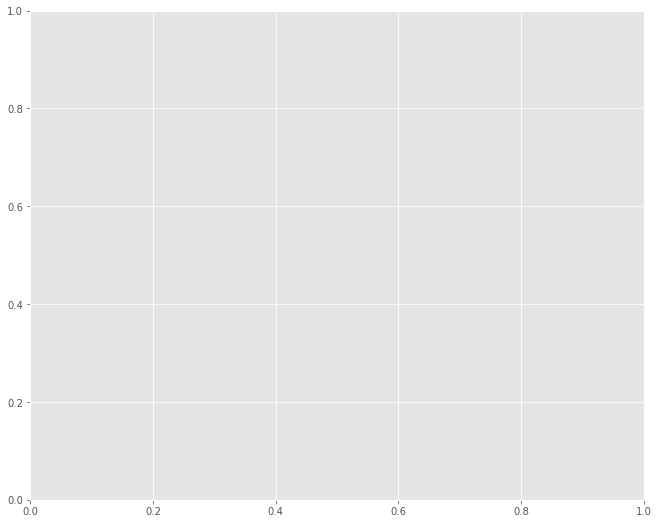

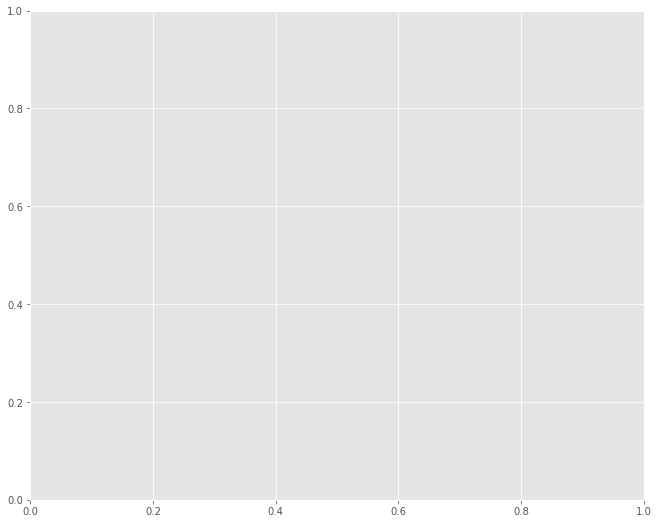

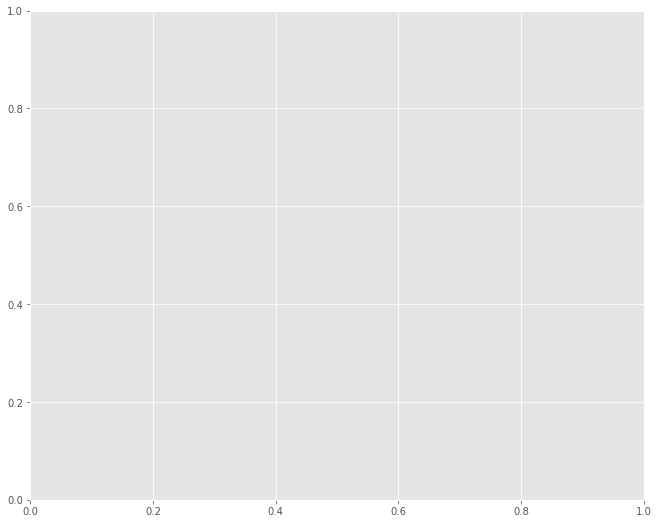

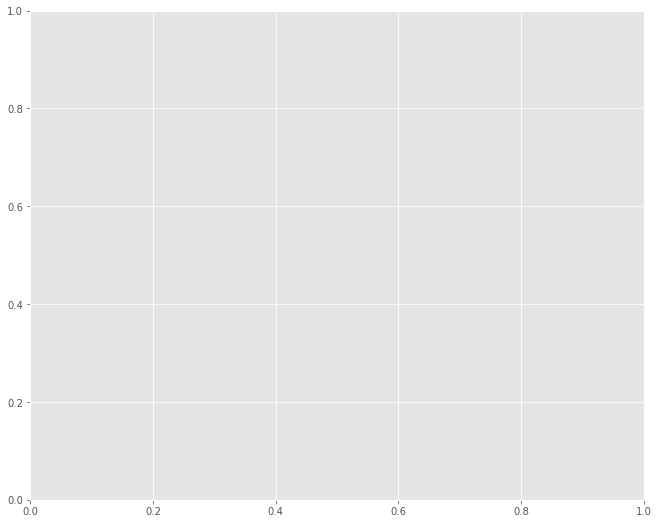

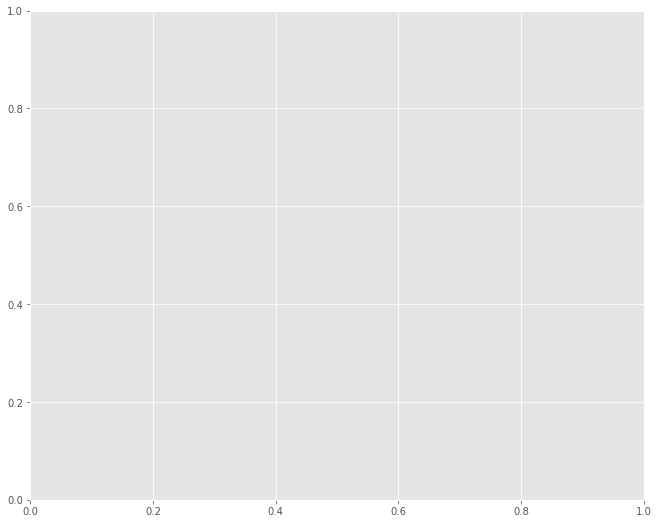

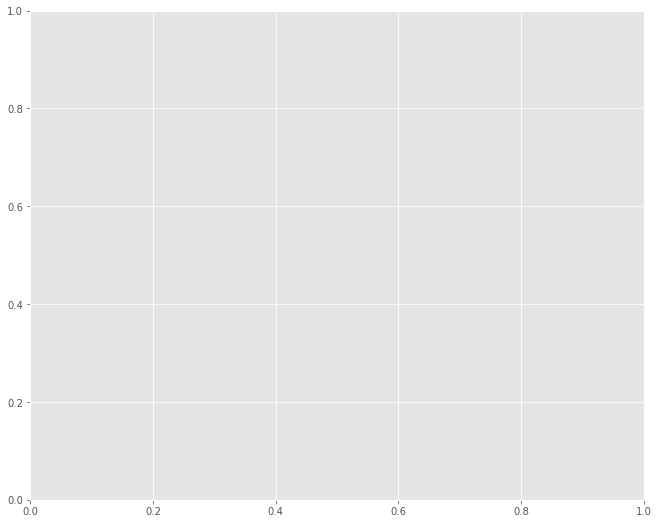

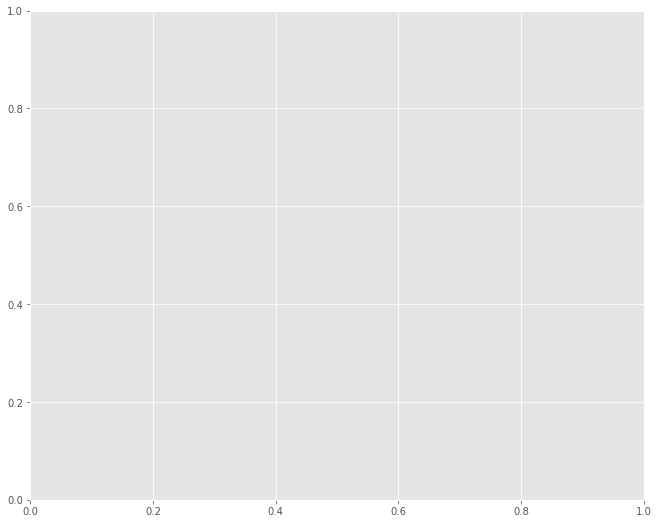

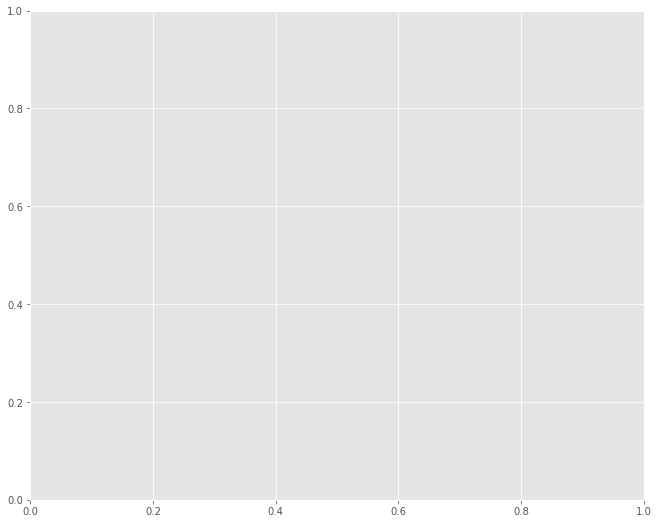

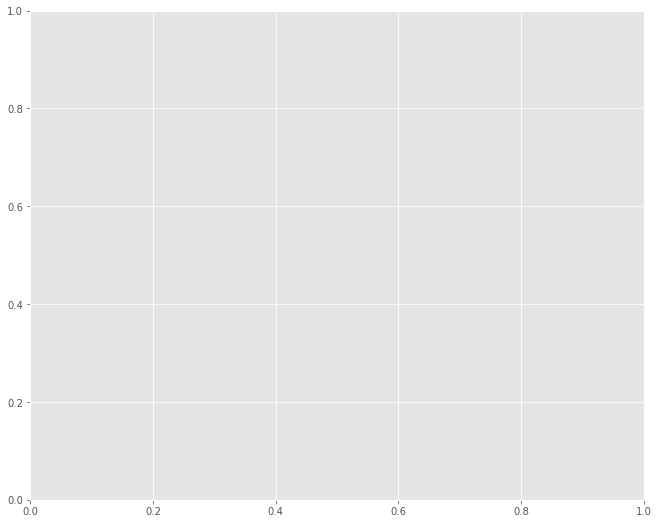

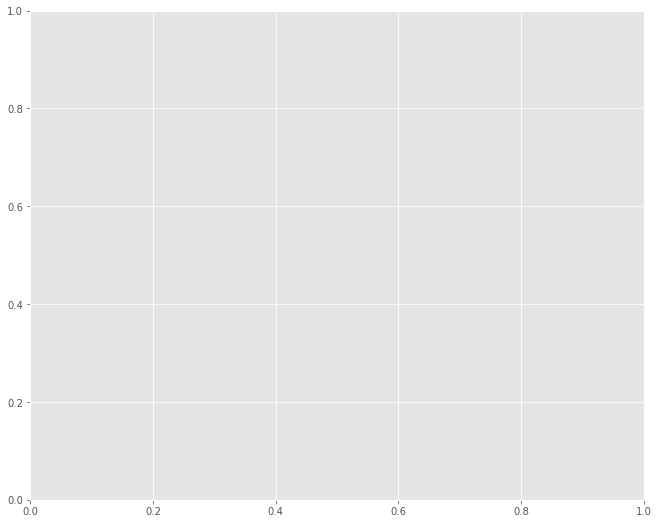

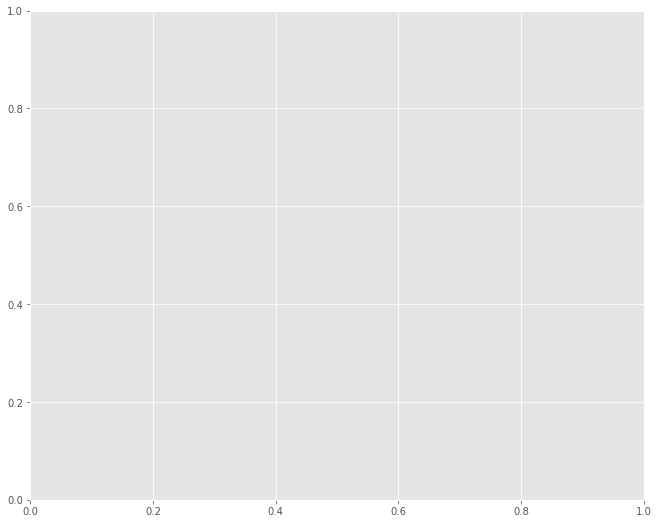

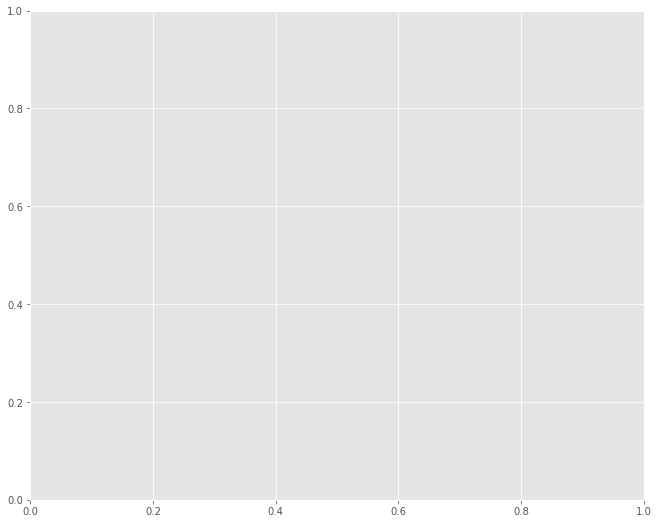

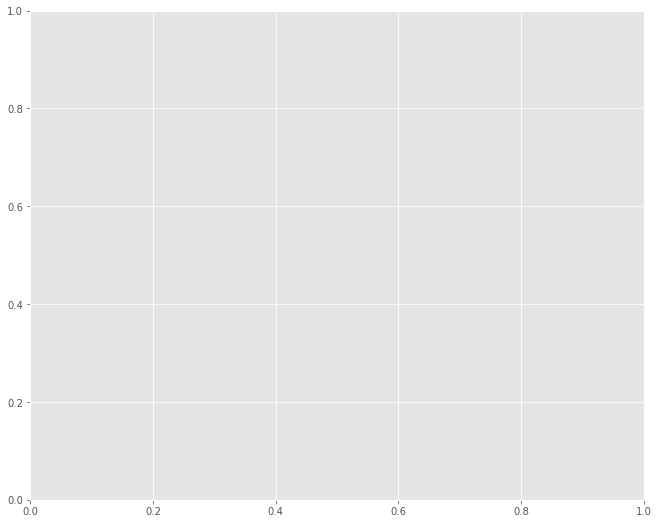

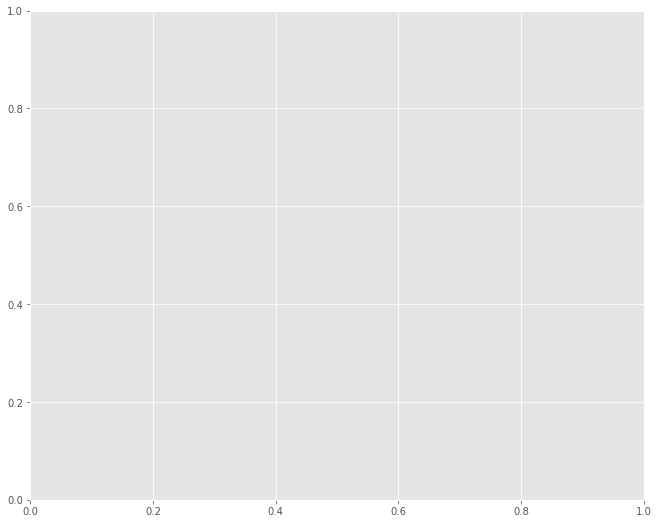

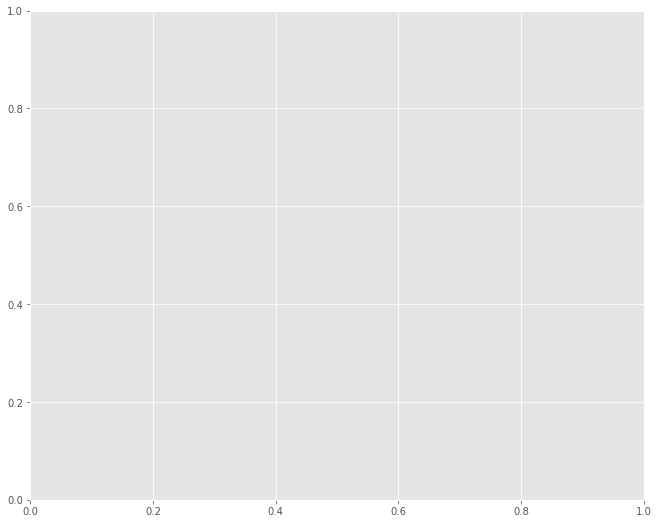

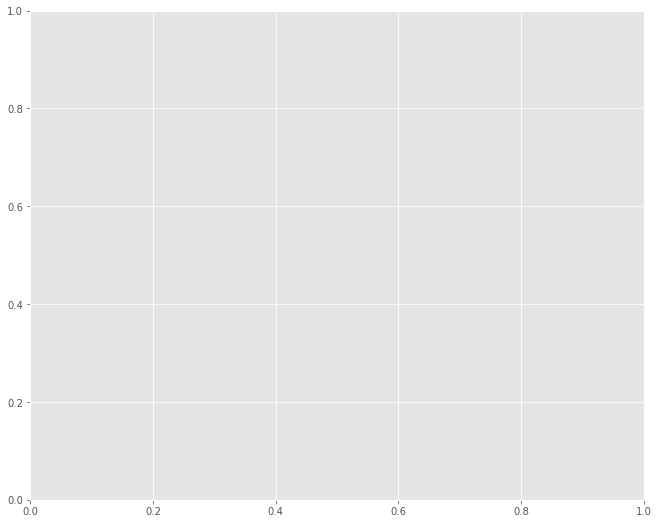

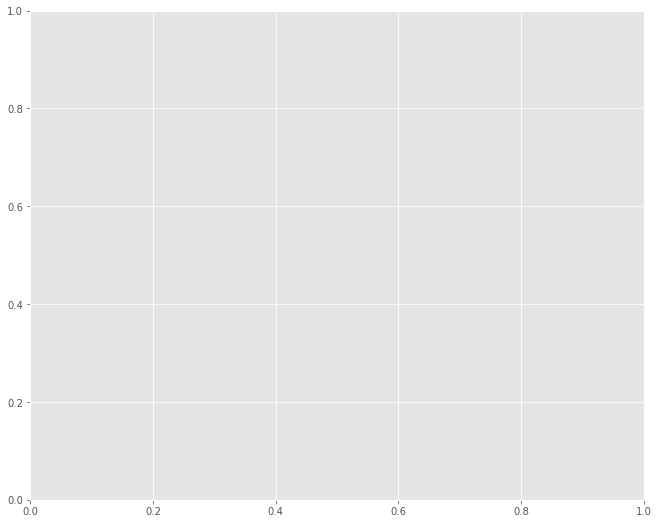

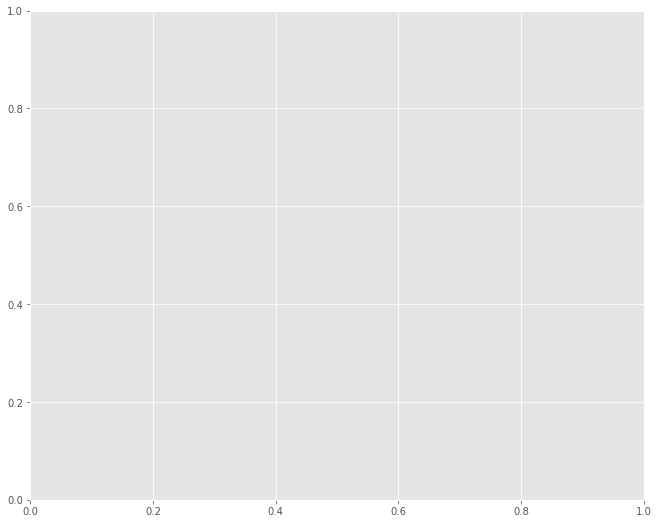

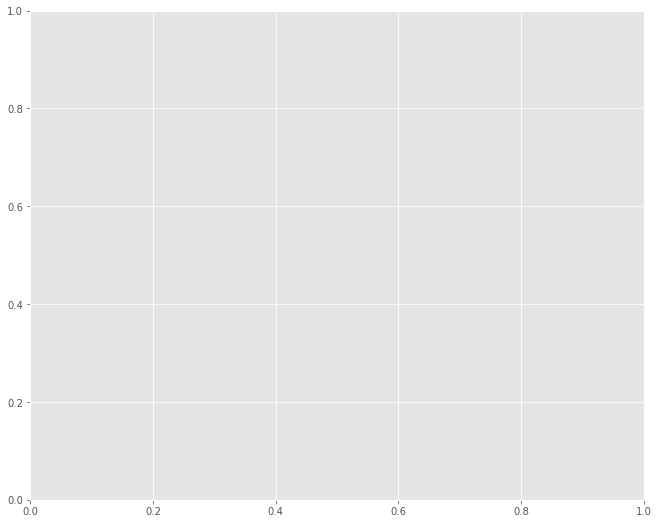

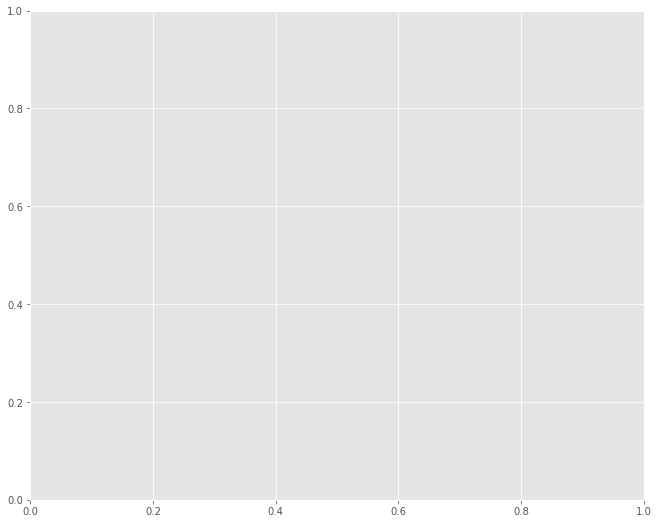

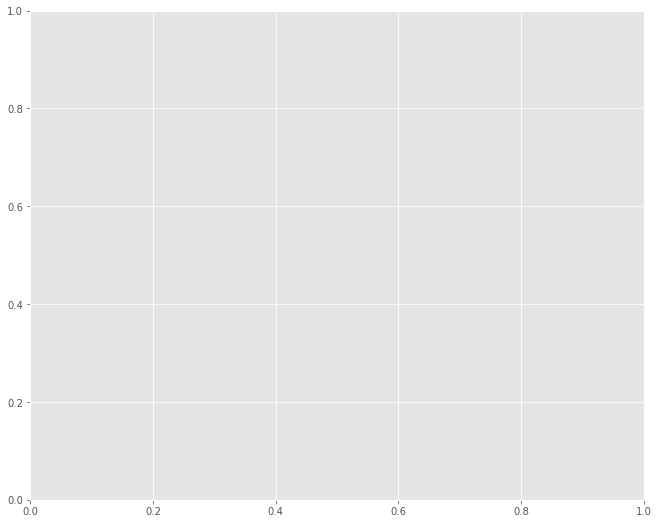

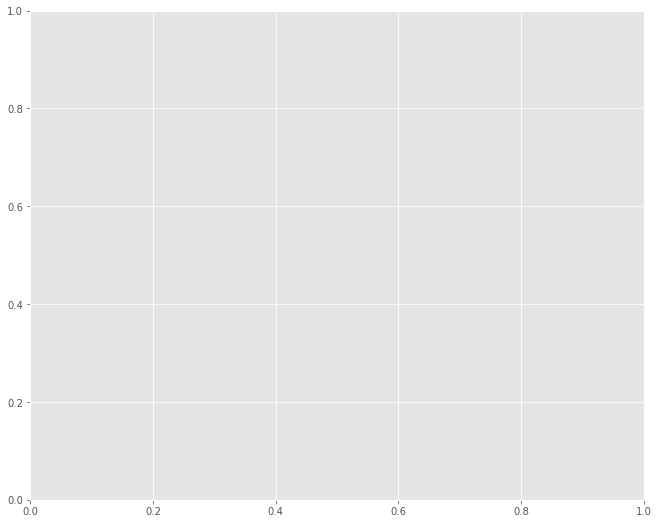

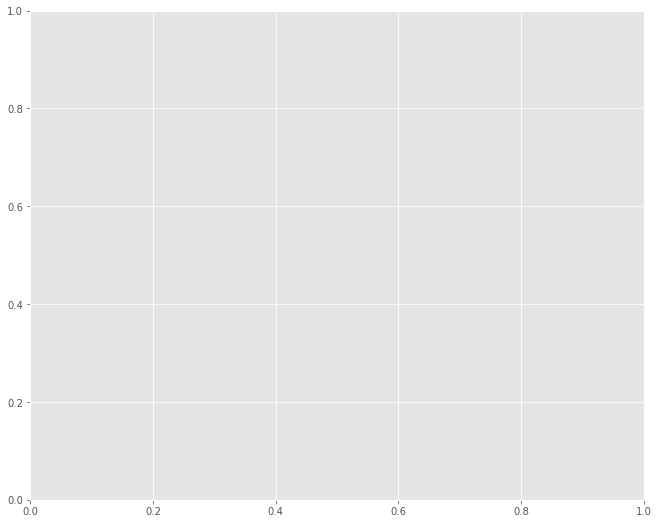

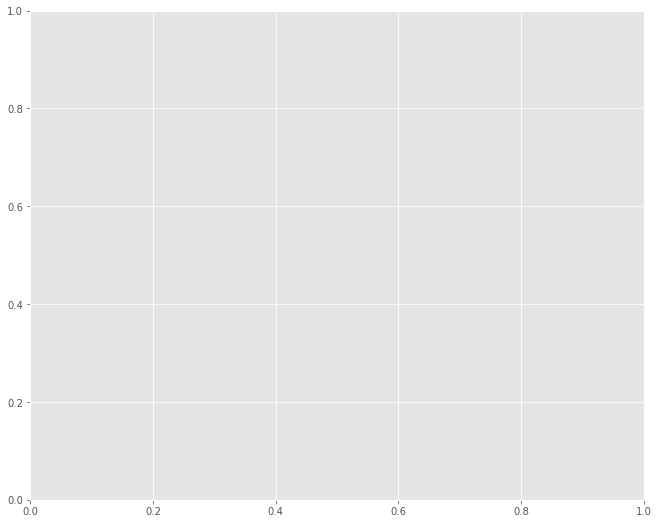

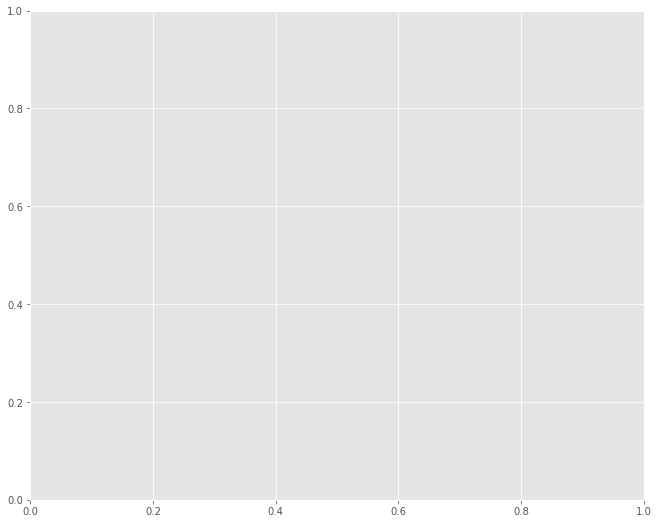

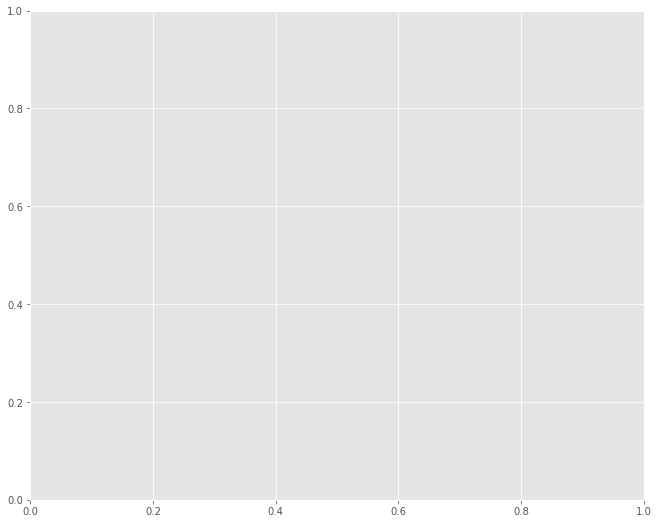

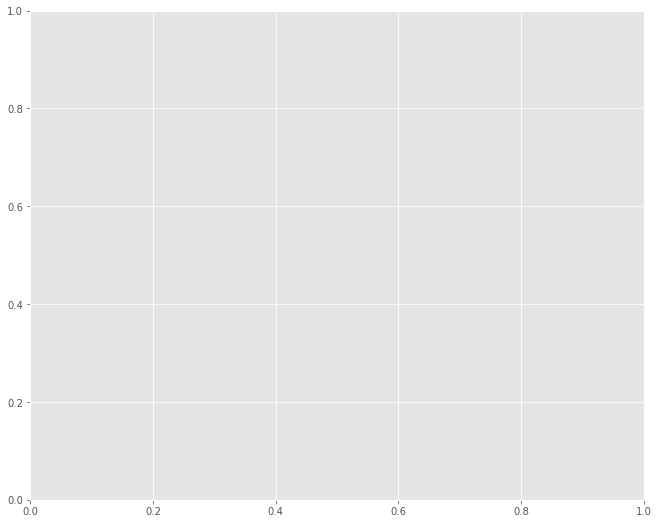

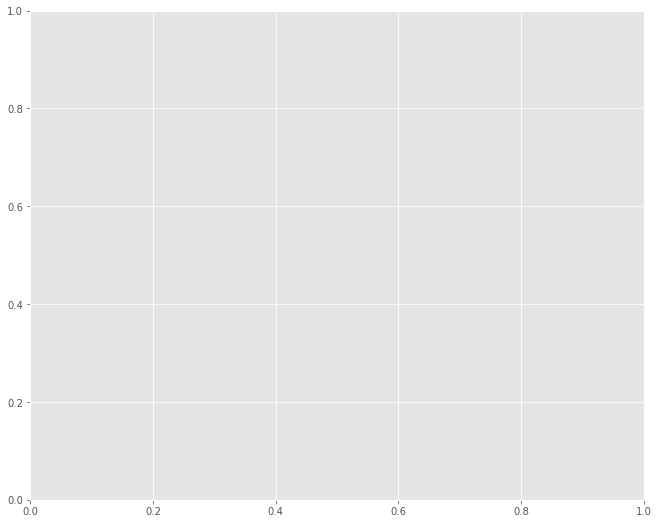

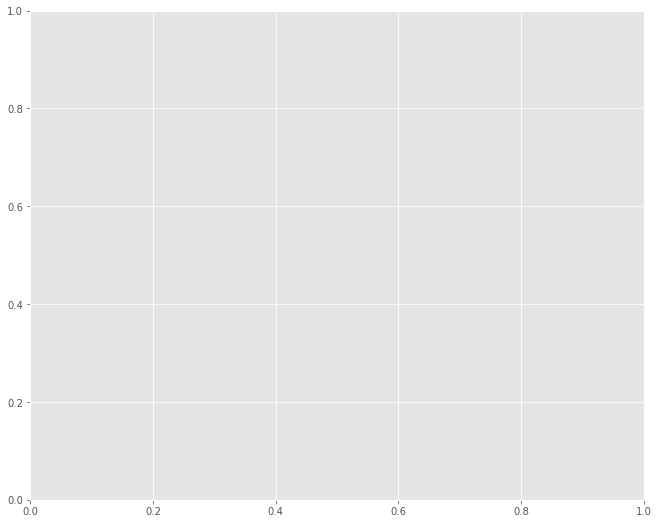

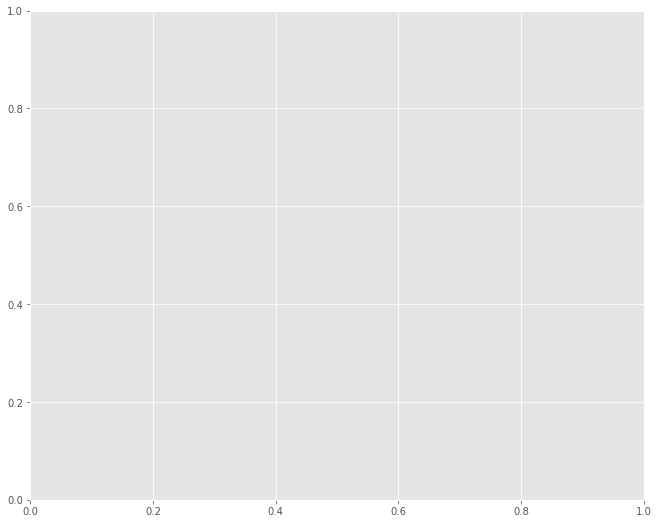

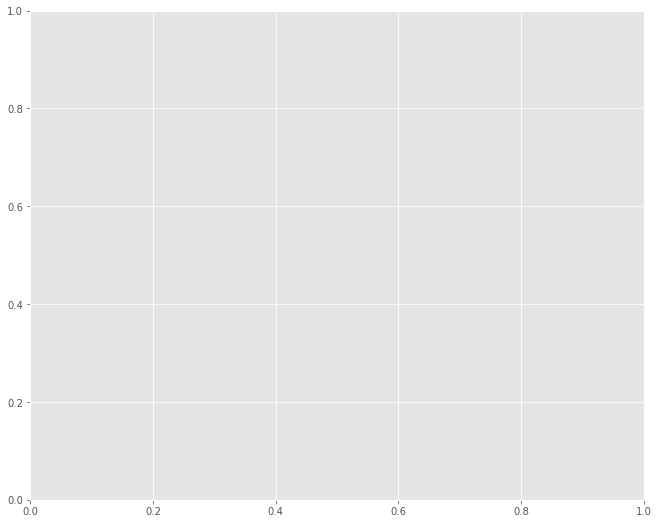

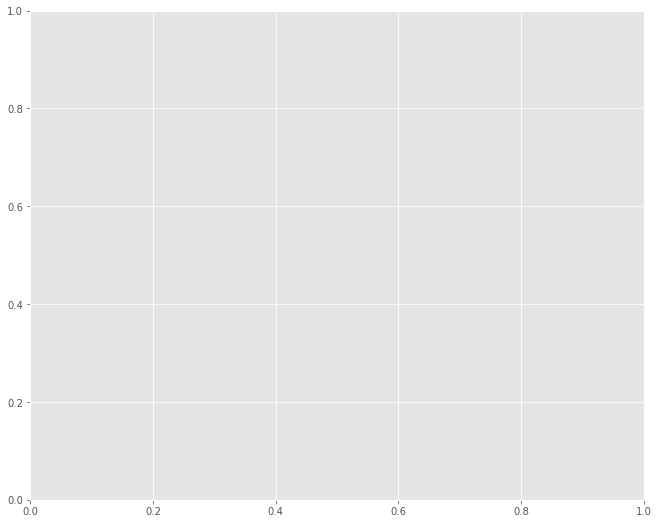

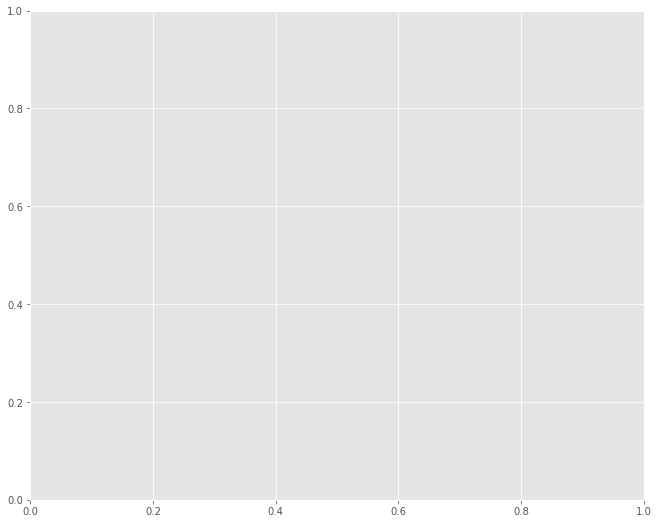

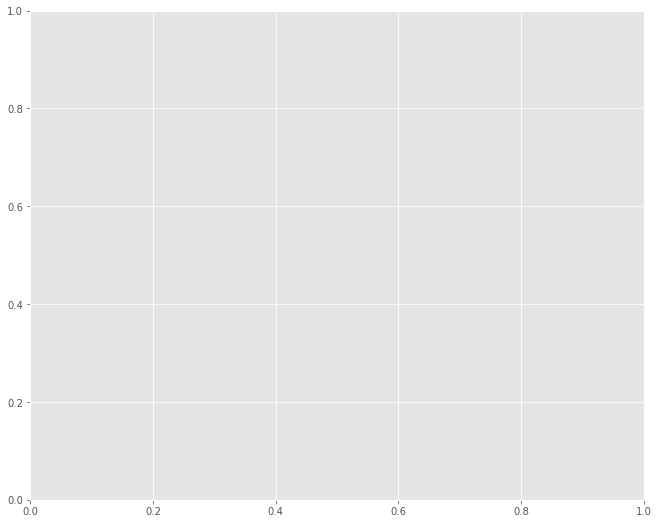

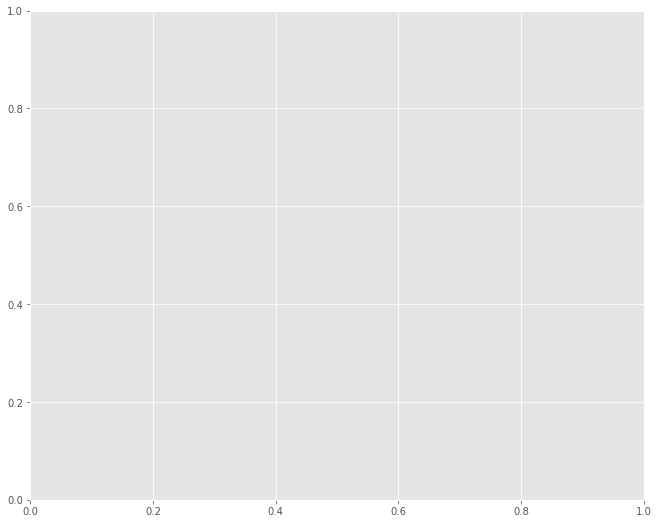

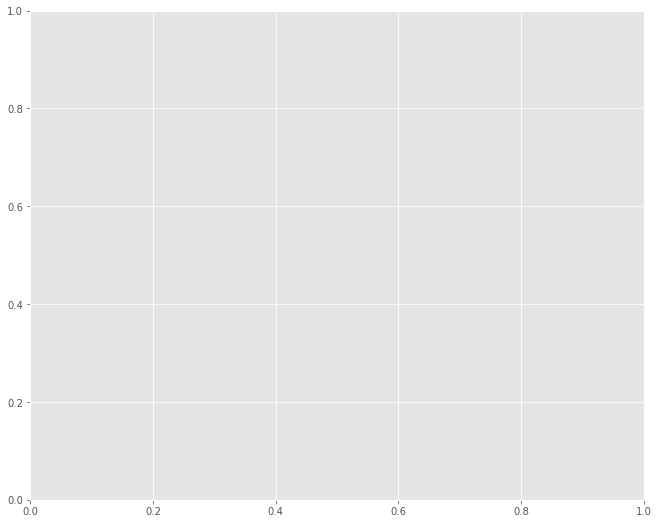

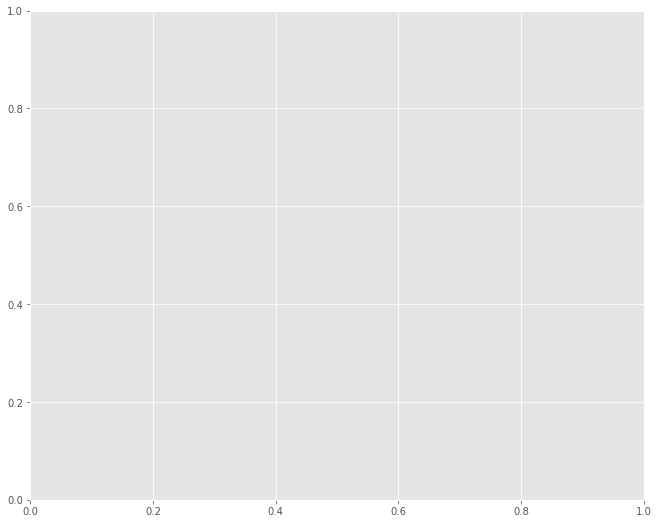

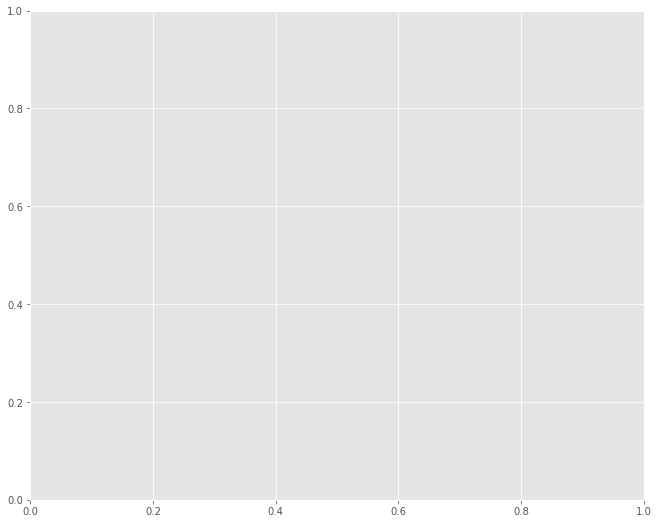

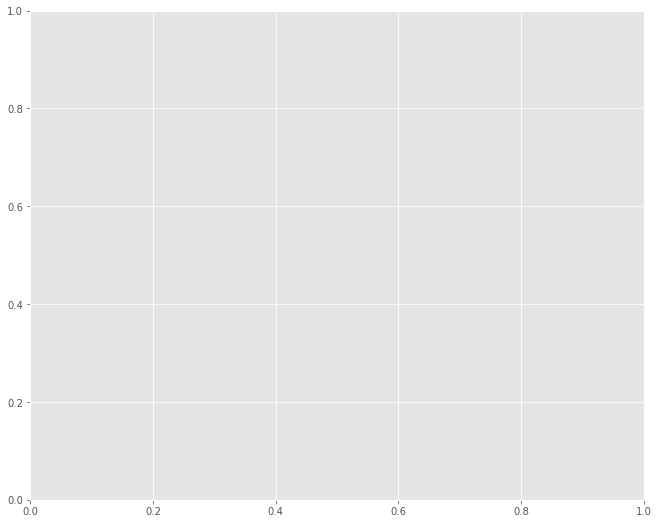

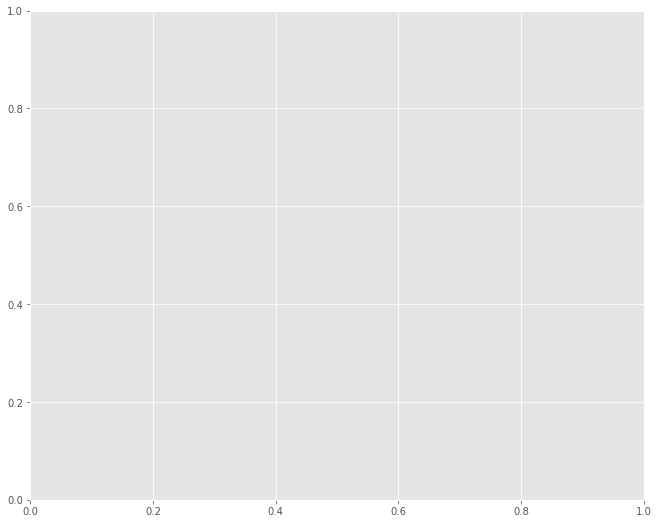

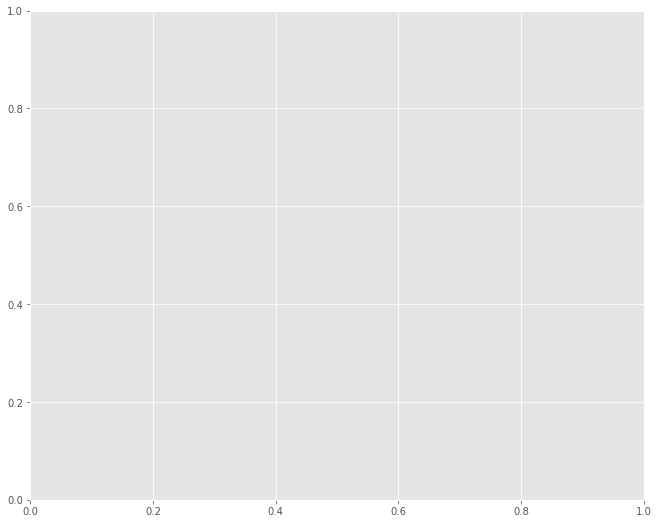

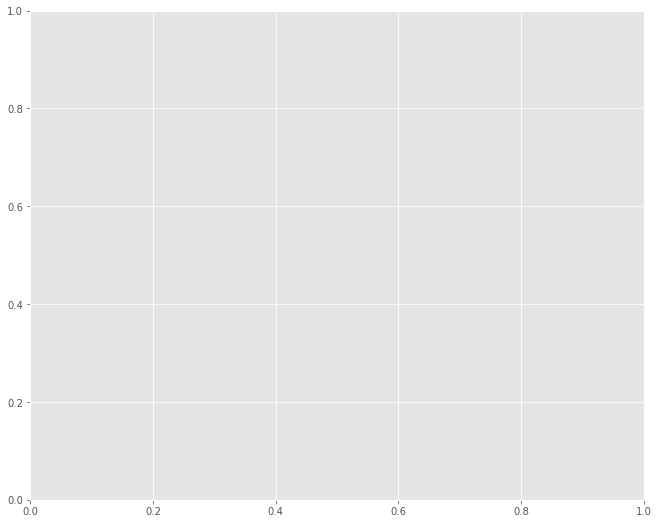

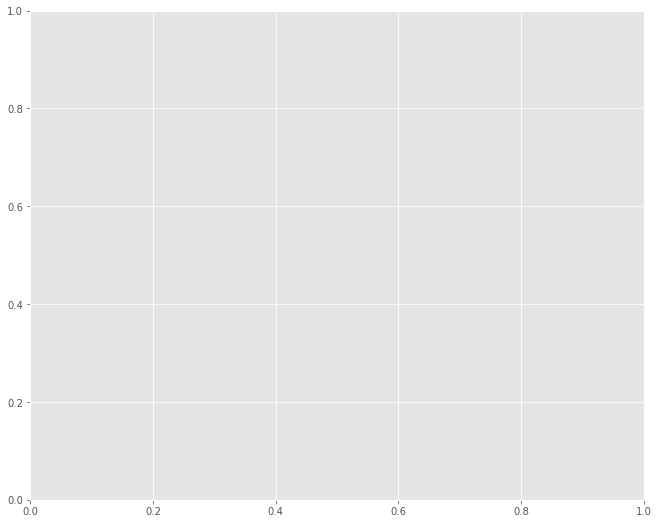

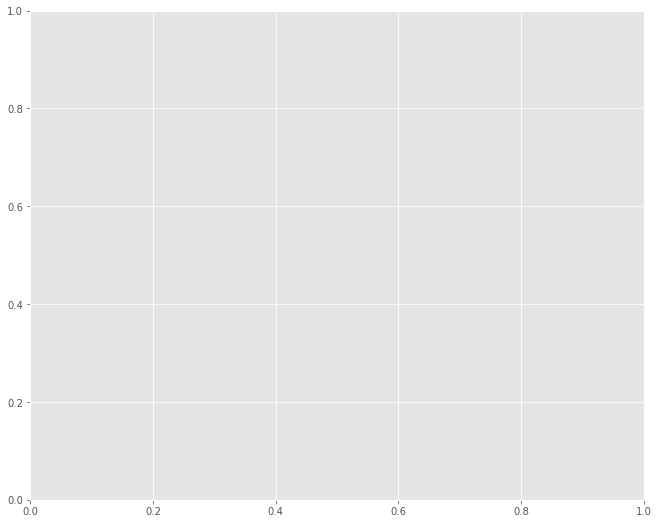

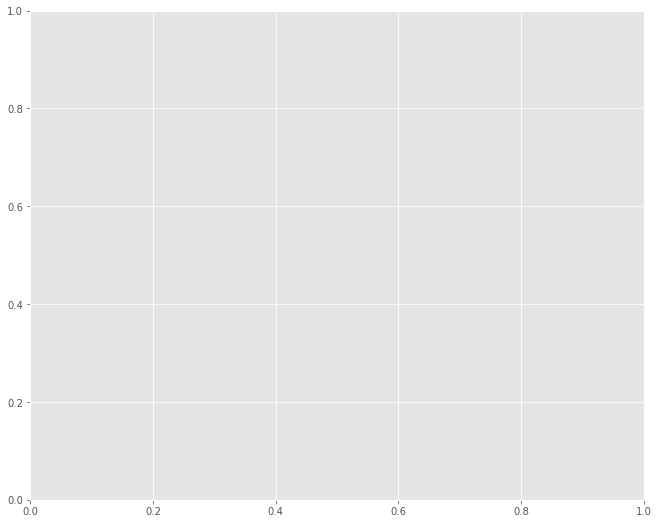

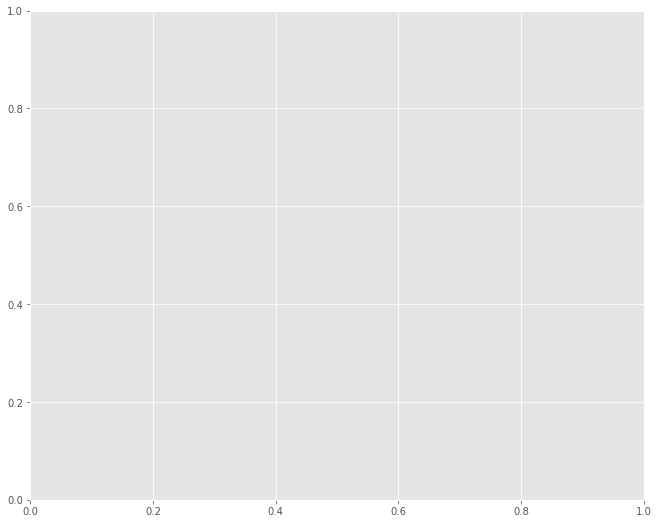

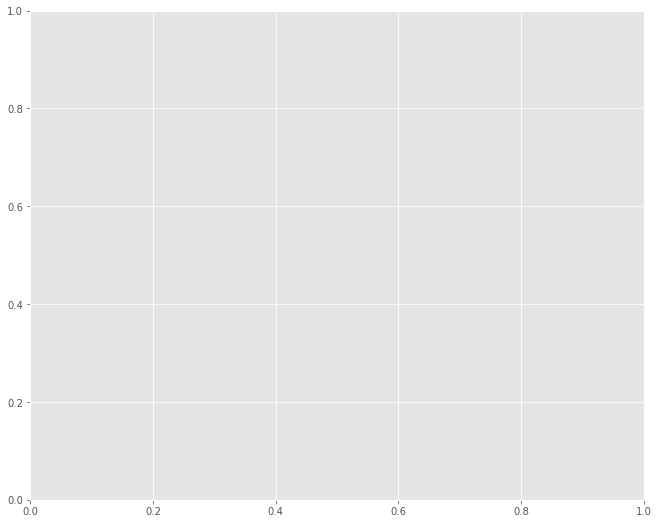

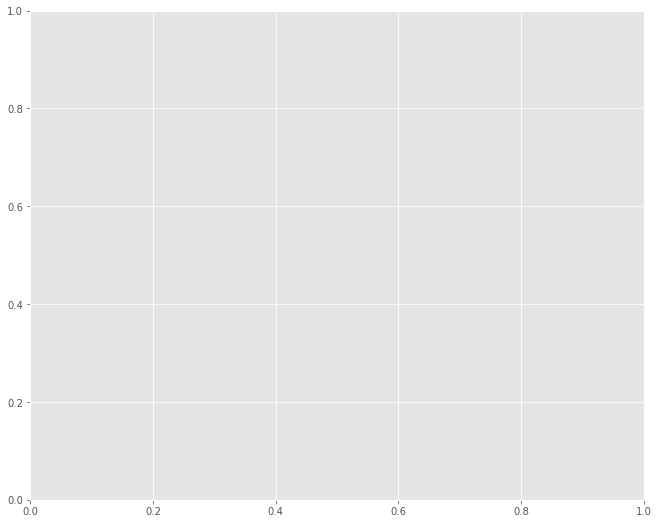

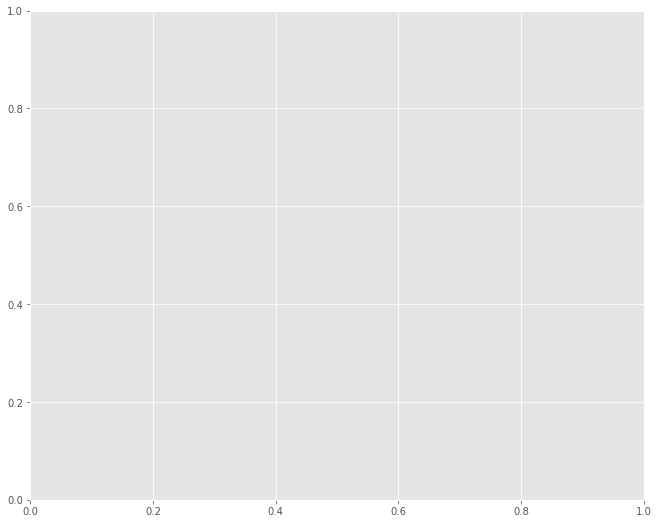

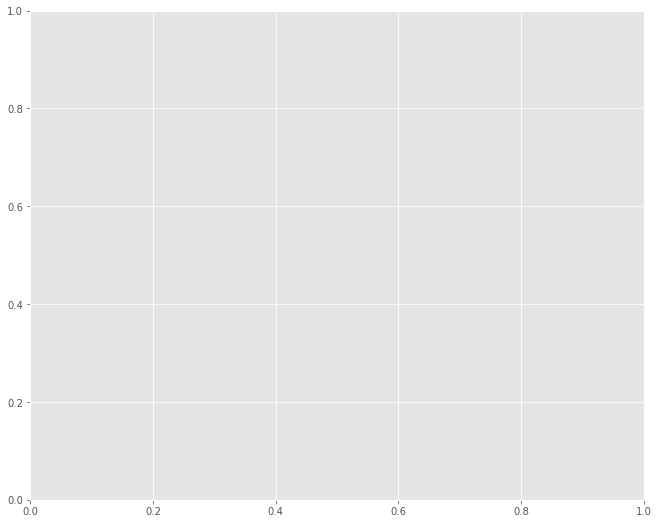

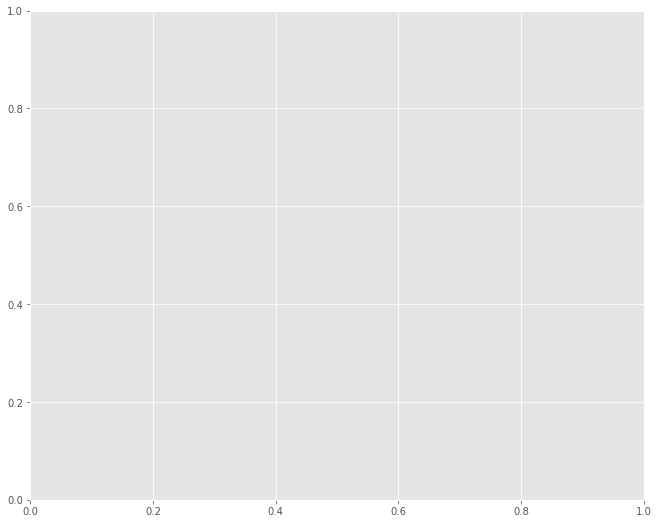

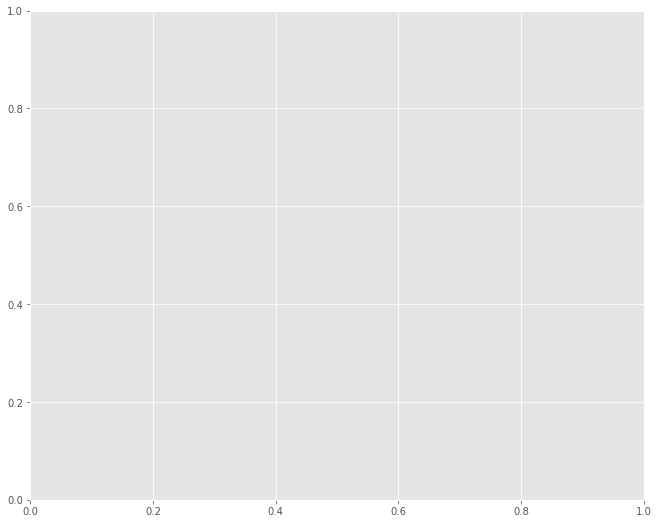

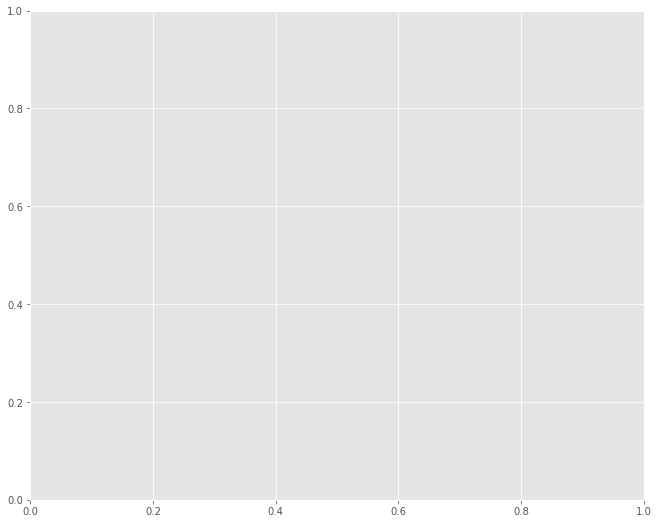

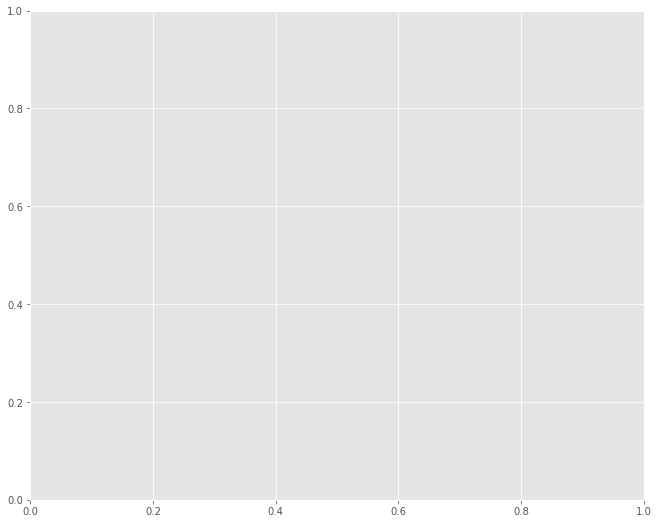

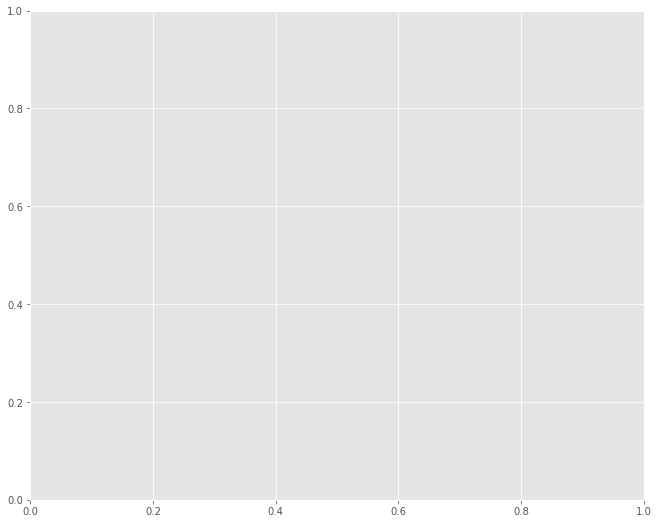

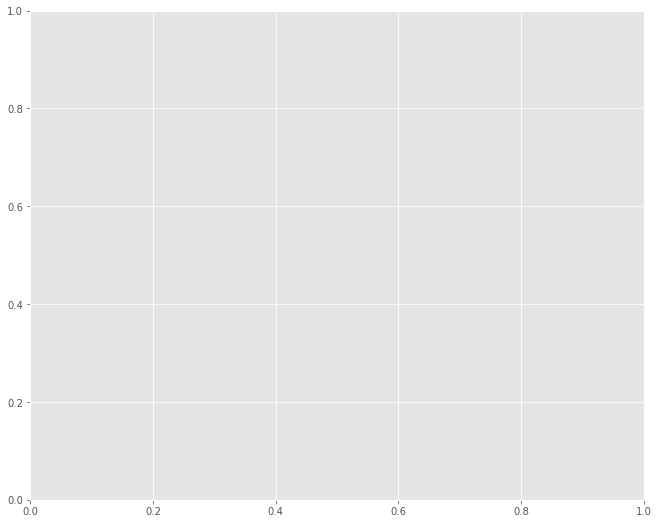

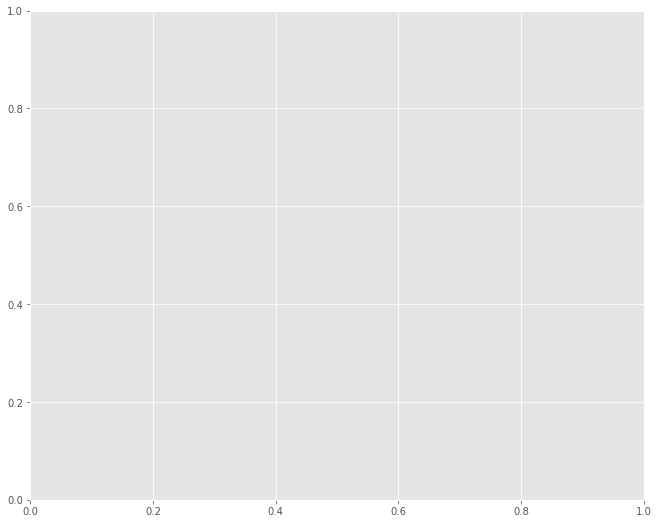

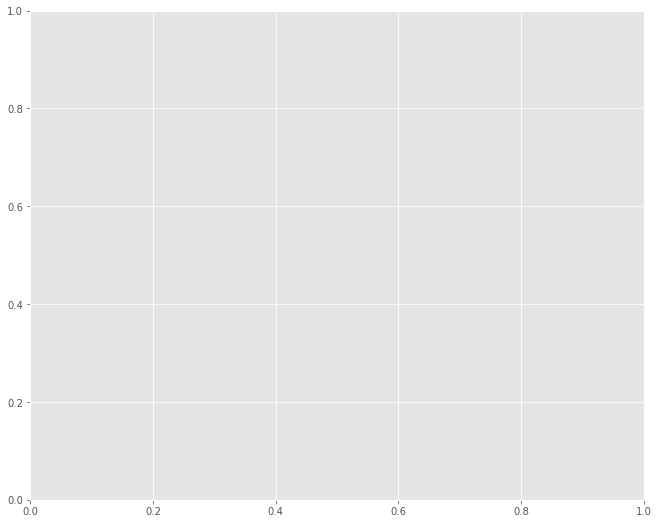

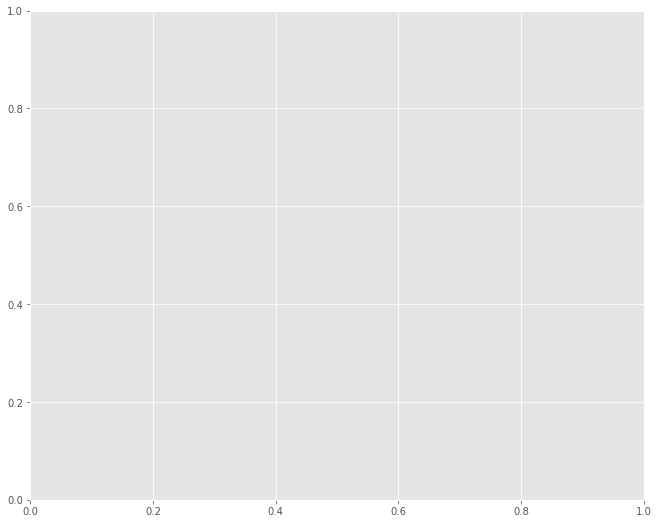

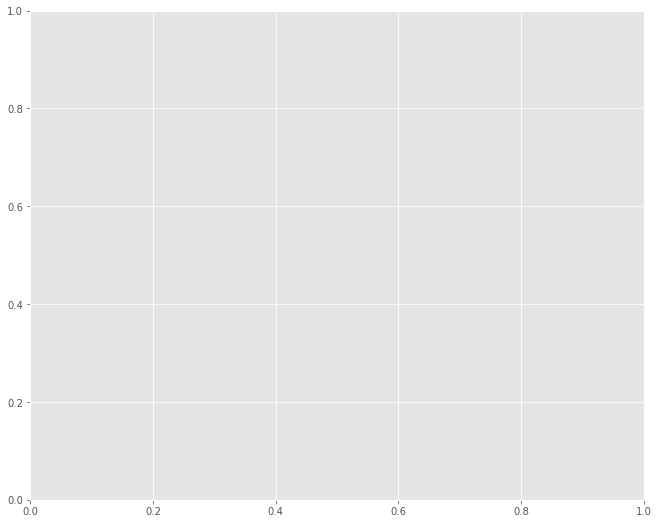

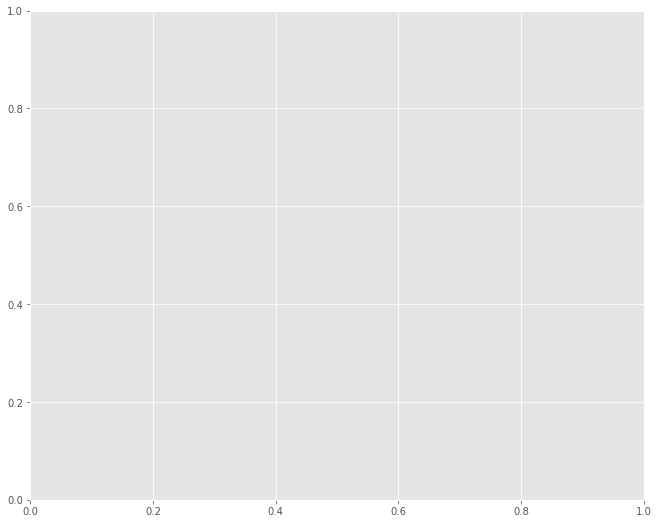

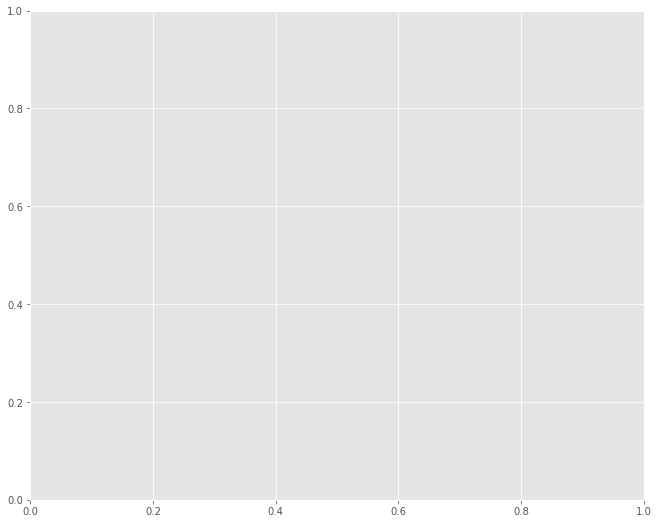

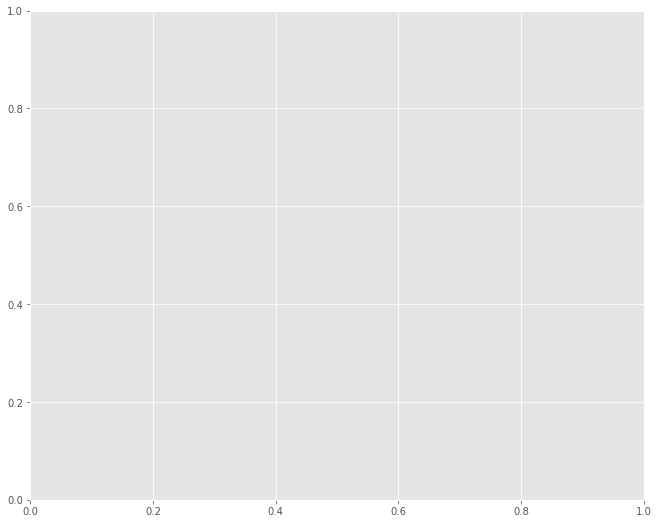

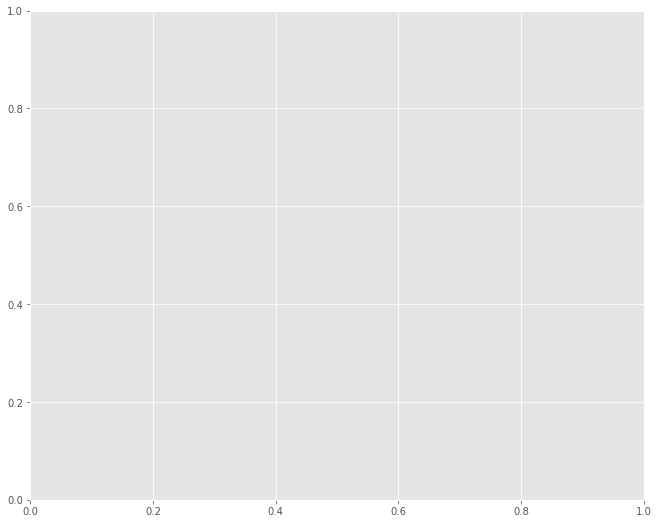

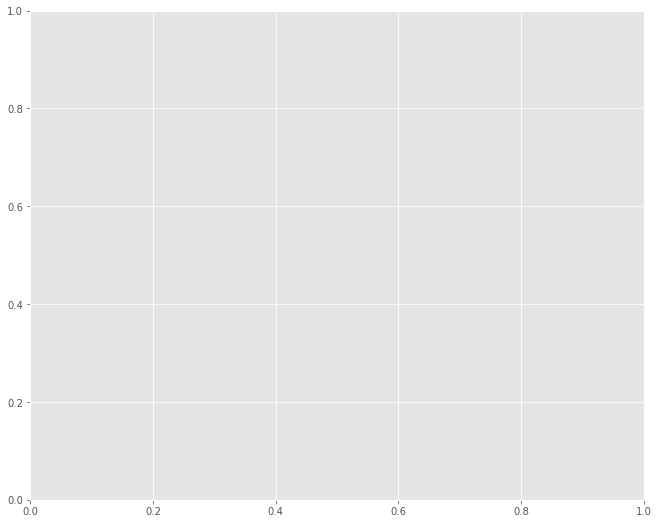

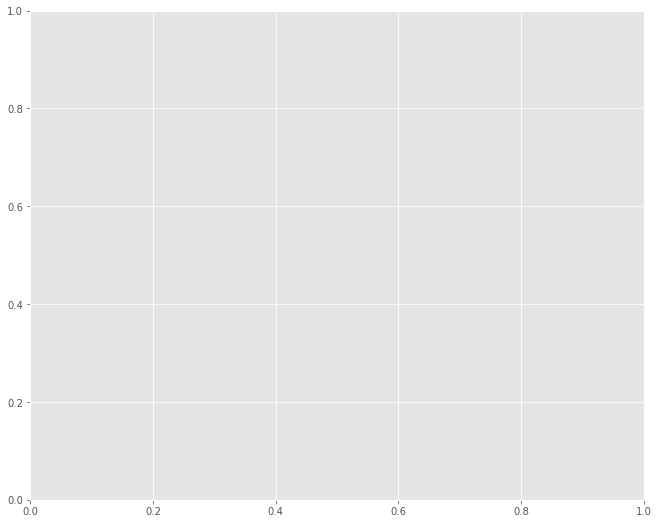

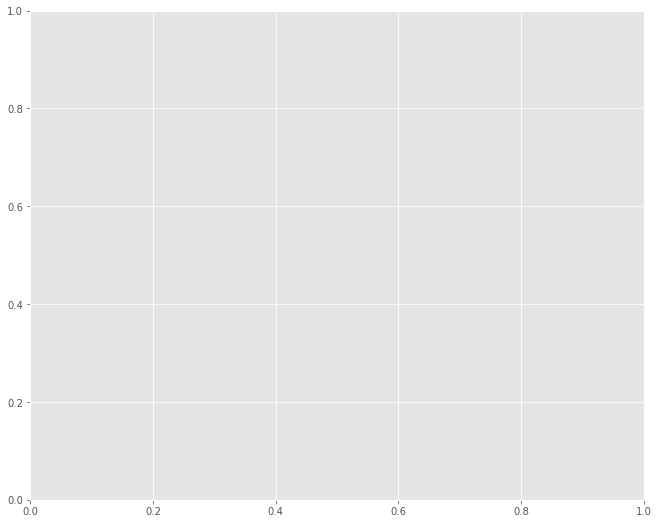

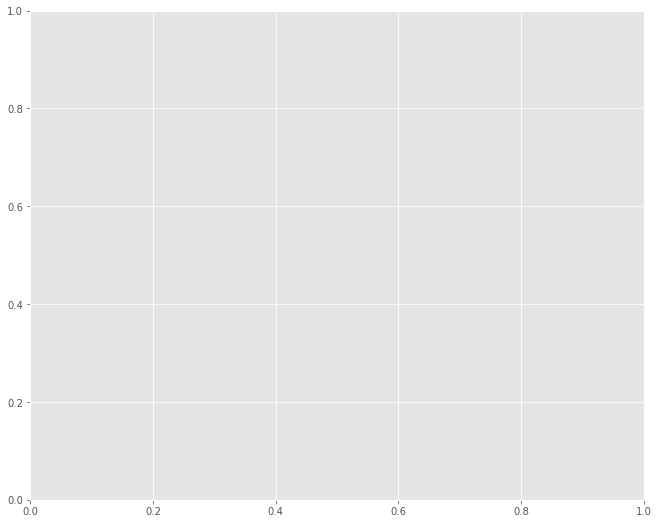

In [34]:
for actor in names_title_dict:
    fig, ax = plt.subplots(figsize=(11, 9))
    # https://stackoverflow.com/questions/41964618/boolean-matrix-form-pythons-dict-of-lists
    values = names_title_dict[actor]
    print(actor,values)
    data = {}
    boolean_table_name_cols = pd.DataFrame(data, columns=values)

    for key in names_title_dict:
        print(key)
        data[actor] = [True if value in names_title_dict[key] else False for value in values]
        print(data[actor])
#         for index in boolean_table_name_cols:
#             boolean_table_name_cols.append(data[actor])
        boolean_table_name_cols
        
#         sb.heatmap(boolean_table_name_cols)
#     plt.GridSpec(boolean_table_title_cols,ncols=len(values))
#     plt.show()

In [35]:
data = {}
for actor in names_title_dict:
    # https://stackoverflow.com/questions/41964618/boolean-matrix-form-pythons-dict-of-lists
    values = names_title_dict[actor]
    headers = values[:]
    headers.insert(0,'actor')
    print(headers)
    print(values)

#     print(actor,values)
    
    actor_dict_2d = [headers]

    for key in names_title_dict:
#         print(key)
#         data[actor] = [True if value in names_title_dict[key] else False for value in values]
#         print(data[actor])
        t_or_f = [True if value in names_title_dict[key] else False for value in values]
        t_or_f.insert(0,key)
        actor_dict_2d.append(t_or_f)
    data[actor] = actor_dict_2d
# print(data)

['actor', 'tt0077975', 'tt0078723', 'tt0072562', 'tt0080455']
['tt0077975', 'tt0078723', 'tt0072562', 'tt0080455']
['actor', 'tt0118747', 'tt0087332', 'tt0097428', 'tt0080455']
['tt0118747', 'tt0087332', 'tt0097428', 'tt0080455']
['actor', 'tt3503754', 'tt1884251', 'tt5774598', 'tt3603706', 'tt1748122', 'tt1210095', 'tt1837678', 'tt2202391', 'tt2450652', 'tt0072562', 'tt2282941', 'tt2243836', 'tt3091734', 'tt12762460', 'tt1732762', 'tt0362270', 'tt0128445', 'tt0122145', 'tt14779558', 'tt0351810', 'tt0961721', 'tt1490534', 'tt1972582', 'tt16589596', 'tt4742812', 'tt0281438', 'tt1600694', 'tt0499556', 'tt1740656', 'tt1538443', 'tt13998382', 'tt0288154', 'tt0189500', 'tt1911645', 'tt2356940', 'tt0115367', 'tt2357748', 'tt3790306', 'tt5156614', 'tt4571940', 'tt2828570', 'tt3147486', 'tt0335266', 'tt3231836', 'tt0457251', 'tt0097132', 'tt1810727', 'tt0448004', 'tt6384192', 'tt1687207', 'tt3872944', 'tt2147467', 'tt2784678']
['tt3503754', 'tt1884251', 'tt5774598', 'tt3603706', 'tt1748122', '

In [77]:
Kate_table = pd.DataFrame(data['Kate McKinnon']).set_index(0)

header = Kate_table.iloc[0]
Kate_table.columns = header
Kate_table = pd.DataFrame(Kate_table[1:], columns=header)
Kate_table
# Kate_table.values[0:]

actor           tt0072562 tt1289401 tt4799050 tt0092225 tt6394270
0                                                                
John Belushi         True     False     False     False     False
Dan Aykroyd         False     False     False     False     False
Bill Murray          True     False     False     False     False
Mike Myers          False     False     False     False     False
Chevy Chase         False     False     False     False     False
...                   ...       ...       ...       ...       ...
Jim Downey          False     False     False     False     False
Bowen Yang          False     False     False     False     False
Andrew Dismukes      True     False     False     False     False
Siobhan Fallon      False     False     False     False     False
Punkie Johnson      False     False     False     False     False

[157 rows x 5 columns]

In [71]:
def on_selection(change):
    if len(change['owner'].selected)==1: # only allow user to select one grid
        i = change['owner'].selected[0]
        myLabel.value = wiki_cast.iloc[i].name + ': ' + str(wiki_cast.iloc[i]['No. of seasons']) + ' seasons on SNL'
#how to ignore if NoneType selected?

In [72]:
myLabel = ipywidgets.Label()

In [73]:
####### BAR PLOT ######
# 2. scales
x_scb = bqplot.OrdinalScale()
y_scb = bqplot.LinearScale()
# 3. axis 
x_axb = bqplot.Axis(label='SNL Cast Member', orientation = 'vertical',
                    scale=x_scb, label_offset = '115px',
                    tick_style={'font-size':3,'text-anchor': 'end'},
                    padding = 0.25)
y_axb = bqplot.Axis(label='Number of Seasons on SNL',
                    scale=y_scb, label_offset = '40 px')

# 4. mark -- heatmap using out colors to map our data
no_SNL_seasons_bar = bqplot.Bars(orientation='horizontal',x=wiki_cast.index,
                                 y=wiki_cast['No. of seasons'],
                                 align='center',scales = {'x':x_scb,
                                                          'y':y_scb},
                                 interactions={"click": "select"},
                                 selected_style={"stroke": "green", 
                                                 "fill": "skyblue"})


margin = dict(top=0, bottom=50, left=140, right=0)


no_SNL_seasons_bar.observe(on_selection,'selected')

fig_bars = bqplot.Figure(marks=[no_SNL_seasons_bar],
                         axes=[x_axb, y_axb], fig_margin=margin)
fig_bars.axes[0].tick_style = {'text-anchor': 'end'}

fig_bars.layout.height = '1700px'

In [75]:
myDashboard = ipywidgets.VBox([myLabel,fig_bars])
myDashboard